---
---
# **Auto WCEBleedGen Competetion**
---
---

### **Bleeding / Non-Bleeding**

 The main goal of this challenge was to create a classification and detection model that could differentiate between bleeding and non-bleeding frames in wireless capsule endoscopy (WCE) images.

**Importing all the Required Librarires**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import MobileNetV2
from keras.optimizers import Adam
from keras.metrics import Accuracy, Recall, Precision
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.regularizers import l2
from keras.applications import InceptionV3
import os
import cv2
from PIL import Image
import numpy as np

**Obtaining the Data shape and Label**

In [ ]:

# Define the image directory
image_directory = '/content/drive/MyDrive/final/WCEBleedGen/'

# Define the image size
SIZE = 224

# Initialize lists to store the dataset and labels
dataset = []
labels = []

# Function to read and preprocess images
def process_images(image_dir, label_value):
    for image_name in os.listdir(image_dir):
        if image_name.endswith('.png'):
            image_path = os.path.join(image_dir, image_name)
            try:
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (SIZE, SIZE))
                    dataset.append(image)
                    labels.append(label_value)
                else:
                    print(f"Unable to load image: {image_path}")
            except Exception as e:
                print(f"Error processing {image_path}: {str(e)}")

# Process bleeding images
bleeding_directory = os.path.join(image_directory, 'bleeding/images')
process_images(bleeding_directory, label_value=1)

# Process non-bleeding images
non_bleeding_directory = os.path.join(image_directory, 'non-bleeding/images')
process_images(non_bleeding_directory, label_value=0)

# Convert dataset and labels to numpy arrays
dataset = np.array(dataset)
labels = np.array(labels)

# Print dataset and label shapes for verification
print('Dataset shape:', dataset.shape)
print('Label shape:', labels.shape)


Dataset shape: (2618, 224, 224, 3)
Label shape: (2618,)


**Random image from the dataset and its label**

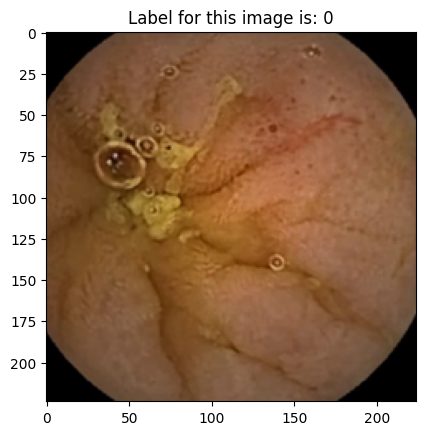

In [ ]:
import random
import matplotlib.pyplot as plt

# Generate a random image number
image_number = random.randint(0, len(dataset) - 1)

# Display the image and its label
plt.imshow(dataset[image_number])
plt.title("Label for this image is: " + str(labels[image_number]))  # Use 'labels' instead of 'label'
plt.show()


**Using DenseNet 121 Architecture to Extract Features**

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
from tqdm import tqdm

# Define the image directories
image_directory = '/content/drive/MyDrive/final/WCEBleedGen/'
output_directory = '/content/drive/MyDrive/final/extracted_features/'

# Define the image size
SIZE = (224, 224)

# Create output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Load the DenseNet-121 model with pre-trained weights
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Remove the top classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Create a model for feature extraction
model = Model(inputs=base_model.input, outputs=x)

# Function to extract features from an image
def extract_features(image_path):
    img = image.load_img(image_path, target_size=SIZE)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features

# Initialize lists to store features and labels
features_list = []
labels_list = []

# Process bleeding images
bleeding_directory = os.path.join(image_directory, 'bleeding/images')

for image_name in tqdm(os.listdir(bleeding_directory)):
    if image_name.endswith('.png'):
        image_path = os.path.join(bleeding_directory, image_name)
        features = extract_features(image_path)
        features_list.append(features)
        labels_list.append(1)  # Label 1 for bleeding

# Process non-bleeding images
non_bleeding_directory = os.path.join(image_directory, 'non-bleeding/images')

for image_name in tqdm(os.listdir(non_bleeding_directory)):
    if image_name.endswith('.png'):
        image_path = os.path.join(non_bleeding_directory, image_name)
        features = extract_features(image_path)
        features_list.append(features)
        labels_list.append(0)  # Label 0 for non-bleeding

# Convert lists to NumPy arrays
features_array = np.vstack(features_list)
labels_array = np.array(labels_list)

# Save the extracted features and labels in the "extracted_features" folder
np.save(os.path.join(output_directory, 'features.npy'), features_array)
np.save(os.path.join(output_directory, 'labels.npy'), labels_array)

print("Feature extraction and label saving completed.")


29084464/29084464 [==============================] - 0s 0us/step


  0%|          | 0/1311 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  0%|          | 1/1311 [00:03<1:06:35,  3.05s/it]

1/1 [==============================] - 0s 204ms/step


  0%|          | 2/1311 [00:03<36:11,  1.66s/it]  

1/1 [==============================] - 0s 163ms/step


  0%|          | 3/1311 [00:04<27:31,  1.26s/it]

1/1 [==============================] - 0s 178ms/step


  0%|          | 4/1311 [00:05<21:34,  1.01it/s]

1/1 [==============================] - 0s 166ms/step


  0%|          | 5/1311 [00:05<18:22,  1.18it/s]

1/1 [==============================] - 0s 178ms/step


  0%|          | 6/1311 [00:06<16:19,  1.33it/s]

1/1 [==============================] - 0s 312ms/step


  1%|          | 7/1311 [00:07<18:11,  1.19it/s]

1/1 [==============================] - 0s 302ms/step


  1%|          | 8/1311 [00:08<18:08,  1.20it/s]

1/1 [==============================] - 0s 302ms/step


  1%|          | 9/1311 [00:08<16:59,  1.28it/s]

1/1 [==============================] - 0s 298ms/step


  1%|          | 10/1311 [00:09<15:55,  1.36it/s]

1/1 [==============================] - 0s 287ms/step


  1%|          | 11/1311 [00:10<15:16,  1.42it/s]

1/1 [==============================] - 0s 171ms/step


  1%|          | 12/1311 [00:10<15:58,  1.35it/s]

1/1 [==============================] - 0s 170ms/step


  1%|          | 13/1311 [00:11<13:44,  1.57it/s]

1/1 [==============================] - 1s 563ms/step


  1%|          | 14/1311 [00:12<16:24,  1.32it/s]

1/1 [==============================] - 0s 334ms/step


  1%|          | 15/1311 [00:30<2:07:54,  5.92s/it]

1/1 [==============================] - 0s 167ms/step


  1%|          | 16/1311 [00:30<1:31:48,  4.25s/it]

1/1 [==============================] - 0s 169ms/step


  1%|▏         | 17/1311 [00:30<1:06:43,  3.09s/it]

1/1 [==============================] - 0s 183ms/step


  1%|▏         | 18/1311 [00:31<49:07,  2.28s/it]  

1/1 [==============================] - 0s 169ms/step


  1%|▏         | 19/1311 [00:31<36:48,  1.71s/it]

1/1 [==============================] - 0s 183ms/step


  2%|▏         | 20/1311 [00:32<28:11,  1.31s/it]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 21/1311 [00:32<21:13,  1.01it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 22/1311 [00:32<16:22,  1.31it/s]

1/1 [==============================] - 0s 171ms/step


  2%|▏         | 23/1311 [00:32<13:54,  1.54it/s]

1/1 [==============================] - 0s 168ms/step


  2%|▏         | 24/1311 [00:33<12:10,  1.76it/s]

1/1 [==============================] - 0s 169ms/step


  2%|▏         | 25/1311 [00:33<10:02,  2.13it/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 26/1311 [00:33<09:31,  2.25it/s]

1/1 [==============================] - 0s 299ms/step


  2%|▏         | 27/1311 [00:34<09:24,  2.28it/s]

1/1 [==============================] - 0s 319ms/step


  2%|▏         | 28/1311 [00:34<09:13,  2.32it/s]

1/1 [==============================] - 0s 298ms/step


  2%|▏         | 29/1311 [00:35<08:59,  2.37it/s]

1/1 [==============================] - 0s 334ms/step


  2%|▏         | 30/1311 [00:35<08:59,  2.37it/s]

1/1 [==============================] - 0s 299ms/step


  2%|▏         | 31/1311 [00:36<08:53,  2.40it/s]

1/1 [==============================] - 0s 294ms/step


  2%|▏         | 32/1311 [00:36<09:00,  2.36it/s]

1/1 [==============================] - 0s 298ms/step


  3%|▎         | 33/1311 [00:36<09:03,  2.35it/s]

1/1 [==============================] - 0s 364ms/step


  3%|▎         | 34/1311 [00:37<09:27,  2.25it/s]

1/1 [==============================] - 0s 344ms/step


  3%|▎         | 35/1311 [00:37<09:33,  2.23it/s]

1/1 [==============================] - 0s 320ms/step


  3%|▎         | 36/1311 [00:38<09:34,  2.22it/s]

1/1 [==============================] - 0s 343ms/step


  3%|▎         | 37/1311 [00:38<09:45,  2.18it/s]

1/1 [==============================] - 0s 344ms/step


  3%|▎         | 38/1311 [00:39<09:40,  2.19it/s]

1/1 [==============================] - 0s 314ms/step


  3%|▎         | 39/1311 [00:39<09:22,  2.26it/s]

1/1 [==============================] - 0s 343ms/step


  3%|▎         | 40/1311 [00:40<09:43,  2.18it/s]

1/1 [==============================] - 0s 311ms/step


  3%|▎         | 41/1311 [00:40<09:28,  2.23it/s]

1/1 [==============================] - 0s 305ms/step


  3%|▎         | 42/1311 [00:40<09:17,  2.28it/s]

1/1 [==============================] - 0s 293ms/step


  3%|▎         | 43/1311 [00:41<09:11,  2.30it/s]

1/1 [==============================] - 0s 318ms/step


  3%|▎         | 44/1311 [00:41<09:14,  2.29it/s]

1/1 [==============================] - 0s 303ms/step


  3%|▎         | 45/1311 [00:42<09:07,  2.31it/s]

1/1 [==============================] - 0s 245ms/step


  4%|▎         | 46/1311 [00:42<08:28,  2.49it/s]

1/1 [==============================] - 0s 168ms/step


  4%|▎         | 47/1311 [00:42<07:25,  2.84it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▎         | 48/1311 [00:43<06:41,  3.14it/s]

1/1 [==============================] - 0s 166ms/step


  4%|▎         | 49/1311 [00:43<06:12,  3.39it/s]

1/1 [==============================] - 0s 184ms/step


  4%|▍         | 50/1311 [00:43<06:45,  3.11it/s]

1/1 [==============================] - 0s 182ms/step


  4%|▍         | 51/1311 [00:43<06:17,  3.34it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 52/1311 [00:44<05:54,  3.55it/s]

1/1 [==============================] - 0s 185ms/step


  4%|▍         | 53/1311 [00:44<06:32,  3.20it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▍         | 54/1311 [00:44<07:02,  2.98it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▍         | 55/1311 [00:45<06:25,  3.26it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 56/1311 [00:45<06:52,  3.04it/s]

1/1 [==============================] - 0s 187ms/step


  4%|▍         | 57/1311 [00:45<07:18,  2.86it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▍         | 58/1311 [00:46<07:30,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▍         | 59/1311 [00:46<07:37,  2.73it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▍         | 60/1311 [00:46<06:49,  3.05it/s]

1/1 [==============================] - 0s 163ms/step


  5%|▍         | 61/1311 [00:47<06:11,  3.37it/s]

1/1 [==============================] - 0s 165ms/step


  5%|▍         | 62/1311 [00:47<05:48,  3.58it/s]

1/1 [==============================] - 0s 181ms/step


  5%|▍         | 63/1311 [00:47<06:25,  3.24it/s]

1/1 [==============================] - 0s 186ms/step


  5%|▍         | 64/1311 [00:48<06:05,  3.42it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 65/1311 [00:48<06:41,  3.10it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▌         | 66/1311 [00:48<07:01,  2.95it/s]

1/1 [==============================] - 0s 176ms/step


  5%|▌         | 67/1311 [00:49<07:17,  2.85it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▌         | 68/1311 [00:49<07:27,  2.78it/s]

1/1 [==============================] - 0s 181ms/step


  5%|▌         | 69/1311 [00:49<06:42,  3.08it/s]

1/1 [==============================] - 0s 173ms/step


  5%|▌         | 70/1311 [00:50<06:11,  3.34it/s]

1/1 [==============================] - 0s 301ms/step


  5%|▌         | 71/1311 [00:50<06:47,  3.04it/s]

1/1 [==============================] - 0s 318ms/step


  5%|▌         | 72/1311 [00:50<07:27,  2.77it/s]

1/1 [==============================] - 0s 296ms/step


  6%|▌         | 73/1311 [00:51<07:40,  2.69it/s]

1/1 [==============================] - 0s 305ms/step


  6%|▌         | 74/1311 [00:52<09:47,  2.11it/s]

1/1 [==============================] - 0s 299ms/step


  6%|▌         | 75/1311 [00:52<09:15,  2.22it/s]

1/1 [==============================] - 0s 297ms/step


  6%|▌         | 76/1311 [00:52<09:00,  2.28it/s]

1/1 [==============================] - 0s 300ms/step


  6%|▌         | 77/1311 [00:53<09:03,  2.27it/s]

1/1 [==============================] - 0s 295ms/step


  6%|▌         | 78/1311 [00:53<08:56,  2.30it/s]

1/1 [==============================] - 0s 303ms/step


  6%|▌         | 79/1311 [00:54<08:39,  2.37it/s]

1/1 [==============================] - 0s 301ms/step


  6%|▌         | 80/1311 [00:54<08:27,  2.43it/s]

1/1 [==============================] - 0s 171ms/step


  6%|▌         | 81/1311 [00:54<08:23,  2.44it/s]

1/1 [==============================] - 0s 188ms/step


  6%|▋         | 82/1311 [00:55<07:32,  2.72it/s]

1/1 [==============================] - 0s 168ms/step


  6%|▋         | 83/1311 [00:55<06:44,  3.04it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▋         | 84/1311 [00:55<07:04,  2.89it/s]

1/1 [==============================] - 0s 195ms/step


  6%|▋         | 85/1311 [00:56<07:15,  2.81it/s]

1/1 [==============================] - 0s 180ms/step


  7%|▋         | 86/1311 [00:56<06:35,  3.10it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 87/1311 [00:56<06:56,  2.94it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 88/1311 [00:57<06:19,  3.22it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 89/1311 [00:57<06:45,  3.01it/s]

1/1 [==============================] - 0s 184ms/step


  7%|▋         | 90/1311 [00:57<07:06,  2.86it/s]

1/1 [==============================] - 0s 192ms/step


  7%|▋         | 91/1311 [00:58<06:32,  3.11it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 92/1311 [00:58<06:03,  3.36it/s]

1/1 [==============================] - 0s 163ms/step


  7%|▋         | 93/1311 [00:58<06:33,  3.09it/s]

1/1 [==============================] - 0s 163ms/step


  7%|▋         | 94/1311 [00:59<06:55,  2.93it/s]

1/1 [==============================] - 0s 170ms/step


  7%|▋         | 95/1311 [00:59<07:13,  2.80it/s]

1/1 [==============================] - 0s 169ms/step


  7%|▋         | 96/1311 [00:59<06:31,  3.10it/s]

1/1 [==============================] - 0s 182ms/step


  7%|▋         | 97/1311 [00:59<06:04,  3.33it/s]

1/1 [==============================] - 0s 183ms/step


  7%|▋         | 98/1311 [01:00<05:47,  3.49it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 99/1311 [01:00<05:31,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


  8%|▊         | 100/1311 [01:00<05:24,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 101/1311 [01:01<06:05,  3.31it/s]

1/1 [==============================] - 0s 169ms/step


  8%|▊         | 102/1311 [01:01<06:38,  3.03it/s]

1/1 [==============================] - 0s 172ms/step


  8%|▊         | 103/1311 [01:01<06:57,  2.89it/s]

1/1 [==============================] - 0s 181ms/step


  8%|▊         | 104/1311 [01:02<06:24,  3.14it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 105/1311 [01:02<05:58,  3.37it/s]

1/1 [==============================] - 0s 182ms/step


  8%|▊         | 106/1311 [01:02<05:42,  3.52it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 107/1311 [01:02<06:20,  3.16it/s]

1/1 [==============================] - 0s 190ms/step


  8%|▊         | 108/1311 [01:03<06:01,  3.33it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 109/1311 [01:03<05:40,  3.53it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 110/1311 [01:03<05:24,  3.70it/s]

1/1 [==============================] - 0s 172ms/step


  8%|▊         | 111/1311 [01:04<06:05,  3.29it/s]

1/1 [==============================] - 0s 181ms/step


  9%|▊         | 112/1311 [01:04<06:35,  3.03it/s]

1/1 [==============================] - 0s 289ms/step


  9%|▊         | 113/1311 [01:04<06:51,  2.91it/s]

1/1 [==============================] - 0s 309ms/step


  9%|▊         | 114/1311 [01:05<07:09,  2.78it/s]

1/1 [==============================] - 0s 309ms/step


  9%|▉         | 115/1311 [01:05<07:22,  2.70it/s]

1/1 [==============================] - 0s 305ms/step


  9%|▉         | 116/1311 [01:06<07:30,  2.65it/s]

1/1 [==============================] - 0s 300ms/step


  9%|▉         | 117/1311 [01:06<07:33,  2.63it/s]

1/1 [==============================] - 0s 289ms/step


  9%|▉         | 118/1311 [01:06<07:49,  2.54it/s]

1/1 [==============================] - 0s 298ms/step


  9%|▉         | 119/1311 [01:07<07:58,  2.49it/s]

1/1 [==============================] - 0s 305ms/step


  9%|▉         | 120/1311 [01:07<07:58,  2.49it/s]

1/1 [==============================] - 0s 308ms/step


  9%|▉         | 121/1311 [01:08<08:01,  2.47it/s]

1/1 [==============================] - 0s 303ms/step


  9%|▉         | 122/1311 [01:08<08:07,  2.44it/s]

1/1 [==============================] - 0s 289ms/step


  9%|▉         | 123/1311 [01:08<07:57,  2.49it/s]

1/1 [==============================] - 0s 222ms/step


  9%|▉         | 124/1311 [01:09<07:27,  2.65it/s]

1/1 [==============================] - 0s 162ms/step


 10%|▉         | 125/1311 [01:09<07:28,  2.65it/s]

1/1 [==============================] - 0s 163ms/step


 10%|▉         | 126/1311 [01:09<06:36,  2.99it/s]

1/1 [==============================] - 0s 179ms/step


 10%|▉         | 127/1311 [01:10<06:52,  2.87it/s]

1/1 [==============================] - 0s 180ms/step


 10%|▉         | 128/1311 [01:10<07:03,  2.79it/s]

1/1 [==============================] - 0s 165ms/step


 10%|▉         | 129/1311 [01:11<07:11,  2.74it/s]

1/1 [==============================] - 0s 177ms/step


 10%|▉         | 130/1311 [01:11<07:20,  2.68it/s]

1/1 [==============================] - 0s 196ms/step


 10%|▉         | 131/1311 [01:11<06:39,  2.95it/s]

1/1 [==============================] - 0s 171ms/step


 10%|█         | 132/1311 [01:12<06:55,  2.84it/s]

1/1 [==============================] - 0s 170ms/step


 10%|█         | 133/1311 [01:12<07:05,  2.77it/s]

1/1 [==============================] - 0s 180ms/step


 10%|█         | 134/1311 [01:12<07:11,  2.73it/s]

1/1 [==============================] - 0s 167ms/step


 10%|█         | 135/1311 [01:13<07:14,  2.71it/s]

1/1 [==============================] - 0s 170ms/step


 10%|█         | 136/1311 [01:13<07:16,  2.69it/s]

1/1 [==============================] - 0s 168ms/step


 10%|█         | 137/1311 [01:13<07:22,  2.65it/s]

1/1 [==============================] - 0s 168ms/step


 11%|█         | 138/1311 [01:14<07:26,  2.62it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█         | 139/1311 [01:14<07:26,  2.62it/s]

1/1 [==============================] - 0s 172ms/step


 11%|█         | 140/1311 [01:15<07:26,  2.62it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█         | 141/1311 [01:15<07:26,  2.62it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█         | 142/1311 [01:15<07:28,  2.61it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 143/1311 [01:16<06:37,  2.94it/s]

1/1 [==============================] - 0s 166ms/step


 11%|█         | 144/1311 [01:16<06:01,  3.23it/s]

1/1 [==============================] - 0s 164ms/step


 11%|█         | 145/1311 [01:16<06:24,  3.03it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█         | 146/1311 [01:16<05:53,  3.30it/s]

1/1 [==============================] - 0s 171ms/step


 11%|█         | 147/1311 [01:17<05:29,  3.54it/s]

1/1 [==============================] - 0s 165ms/step


 11%|█▏        | 148/1311 [01:17<06:05,  3.18it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█▏        | 149/1311 [01:17<05:42,  3.40it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█▏        | 150/1311 [01:18<06:12,  3.11it/s]

1/1 [==============================] - 0s 171ms/step


 12%|█▏        | 151/1311 [01:18<05:42,  3.39it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 152/1311 [01:18<05:20,  3.61it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█▏        | 153/1311 [01:19<05:58,  3.23it/s]

1/1 [==============================] - 0s 270ms/step


 12%|█▏        | 154/1311 [01:19<06:30,  2.96it/s]

1/1 [==============================] - 0s 319ms/step


 12%|█▏        | 155/1311 [01:19<06:53,  2.80it/s]

1/1 [==============================] - 0s 290ms/step


 12%|█▏        | 156/1311 [01:20<07:16,  2.65it/s]

1/1 [==============================] - 0s 295ms/step


 12%|█▏        | 157/1311 [01:20<07:16,  2.64it/s]

1/1 [==============================] - 0s 300ms/step


 12%|█▏        | 158/1311 [01:21<07:32,  2.55it/s]

1/1 [==============================] - 0s 293ms/step


 12%|█▏        | 159/1311 [01:21<07:32,  2.55it/s]

1/1 [==============================] - 0s 292ms/step


 12%|█▏        | 160/1311 [01:21<07:41,  2.49it/s]

1/1 [==============================] - 0s 288ms/step


 12%|█▏        | 161/1311 [01:22<07:50,  2.45it/s]

1/1 [==============================] - 0s 304ms/step


 12%|█▏        | 162/1311 [01:22<07:55,  2.42it/s]

1/1 [==============================] - 0s 281ms/step


 12%|█▏        | 163/1311 [01:23<07:40,  2.49it/s]

1/1 [==============================] - 0s 281ms/step


 13%|█▎        | 164/1311 [01:23<07:47,  2.46it/s]

1/1 [==============================] - 0s 185ms/step


 13%|█▎        | 165/1311 [01:23<07:53,  2.42it/s]

1/1 [==============================] - 0s 162ms/step


 13%|█▎        | 166/1311 [01:24<07:40,  2.48it/s]

1/1 [==============================] - 0s 164ms/step


 13%|█▎        | 167/1311 [01:24<07:31,  2.53it/s]

1/1 [==============================] - 0s 195ms/step


 13%|█▎        | 168/1311 [01:25<07:26,  2.56it/s]

1/1 [==============================] - 0s 164ms/step


 13%|█▎        | 169/1311 [01:25<06:30,  2.93it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 170/1311 [01:25<06:41,  2.84it/s]

1/1 [==============================] - 0s 181ms/step


 13%|█▎        | 171/1311 [01:26<06:53,  2.75it/s]

1/1 [==============================] - 0s 179ms/step


 13%|█▎        | 172/1311 [01:26<06:57,  2.73it/s]

1/1 [==============================] - 0s 175ms/step


 13%|█▎        | 173/1311 [01:26<06:14,  3.04it/s]

1/1 [==============================] - 0s 169ms/step


 13%|█▎        | 174/1311 [01:27<06:33,  2.89it/s]

1/1 [==============================] - 0s 166ms/step


 13%|█▎        | 175/1311 [01:27<05:55,  3.20it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 176/1311 [01:27<05:28,  3.45it/s]

1/1 [==============================] - 0s 163ms/step


 14%|█▎        | 177/1311 [01:27<06:00,  3.14it/s]

1/1 [==============================] - 0s 178ms/step


 14%|█▎        | 178/1311 [01:28<05:36,  3.36it/s]

1/1 [==============================] - 0s 176ms/step


 14%|█▎        | 179/1311 [01:28<05:18,  3.55it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▎        | 180/1311 [01:28<05:03,  3.73it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▍        | 181/1311 [01:28<04:53,  3.84it/s]

1/1 [==============================] - 0s 188ms/step


 14%|█▍        | 182/1311 [01:29<05:36,  3.36it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▍        | 183/1311 [01:29<05:13,  3.59it/s]

1/1 [==============================] - 0s 172ms/step


 14%|█▍        | 184/1311 [01:29<05:51,  3.21it/s]

1/1 [==============================] - 0s 189ms/step


 14%|█▍        | 185/1311 [01:30<05:33,  3.37it/s]

1/1 [==============================] - 0s 178ms/step


 14%|█▍        | 186/1311 [01:30<05:19,  3.52it/s]

1/1 [==============================] - 0s 176ms/step


 14%|█▍        | 187/1311 [01:30<05:58,  3.13it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 188/1311 [01:31<06:23,  2.93it/s]

1/1 [==============================] - 0s 169ms/step


 14%|█▍        | 189/1311 [01:31<06:38,  2.82it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▍        | 190/1311 [01:31<05:59,  3.11it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▍        | 191/1311 [01:32<06:19,  2.95it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▍        | 192/1311 [01:32<06:33,  2.84it/s]

1/1 [==============================] - 0s 175ms/step


 15%|█▍        | 193/1311 [01:32<05:55,  3.14it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▍        | 194/1311 [01:33<05:31,  3.37it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▍        | 195/1311 [01:33<06:04,  3.06it/s]

1/1 [==============================] - 0s 220ms/step


 15%|█▍        | 196/1311 [01:33<06:24,  2.90it/s]

1/1 [==============================] - 0s 308ms/step


 15%|█▌        | 197/1311 [01:34<06:48,  2.72it/s]

1/1 [==============================] - 0s 288ms/step


 15%|█▌        | 198/1311 [01:34<07:05,  2.62it/s]

1/1 [==============================] - 0s 297ms/step


 15%|█▌        | 199/1311 [01:35<07:05,  2.61it/s]

1/1 [==============================] - 0s 298ms/step


 15%|█▌        | 200/1311 [01:35<07:22,  2.51it/s]

1/1 [==============================] - 0s 297ms/step


 15%|█▌        | 201/1311 [01:36<07:35,  2.44it/s]

1/1 [==============================] - 0s 301ms/step


 15%|█▌        | 202/1311 [01:36<07:27,  2.48it/s]

1/1 [==============================] - 0s 286ms/step


 15%|█▌        | 203/1311 [01:36<07:37,  2.42it/s]

1/1 [==============================] - 0s 295ms/step


 16%|█▌        | 204/1311 [01:37<07:26,  2.48it/s]

1/1 [==============================] - 0s 291ms/step


 16%|█▌        | 205/1311 [01:37<07:35,  2.43it/s]

1/1 [==============================] - 0s 303ms/step


 16%|█▌        | 206/1311 [01:38<07:31,  2.45it/s]

1/1 [==============================] - 0s 191ms/step


 16%|█▌        | 207/1311 [01:38<07:35,  2.42it/s]

1/1 [==============================] - 0s 175ms/step


 16%|█▌        | 208/1311 [01:38<06:39,  2.76it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 209/1311 [01:39<06:45,  2.72it/s]

1/1 [==============================] - 0s 174ms/step


 16%|█▌        | 210/1311 [01:39<06:49,  2.69it/s]

1/1 [==============================] - 0s 183ms/step


 16%|█▌        | 211/1311 [01:39<06:13,  2.94it/s]

1/1 [==============================] - 0s 163ms/step


 16%|█▌        | 212/1311 [01:40<06:27,  2.84it/s]

1/1 [==============================] - 0s 163ms/step


 16%|█▌        | 213/1311 [01:40<05:47,  3.16it/s]

1/1 [==============================] - 0s 181ms/step


 16%|█▋        | 214/1311 [01:40<06:11,  2.96it/s]

1/1 [==============================] - 0s 175ms/step


 16%|█▋        | 215/1311 [01:40<05:39,  3.23it/s]

1/1 [==============================] - 0s 175ms/step


 16%|█▋        | 216/1311 [01:41<06:02,  3.02it/s]

1/1 [==============================] - 0s 191ms/step


 17%|█▋        | 217/1311 [01:41<05:39,  3.22it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 218/1311 [01:41<05:17,  3.45it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 219/1311 [01:42<05:48,  3.13it/s]

1/1 [==============================] - 0s 166ms/step


 17%|█▋        | 220/1311 [01:42<06:08,  2.96it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 221/1311 [01:43<06:22,  2.85it/s]

1/1 [==============================] - 0s 167ms/step


 17%|█▋        | 222/1311 [01:43<05:43,  3.17it/s]

1/1 [==============================] - 0s 171ms/step


 17%|█▋        | 223/1311 [01:43<06:05,  2.98it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 224/1311 [01:44<06:20,  2.86it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█▋        | 225/1311 [01:44<06:30,  2.78it/s]

1/1 [==============================] - 0s 188ms/step


 17%|█▋        | 226/1311 [01:44<05:54,  3.06it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 227/1311 [01:45<06:16,  2.88it/s]

1/1 [==============================] - 0s 167ms/step


 17%|█▋        | 228/1311 [01:45<05:41,  3.17it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 229/1311 [01:45<06:05,  2.96it/s]

1/1 [==============================] - 0s 172ms/step


 18%|█▊        | 230/1311 [01:46<06:19,  2.85it/s]

1/1 [==============================] - 0s 184ms/step


 18%|█▊        | 231/1311 [01:46<06:29,  2.77it/s]

1/1 [==============================] - 0s 199ms/step


 18%|█▊        | 232/1311 [01:46<05:59,  3.00it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 233/1311 [01:46<05:32,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 234/1311 [01:47<05:56,  3.02it/s]

1/1 [==============================] - 0s 165ms/step


 18%|█▊        | 235/1311 [01:47<05:29,  3.27it/s]

1/1 [==============================] - 0s 189ms/step


 18%|█▊        | 236/1311 [01:47<05:54,  3.03it/s]

1/1 [==============================] - 0s 175ms/step


 18%|█▊        | 237/1311 [01:48<06:13,  2.88it/s]

1/1 [==============================] - 0s 319ms/step


 18%|█▊        | 238/1311 [01:48<06:35,  2.71it/s]

1/1 [==============================] - 0s 304ms/step


 18%|█▊        | 239/1311 [01:49<06:55,  2.58it/s]

1/1 [==============================] - 0s 300ms/step


 18%|█▊        | 240/1311 [01:49<06:53,  2.59it/s]

1/1 [==============================] - 0s 305ms/step


 18%|█▊        | 241/1311 [01:50<06:53,  2.59it/s]

1/1 [==============================] - 0s 293ms/step


 18%|█▊        | 242/1311 [01:50<06:55,  2.57it/s]

1/1 [==============================] - 0s 304ms/step


 19%|█▊        | 243/1311 [01:50<06:57,  2.56it/s]

1/1 [==============================] - 0s 312ms/step


 19%|█▊        | 244/1311 [01:51<07:13,  2.46it/s]

1/1 [==============================] - 0s 316ms/step


 19%|█▊        | 245/1311 [01:51<07:13,  2.46it/s]

1/1 [==============================] - 0s 321ms/step


 19%|█▉        | 246/1311 [01:52<07:19,  2.42it/s]

1/1 [==============================] - 0s 294ms/step


 19%|█▉        | 247/1311 [01:52<07:09,  2.48it/s]

1/1 [==============================] - 0s 251ms/step


 19%|█▉        | 248/1311 [01:52<07:19,  2.42it/s]

1/1 [==============================] - 0s 186ms/step


 19%|█▉        | 249/1311 [01:53<07:09,  2.47it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▉        | 250/1311 [01:53<06:16,  2.82it/s]

1/1 [==============================] - 0s 168ms/step


 19%|█▉        | 251/1311 [01:53<06:24,  2.76it/s]

1/1 [==============================] - 0s 185ms/step


 19%|█▉        | 252/1311 [01:54<06:32,  2.70it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 253/1311 [01:54<06:35,  2.68it/s]

1/1 [==============================] - 0s 164ms/step


 19%|█▉        | 254/1311 [01:55<06:37,  2.66it/s]

1/1 [==============================] - 0s 165ms/step


 19%|█▉        | 255/1311 [01:55<06:38,  2.65it/s]

1/1 [==============================] - 0s 164ms/step


 20%|█▉        | 256/1311 [01:55<06:38,  2.65it/s]

1/1 [==============================] - 0s 170ms/step


 20%|█▉        | 257/1311 [01:56<06:40,  2.63it/s]

1/1 [==============================] - 0s 164ms/step


 20%|█▉        | 258/1311 [01:56<06:41,  2.62it/s]

1/1 [==============================] - 0s 178ms/step


 20%|█▉        | 259/1311 [01:56<06:41,  2.62it/s]

1/1 [==============================] - 0s 189ms/step


 20%|█▉        | 260/1311 [01:57<06:44,  2.60it/s]

1/1 [==============================] - 0s 171ms/step


 20%|█▉        | 261/1311 [01:57<06:43,  2.60it/s]

1/1 [==============================] - 0s 173ms/step


 20%|█▉        | 262/1311 [01:58<06:42,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 20%|██        | 263/1311 [01:58<05:59,  2.91it/s]

1/1 [==============================] - 0s 178ms/step


 20%|██        | 264/1311 [01:58<06:13,  2.81it/s]

1/1 [==============================] - 0s 163ms/step


 20%|██        | 265/1311 [01:58<05:32,  3.15it/s]

1/1 [==============================] - 0s 180ms/step


 20%|██        | 266/1311 [01:59<05:56,  2.94it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 267/1311 [01:59<06:08,  2.84it/s]

1/1 [==============================] - 0s 171ms/step


 20%|██        | 268/1311 [02:00<06:24,  2.72it/s]

1/1 [==============================] - 0s 169ms/step


 21%|██        | 269/1311 [02:00<05:42,  3.04it/s]

1/1 [==============================] - 0s 180ms/step


 21%|██        | 270/1311 [02:00<05:59,  2.89it/s]

1/1 [==============================] - 0s 173ms/step


 21%|██        | 271/1311 [02:01<06:10,  2.81it/s]

1/1 [==============================] - 0s 163ms/step


 21%|██        | 272/1311 [02:01<06:20,  2.73it/s]

1/1 [==============================] - 0s 171ms/step


 21%|██        | 273/1311 [02:01<06:28,  2.67it/s]

1/1 [==============================] - 0s 162ms/step


 21%|██        | 274/1311 [02:02<05:42,  3.03it/s]

1/1 [==============================] - 0s 161ms/step


 21%|██        | 275/1311 [02:02<06:02,  2.86it/s]

1/1 [==============================] - 0s 235ms/step


 21%|██        | 276/1311 [02:02<06:17,  2.74it/s]

1/1 [==============================] - 0s 325ms/step


 21%|██        | 277/1311 [02:03<06:43,  2.56it/s]

1/1 [==============================] - 0s 299ms/step


 21%|██        | 278/1311 [02:03<06:55,  2.49it/s]

1/1 [==============================] - 0s 294ms/step


 21%|██▏       | 279/1311 [02:04<06:58,  2.47it/s]

1/1 [==============================] - 0s 291ms/step


 21%|██▏       | 280/1311 [02:04<07:06,  2.42it/s]

1/1 [==============================] - 0s 327ms/step


 21%|██▏       | 281/1311 [02:05<07:17,  2.36it/s]

1/1 [==============================] - 0s 386ms/step


 22%|██▏       | 282/1311 [02:05<07:45,  2.21it/s]

1/1 [==============================] - 0s 368ms/step


 22%|██▏       | 283/1311 [02:06<07:56,  2.16it/s]

1/1 [==============================] - 0s 365ms/step


 22%|██▏       | 284/1311 [02:06<09:33,  1.79it/s]

1/1 [==============================] - 0s 375ms/step


 22%|██▏       | 285/1311 [02:07<10:51,  1.57it/s]

1/1 [==============================] - 0s 317ms/step


 22%|██▏       | 286/1311 [02:08<09:55,  1.72it/s]

1/1 [==============================] - 0s 351ms/step


 22%|██▏       | 287/1311 [02:08<09:26,  1.81it/s]

1/1 [==============================] - 0s 323ms/step


 22%|██▏       | 288/1311 [02:09<08:53,  1.92it/s]

1/1 [==============================] - 0s 288ms/step


 22%|██▏       | 289/1311 [02:09<08:29,  2.01it/s]

1/1 [==============================] - 0s 341ms/step


 22%|██▏       | 290/1311 [02:10<08:21,  2.04it/s]

1/1 [==============================] - 0s 326ms/step


 22%|██▏       | 291/1311 [02:10<08:02,  2.11it/s]

1/1 [==============================] - 0s 276ms/step


 22%|██▏       | 292/1311 [02:10<07:36,  2.23it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 293/1311 [02:11<06:34,  2.58it/s]

1/1 [==============================] - 0s 167ms/step


 22%|██▏       | 294/1311 [02:11<05:47,  2.93it/s]

1/1 [==============================] - 0s 161ms/step


 23%|██▎       | 295/1311 [02:11<05:59,  2.83it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 296/1311 [02:12<06:06,  2.77it/s]

1/1 [==============================] - 0s 166ms/step


 23%|██▎       | 297/1311 [02:12<05:27,  3.09it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 298/1311 [02:12<05:45,  2.93it/s]

1/1 [==============================] - 0s 167ms/step


 23%|██▎       | 299/1311 [02:13<06:00,  2.81it/s]

1/1 [==============================] - 0s 166ms/step


 23%|██▎       | 300/1311 [02:13<06:10,  2.73it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██▎       | 301/1311 [02:13<06:14,  2.69it/s]

1/1 [==============================] - 0s 163ms/step


 23%|██▎       | 302/1311 [02:14<06:18,  2.67it/s]

1/1 [==============================] - 0s 169ms/step


 23%|██▎       | 303/1311 [02:14<05:35,  3.00it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██▎       | 304/1311 [02:14<05:08,  3.26it/s]

1/1 [==============================] - 0s 167ms/step


 23%|██▎       | 305/1311 [02:15<04:50,  3.46it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 306/1311 [02:15<05:18,  3.16it/s]

1/1 [==============================] - 0s 183ms/step


 23%|██▎       | 307/1311 [02:15<05:01,  3.33it/s]

1/1 [==============================] - 0s 192ms/step


 23%|██▎       | 308/1311 [02:15<04:53,  3.42it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▎       | 309/1311 [02:16<04:39,  3.58it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██▎       | 310/1311 [02:16<04:29,  3.72it/s]

1/1 [==============================] - 0s 163ms/step


 24%|██▎       | 311/1311 [02:16<05:02,  3.31it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▍       | 312/1311 [02:17<05:28,  3.04it/s]

1/1 [==============================] - 0s 167ms/step


 24%|██▍       | 313/1311 [02:17<05:42,  2.91it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██▍       | 314/1311 [02:17<05:55,  2.81it/s]

1/1 [==============================] - 0s 163ms/step


 24%|██▍       | 315/1311 [02:18<05:16,  3.14it/s]

1/1 [==============================] - 0s 166ms/step


 24%|██▍       | 316/1311 [02:18<04:53,  3.39it/s]

1/1 [==============================] - 0s 164ms/step


 24%|██▍       | 317/1311 [02:18<04:34,  3.63it/s]

1/1 [==============================] - 0s 185ms/step


 24%|██▍       | 318/1311 [02:18<04:26,  3.73it/s]

1/1 [==============================] - 0s 166ms/step


 24%|██▍       | 319/1311 [02:19<04:17,  3.85it/s]

1/1 [==============================] - 0s 160ms/step


 24%|██▍       | 320/1311 [02:19<04:11,  3.94it/s]

1/1 [==============================] - 0s 164ms/step


 24%|██▍       | 321/1311 [02:19<04:05,  4.03it/s]

1/1 [==============================] - 0s 165ms/step


 25%|██▍       | 322/1311 [02:19<04:02,  4.08it/s]

1/1 [==============================] - 0s 178ms/step


 25%|██▍       | 323/1311 [02:20<04:43,  3.48it/s]

1/1 [==============================] - 0s 159ms/step


 25%|██▍       | 324/1311 [02:20<05:12,  3.15it/s]

1/1 [==============================] - 0s 188ms/step


 25%|██▍       | 325/1311 [02:20<04:54,  3.35it/s]

1/1 [==============================] - 0s 294ms/step


 25%|██▍       | 326/1311 [02:21<05:24,  3.04it/s]

1/1 [==============================] - 0s 281ms/step


 25%|██▍       | 327/1311 [02:21<05:51,  2.80it/s]

1/1 [==============================] - 0s 296ms/step


 25%|██▌       | 328/1311 [02:22<06:06,  2.68it/s]

1/1 [==============================] - 0s 299ms/step


 25%|██▌       | 329/1311 [02:22<06:24,  2.55it/s]

1/1 [==============================] - 0s 290ms/step


 25%|██▌       | 330/1311 [02:22<06:32,  2.50it/s]

1/1 [==============================] - 0s 311ms/step


 25%|██▌       | 331/1311 [02:23<06:43,  2.43it/s]

1/1 [==============================] - 0s 290ms/step


 25%|██▌       | 332/1311 [02:23<06:46,  2.41it/s]

1/1 [==============================] - 0s 301ms/step


 25%|██▌       | 333/1311 [02:24<06:48,  2.39it/s]

1/1 [==============================] - 0s 284ms/step


 25%|██▌       | 334/1311 [02:24<06:35,  2.47it/s]

1/1 [==============================] - 0s 291ms/step


 26%|██▌       | 335/1311 [02:25<06:30,  2.50it/s]

1/1 [==============================] - 0s 278ms/step


 26%|██▌       | 336/1311 [02:25<06:20,  2.56it/s]

1/1 [==============================] - 0s 176ms/step


 26%|██▌       | 337/1311 [02:25<06:26,  2.52it/s]

1/1 [==============================] - 0s 167ms/step


 26%|██▌       | 338/1311 [02:26<06:20,  2.56it/s]

1/1 [==============================] - 0s 163ms/step


 26%|██▌       | 339/1311 [02:26<06:19,  2.56it/s]

1/1 [==============================] - 0s 179ms/step


 26%|██▌       | 340/1311 [02:26<06:18,  2.57it/s]

1/1 [==============================] - 0s 165ms/step


 26%|██▌       | 341/1311 [02:27<06:16,  2.58it/s]

1/1 [==============================] - 0s 165ms/step


 26%|██▌       | 342/1311 [02:27<05:32,  2.91it/s]

1/1 [==============================] - 0s 178ms/step


 26%|██▌       | 343/1311 [02:27<05:04,  3.18it/s]

1/1 [==============================] - 0s 178ms/step


 26%|██▌       | 344/1311 [02:28<05:23,  2.99it/s]

1/1 [==============================] - 0s 168ms/step


 26%|██▋       | 345/1311 [02:28<04:54,  3.28it/s]

1/1 [==============================] - 0s 164ms/step


 26%|██▋       | 346/1311 [02:28<05:18,  3.03it/s]

1/1 [==============================] - 0s 174ms/step


 26%|██▋       | 347/1311 [02:29<05:34,  2.88it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 348/1311 [02:29<05:51,  2.74it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 349/1311 [02:29<05:17,  3.03it/s]

1/1 [==============================] - 0s 169ms/step


 27%|██▋       | 350/1311 [02:30<04:50,  3.30it/s]

1/1 [==============================] - 0s 179ms/step


 27%|██▋       | 351/1311 [02:30<04:38,  3.45it/s]

1/1 [==============================] - 0s 180ms/step


 27%|██▋       | 352/1311 [02:30<05:05,  3.14it/s]

1/1 [==============================] - 0s 182ms/step


 27%|██▋       | 353/1311 [02:31<05:24,  2.95it/s]

1/1 [==============================] - 0s 190ms/step


 27%|██▋       | 354/1311 [02:31<05:39,  2.82it/s]

1/1 [==============================] - 0s 164ms/step


 27%|██▋       | 355/1311 [02:31<05:04,  3.13it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 356/1311 [02:32<04:46,  3.34it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 357/1311 [02:32<05:12,  3.05it/s]

1/1 [==============================] - 0s 162ms/step


 27%|██▋       | 358/1311 [02:32<04:43,  3.36it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 359/1311 [02:32<04:30,  3.51it/s]

1/1 [==============================] - 0s 185ms/step


 27%|██▋       | 360/1311 [02:33<04:20,  3.65it/s]

1/1 [==============================] - 0s 162ms/step


 28%|██▊       | 361/1311 [02:33<04:52,  3.25it/s]

1/1 [==============================] - 0s 167ms/step


 28%|██▊       | 362/1311 [02:33<05:15,  3.00it/s]

1/1 [==============================] - 0s 168ms/step


 28%|██▊       | 363/1311 [02:34<04:48,  3.29it/s]

1/1 [==============================] - 0s 170ms/step


 28%|██▊       | 364/1311 [02:34<04:32,  3.48it/s]

1/1 [==============================] - 0s 162ms/step


 28%|██▊       | 365/1311 [02:34<04:21,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


 28%|██▊       | 366/1311 [02:35<04:52,  3.23it/s]

1/1 [==============================] - 0s 169ms/step


 28%|██▊       | 367/1311 [02:35<04:34,  3.43it/s]

1/1 [==============================] - 0s 209ms/step


 28%|██▊       | 368/1311 [02:35<04:59,  3.15it/s]

1/1 [==============================] - 0s 298ms/step


 28%|██▊       | 369/1311 [02:36<05:29,  2.86it/s]

1/1 [==============================] - 0s 285ms/step


 28%|██▊       | 370/1311 [02:36<05:37,  2.79it/s]

1/1 [==============================] - 0s 294ms/step


 28%|██▊       | 371/1311 [02:36<05:48,  2.69it/s]

1/1 [==============================] - 0s 305ms/step


 28%|██▊       | 372/1311 [02:37<06:08,  2.55it/s]

1/1 [==============================] - 0s 312ms/step


 28%|██▊       | 373/1311 [02:37<06:13,  2.51it/s]

1/1 [==============================] - 0s 304ms/step


 29%|██▊       | 374/1311 [02:38<06:22,  2.45it/s]

1/1 [==============================] - 0s 303ms/step


 29%|██▊       | 375/1311 [02:38<06:18,  2.47it/s]

1/1 [==============================] - 0s 280ms/step


 29%|██▊       | 376/1311 [02:39<06:30,  2.40it/s]

1/1 [==============================] - 0s 292ms/step


 29%|██▉       | 377/1311 [02:39<06:22,  2.44it/s]

1/1 [==============================] - 0s 288ms/step


 29%|██▉       | 378/1311 [02:39<06:18,  2.46it/s]

1/1 [==============================] - 0s 221ms/step


 29%|██▉       | 379/1311 [02:40<06:27,  2.41it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 380/1311 [02:40<05:39,  2.74it/s]

1/1 [==============================] - 0s 163ms/step


 29%|██▉       | 381/1311 [02:40<05:44,  2.70it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██▉       | 382/1311 [02:41<05:49,  2.66it/s]

1/1 [==============================] - 0s 165ms/step


 29%|██▉       | 383/1311 [02:41<05:08,  3.01it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██▉       | 384/1311 [02:41<04:42,  3.28it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██▉       | 385/1311 [02:42<05:08,  3.00it/s]

1/1 [==============================] - 0s 161ms/step


 29%|██▉       | 386/1311 [02:42<04:39,  3.31it/s]

1/1 [==============================] - 0s 165ms/step


 30%|██▉       | 387/1311 [02:42<04:21,  3.54it/s]

1/1 [==============================] - 0s 186ms/step


 30%|██▉       | 388/1311 [02:42<04:17,  3.59it/s]

1/1 [==============================] - 0s 165ms/step


 30%|██▉       | 389/1311 [02:43<04:05,  3.76it/s]

1/1 [==============================] - 0s 174ms/step


 30%|██▉       | 390/1311 [02:43<04:00,  3.82it/s]

1/1 [==============================] - 0s 169ms/step


 30%|██▉       | 391/1311 [02:43<03:55,  3.91it/s]

1/1 [==============================] - 0s 179ms/step


 30%|██▉       | 392/1311 [02:43<04:31,  3.38it/s]

1/1 [==============================] - 0s 173ms/step


 30%|██▉       | 393/1311 [02:44<04:56,  3.10it/s]

1/1 [==============================] - 0s 168ms/step


 30%|███       | 394/1311 [02:44<04:33,  3.36it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 395/1311 [02:44<04:17,  3.55it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███       | 396/1311 [02:45<04:08,  3.68it/s]

1/1 [==============================] - 0s 179ms/step


 30%|███       | 397/1311 [02:45<04:05,  3.73it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███       | 398/1311 [02:45<04:37,  3.29it/s]

1/1 [==============================] - 0s 180ms/step


 30%|███       | 399/1311 [02:45<04:22,  3.48it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███       | 400/1311 [02:46<04:49,  3.15it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███       | 401/1311 [02:46<05:06,  2.97it/s]

1/1 [==============================] - 0s 186ms/step


 31%|███       | 402/1311 [02:47<05:17,  2.86it/s]

1/1 [==============================] - 0s 167ms/step


 31%|███       | 403/1311 [02:47<05:25,  2.79it/s]

1/1 [==============================] - 0s 175ms/step


 31%|███       | 404/1311 [02:47<05:31,  2.74it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 405/1311 [02:48<05:40,  2.66it/s]

1/1 [==============================] - 0s 168ms/step


 31%|███       | 406/1311 [02:48<05:03,  2.98it/s]

1/1 [==============================] - 0s 182ms/step


 31%|███       | 407/1311 [02:48<05:17,  2.85it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███       | 408/1311 [02:49<04:51,  3.10it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███       | 409/1311 [02:49<04:27,  3.37it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███▏      | 410/1311 [02:49<04:50,  3.10it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███▏      | 411/1311 [02:50<05:05,  2.94it/s]

1/1 [==============================] - 0s 287ms/step


 31%|███▏      | 412/1311 [02:50<05:15,  2.85it/s]

1/1 [==============================] - 0s 309ms/step


 32%|███▏      | 413/1311 [02:50<05:30,  2.71it/s]

1/1 [==============================] - 0s 307ms/step


 32%|███▏      | 414/1311 [02:51<05:48,  2.58it/s]

1/1 [==============================] - 0s 299ms/step


 32%|███▏      | 415/1311 [02:51<05:54,  2.52it/s]

1/1 [==============================] - 0s 295ms/step


 32%|███▏      | 416/1311 [02:52<05:55,  2.52it/s]

1/1 [==============================] - 0s 287ms/step


 32%|███▏      | 417/1311 [02:52<06:05,  2.44it/s]

1/1 [==============================] - 0s 291ms/step


 32%|███▏      | 418/1311 [02:53<05:58,  2.49it/s]

1/1 [==============================] - 0s 320ms/step


 32%|███▏      | 419/1311 [02:53<06:06,  2.44it/s]

1/1 [==============================] - 0s 297ms/step


 32%|███▏      | 420/1311 [02:53<06:06,  2.43it/s]

1/1 [==============================] - 0s 297ms/step


 32%|███▏      | 421/1311 [02:54<06:13,  2.38it/s]

1/1 [==============================] - 0s 255ms/step


 32%|███▏      | 422/1311 [02:54<06:14,  2.37it/s]

1/1 [==============================] - 0s 178ms/step


 32%|███▏      | 423/1311 [02:55<06:04,  2.44it/s]

1/1 [==============================] - 0s 185ms/step


 32%|███▏      | 424/1311 [02:55<05:56,  2.49it/s]

1/1 [==============================] - 0s 175ms/step


 32%|███▏      | 425/1311 [02:55<05:50,  2.53it/s]

1/1 [==============================] - 0s 179ms/step


 32%|███▏      | 426/1311 [02:56<05:46,  2.55it/s]

1/1 [==============================] - 0s 171ms/step


 33%|███▎      | 427/1311 [02:56<05:45,  2.56it/s]

1/1 [==============================] - 0s 177ms/step


 33%|███▎      | 428/1311 [02:56<05:07,  2.88it/s]

1/1 [==============================] - 0s 164ms/step


 33%|███▎      | 429/1311 [02:57<05:18,  2.77it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 430/1311 [02:57<05:26,  2.70it/s]

1/1 [==============================] - 0s 163ms/step


 33%|███▎      | 431/1311 [02:57<04:49,  3.04it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 432/1311 [02:58<05:05,  2.88it/s]

1/1 [==============================] - 0s 171ms/step


 33%|███▎      | 433/1311 [02:58<05:15,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 434/1311 [02:59<05:21,  2.73it/s]

1/1 [==============================] - 0s 174ms/step


 33%|███▎      | 435/1311 [02:59<04:50,  3.02it/s]

1/1 [==============================] - 0s 163ms/step


 33%|███▎      | 436/1311 [02:59<04:28,  3.25it/s]

1/1 [==============================] - 0s 171ms/step


 33%|███▎      | 437/1311 [02:59<04:15,  3.42it/s]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 438/1311 [03:00<04:00,  3.63it/s]

1/1 [==============================] - 0s 165ms/step


 33%|███▎      | 439/1311 [03:00<04:31,  3.21it/s]

1/1 [==============================] - 0s 169ms/step


 34%|███▎      | 440/1311 [03:00<04:11,  3.47it/s]

1/1 [==============================] - 0s 176ms/step


 34%|███▎      | 441/1311 [03:00<04:02,  3.58it/s]

1/1 [==============================] - 0s 160ms/step


 34%|███▎      | 442/1311 [03:01<03:51,  3.76it/s]

1/1 [==============================] - 0s 188ms/step


 34%|███▍      | 443/1311 [03:01<03:49,  3.79it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 444/1311 [03:01<03:42,  3.90it/s]

1/1 [==============================] - 0s 176ms/step


 34%|███▍      | 445/1311 [03:01<03:42,  3.89it/s]

1/1 [==============================] - 0s 183ms/step


 34%|███▍      | 446/1311 [03:02<03:41,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 34%|███▍      | 447/1311 [03:02<03:37,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


 34%|███▍      | 448/1311 [03:02<03:38,  3.96it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 449/1311 [03:02<03:35,  4.00it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 450/1311 [03:03<03:33,  4.02it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 451/1311 [03:03<04:10,  3.44it/s]

1/1 [==============================] - 0s 174ms/step


 34%|███▍      | 452/1311 [03:03<03:59,  3.58it/s]

1/1 [==============================] - 0s 186ms/step


 35%|███▍      | 453/1311 [03:04<03:55,  3.64it/s]

1/1 [==============================] - 0s 167ms/step


 35%|███▍      | 454/1311 [03:04<04:23,  3.26it/s]

1/1 [==============================] - 0s 259ms/step


 35%|███▍      | 455/1311 [03:04<04:43,  3.02it/s]

1/1 [==============================] - 0s 281ms/step


 35%|███▍      | 456/1311 [03:05<04:54,  2.90it/s]

1/1 [==============================] - 0s 300ms/step


 35%|███▍      | 457/1311 [03:05<05:12,  2.74it/s]

1/1 [==============================] - 0s 289ms/step


 35%|███▍      | 458/1311 [03:06<05:26,  2.61it/s]

1/1 [==============================] - 0s 282ms/step


 35%|███▌      | 459/1311 [03:06<05:25,  2.62it/s]

1/1 [==============================] - 0s 295ms/step


 35%|███▌      | 460/1311 [03:06<05:28,  2.59it/s]

1/1 [==============================] - 0s 295ms/step


 35%|███▌      | 461/1311 [03:07<05:28,  2.59it/s]

1/1 [==============================] - 0s 289ms/step


 35%|███▌      | 462/1311 [03:07<05:26,  2.60it/s]

1/1 [==============================] - 0s 293ms/step


 35%|███▌      | 463/1311 [03:08<05:41,  2.48it/s]

1/1 [==============================] - 0s 301ms/step


 35%|███▌      | 464/1311 [03:08<05:40,  2.49it/s]

1/1 [==============================] - 0s 285ms/step


 35%|███▌      | 465/1311 [03:08<05:46,  2.44it/s]

1/1 [==============================] - 0s 294ms/step


 36%|███▌      | 466/1311 [03:09<05:38,  2.50it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███▌      | 467/1311 [03:09<05:42,  2.47it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███▌      | 468/1311 [03:09<05:03,  2.78it/s]

1/1 [==============================] - 0s 163ms/step


 36%|███▌      | 469/1311 [03:10<05:11,  2.71it/s]

1/1 [==============================] - 0s 170ms/step


 36%|███▌      | 470/1311 [03:10<05:14,  2.67it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 471/1311 [03:10<04:40,  2.99it/s]

1/1 [==============================] - 0s 164ms/step


 36%|███▌      | 472/1311 [03:11<04:16,  3.27it/s]

1/1 [==============================] - 0s 166ms/step


 36%|███▌      | 473/1311 [03:11<03:58,  3.52it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 474/1311 [03:11<04:23,  3.17it/s]

1/1 [==============================] - 0s 162ms/step


 36%|███▌      | 475/1311 [03:12<04:40,  2.98it/s]

1/1 [==============================] - 0s 162ms/step


 36%|███▋      | 476/1311 [03:12<04:53,  2.84it/s]

1/1 [==============================] - 0s 187ms/step


 36%|███▋      | 477/1311 [03:13<05:05,  2.73it/s]

1/1 [==============================] - 0s 162ms/step


 36%|███▋      | 478/1311 [03:13<04:35,  3.03it/s]

1/1 [==============================] - 0s 176ms/step


 37%|███▋      | 479/1311 [03:13<04:48,  2.88it/s]

1/1 [==============================] - 0s 188ms/step


 37%|███▋      | 480/1311 [03:14<04:56,  2.80it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 481/1311 [03:14<04:27,  3.11it/s]

1/1 [==============================] - 0s 162ms/step


 37%|███▋      | 482/1311 [03:14<04:45,  2.90it/s]

1/1 [==============================] - 0s 162ms/step


 37%|███▋      | 483/1311 [03:14<04:17,  3.22it/s]

1/1 [==============================] - 0s 167ms/step


 37%|███▋      | 484/1311 [03:15<04:00,  3.43it/s]

1/1 [==============================] - 0s 162ms/step


 37%|███▋      | 485/1311 [03:15<03:48,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


 37%|███▋      | 486/1311 [03:15<04:15,  3.23it/s]

1/1 [==============================] - 0s 187ms/step


 37%|███▋      | 487/1311 [03:16<04:33,  3.01it/s]

1/1 [==============================] - 0s 180ms/step


 37%|███▋      | 488/1311 [03:16<04:45,  2.88it/s]

1/1 [==============================] - 0s 167ms/step


 37%|███▋      | 489/1311 [03:16<04:52,  2.81it/s]

1/1 [==============================] - 0s 167ms/step


 37%|███▋      | 490/1311 [03:17<05:00,  2.74it/s]

1/1 [==============================] - 0s 169ms/step


 37%|███▋      | 491/1311 [03:17<04:27,  3.07it/s]

1/1 [==============================] - 0s 160ms/step


 38%|███▊      | 492/1311 [03:17<04:39,  2.93it/s]

1/1 [==============================] - 0s 166ms/step


 38%|███▊      | 493/1311 [03:18<04:53,  2.79it/s]

1/1 [==============================] - 0s 178ms/step


 38%|███▊      | 494/1311 [03:18<05:00,  2.72it/s]

1/1 [==============================] - 0s 164ms/step


 38%|███▊      | 495/1311 [03:18<04:26,  3.06it/s]

1/1 [==============================] - 0s 182ms/step


 38%|███▊      | 496/1311 [03:19<04:44,  2.87it/s]

1/1 [==============================] - 0s 272ms/step


 38%|███▊      | 497/1311 [03:19<04:42,  2.88it/s]

1/1 [==============================] - 0s 303ms/step


 38%|███▊      | 498/1311 [03:20<05:00,  2.70it/s]

1/1 [==============================] - 0s 283ms/step


 38%|███▊      | 499/1311 [03:20<05:04,  2.67it/s]

1/1 [==============================] - 0s 281ms/step


 38%|███▊      | 500/1311 [03:20<05:15,  2.57it/s]

1/1 [==============================] - 0s 295ms/step


 38%|███▊      | 501/1311 [03:21<05:14,  2.58it/s]

1/1 [==============================] - 0s 278ms/step


 38%|███▊      | 502/1311 [03:21<05:13,  2.58it/s]

1/1 [==============================] - 0s 303ms/step


 38%|███▊      | 503/1311 [03:22<05:27,  2.47it/s]

1/1 [==============================] - 0s 272ms/step


 38%|███▊      | 504/1311 [03:22<05:18,  2.54it/s]

1/1 [==============================] - 0s 281ms/step


 39%|███▊      | 505/1311 [03:22<05:24,  2.48it/s]

1/1 [==============================] - 0s 303ms/step


 39%|███▊      | 506/1311 [03:23<05:31,  2.43it/s]

1/1 [==============================] - 0s 283ms/step


 39%|███▊      | 507/1311 [03:23<05:22,  2.49it/s]

1/1 [==============================] - 0s 282ms/step


 39%|███▊      | 508/1311 [03:24<05:27,  2.45it/s]

1/1 [==============================] - 0s 180ms/step


 39%|███▉      | 509/1311 [03:24<04:51,  2.75it/s]

1/1 [==============================] - 0s 171ms/step


 39%|███▉      | 510/1311 [03:24<04:24,  3.03it/s]

1/1 [==============================] - 0s 181ms/step


 39%|███▉      | 511/1311 [03:25<04:37,  2.89it/s]

1/1 [==============================] - 0s 293ms/step


 39%|███▉      | 512/1311 [03:25<04:54,  2.72it/s]

1/1 [==============================] - 0s 301ms/step


 39%|███▉      | 513/1311 [03:25<05:04,  2.62it/s]

1/1 [==============================] - 0s 282ms/step


 39%|███▉      | 514/1311 [03:26<05:11,  2.56it/s]

1/1 [==============================] - 0s 310ms/step


 39%|███▉      | 515/1311 [03:26<05:19,  2.49it/s]

1/1 [==============================] - 0s 299ms/step


 39%|███▉      | 516/1311 [03:27<05:26,  2.43it/s]

1/1 [==============================] - 0s 295ms/step


 39%|███▉      | 517/1311 [03:27<05:20,  2.48it/s]

1/1 [==============================] - 0s 299ms/step


 40%|███▉      | 518/1311 [03:27<05:18,  2.49it/s]

1/1 [==============================] - 0s 291ms/step


 40%|███▉      | 519/1311 [03:28<05:24,  2.44it/s]

1/1 [==============================] - 0s 293ms/step


 40%|███▉      | 520/1311 [03:28<05:27,  2.42it/s]

1/1 [==============================] - 0s 294ms/step


 40%|███▉      | 521/1311 [03:29<05:30,  2.39it/s]

1/1 [==============================] - 0s 207ms/step


 40%|███▉      | 522/1311 [03:29<05:05,  2.58it/s]

1/1 [==============================] - 0s 187ms/step


 40%|███▉      | 523/1311 [03:29<05:06,  2.57it/s]

1/1 [==============================] - 0s 169ms/step


 40%|███▉      | 524/1311 [03:30<05:04,  2.59it/s]

1/1 [==============================] - 0s 175ms/step


 40%|████      | 525/1311 [03:30<05:01,  2.60it/s]

1/1 [==============================] - 0s 174ms/step


 40%|████      | 526/1311 [03:31<05:02,  2.60it/s]

1/1 [==============================] - 0s 163ms/step


 40%|████      | 527/1311 [03:31<04:27,  2.93it/s]

1/1 [==============================] - 0s 170ms/step


 40%|████      | 528/1311 [03:31<04:36,  2.83it/s]

1/1 [==============================] - 0s 181ms/step


 40%|████      | 529/1311 [03:32<04:42,  2.77it/s]

1/1 [==============================] - 0s 160ms/step


 40%|████      | 530/1311 [03:32<04:47,  2.71it/s]

1/1 [==============================] - 0s 161ms/step


 41%|████      | 531/1311 [03:32<04:51,  2.68it/s]

1/1 [==============================] - 0s 177ms/step


 41%|████      | 532/1311 [03:33<04:54,  2.64it/s]

1/1 [==============================] - 0s 181ms/step


 41%|████      | 533/1311 [03:33<04:59,  2.60it/s]

1/1 [==============================] - 0s 195ms/step


 41%|████      | 534/1311 [03:34<05:09,  2.51it/s]

1/1 [==============================] - 0s 300ms/step


 41%|████      | 535/1311 [03:34<05:11,  2.49it/s]

1/1 [==============================] - 0s 288ms/step


 41%|████      | 536/1311 [03:34<05:09,  2.51it/s]

1/1 [==============================] - 0s 293ms/step


 41%|████      | 537/1311 [03:35<05:12,  2.48it/s]

1/1 [==============================] - 0s 288ms/step


 41%|████      | 538/1311 [03:35<05:07,  2.52it/s]

1/1 [==============================] - 0s 338ms/step


 41%|████      | 539/1311 [03:36<05:19,  2.41it/s]

1/1 [==============================] - 0s 295ms/step


 41%|████      | 540/1311 [03:36<05:18,  2.42it/s]

1/1 [==============================] - 0s 298ms/step


 41%|████▏     | 541/1311 [03:36<05:24,  2.38it/s]

1/1 [==============================] - 0s 292ms/step


 41%|████▏     | 542/1311 [03:37<05:26,  2.36it/s]

1/1 [==============================] - 0s 317ms/step


 41%|████▏     | 543/1311 [03:37<05:27,  2.35it/s]

1/1 [==============================] - 0s 320ms/step


 41%|████▏     | 544/1311 [03:38<05:35,  2.29it/s]

1/1 [==============================] - 0s 278ms/step


 42%|████▏     | 545/1311 [03:38<05:30,  2.32it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████▏     | 546/1311 [03:39<05:24,  2.36it/s]

1/1 [==============================] - 0s 170ms/step


 42%|████▏     | 547/1311 [03:39<04:41,  2.72it/s]

1/1 [==============================] - 0s 166ms/step


 42%|████▏     | 548/1311 [03:39<04:10,  3.05it/s]

1/1 [==============================] - 0s 172ms/step


 42%|████▏     | 549/1311 [03:39<04:24,  2.88it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 550/1311 [03:40<04:04,  3.11it/s]

1/1 [==============================] - 0s 167ms/step


 42%|████▏     | 551/1311 [03:40<03:44,  3.38it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 552/1311 [03:40<04:05,  3.09it/s]

1/1 [==============================] - 0s 184ms/step


 42%|████▏     | 553/1311 [03:41<04:19,  2.92it/s]

1/1 [==============================] - 0s 166ms/step


 42%|████▏     | 554/1311 [03:41<04:29,  2.81it/s]

1/1 [==============================] - 0s 182ms/step


 42%|████▏     | 555/1311 [03:41<04:07,  3.06it/s]

1/1 [==============================] - 0s 191ms/step


 42%|████▏     | 556/1311 [03:42<04:20,  2.89it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 557/1311 [03:42<03:58,  3.16it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 558/1311 [03:42<04:18,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


 43%|████▎     | 559/1311 [03:43<03:57,  3.17it/s]

1/1 [==============================] - 0s 175ms/step


 43%|████▎     | 560/1311 [03:43<04:15,  2.94it/s]

1/1 [==============================] - 0s 176ms/step


 43%|████▎     | 561/1311 [03:43<04:25,  2.82it/s]

1/1 [==============================] - 0s 179ms/step


 43%|████▎     | 562/1311 [03:44<04:33,  2.74it/s]

1/1 [==============================] - 0s 175ms/step


 43%|████▎     | 563/1311 [03:44<04:07,  3.03it/s]

1/1 [==============================] - 0s 182ms/step


 43%|████▎     | 564/1311 [03:44<03:49,  3.25it/s]

1/1 [==============================] - 0s 182ms/step


 43%|████▎     | 565/1311 [03:45<04:06,  3.02it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 566/1311 [03:45<03:47,  3.27it/s]

1/1 [==============================] - 0s 180ms/step


 43%|████▎     | 567/1311 [03:45<04:06,  3.01it/s]

1/1 [==============================] - 0s 164ms/step


 43%|████▎     | 568/1311 [03:46<04:18,  2.88it/s]

1/1 [==============================] - 0s 168ms/step


 43%|████▎     | 569/1311 [03:46<03:53,  3.17it/s]

1/1 [==============================] - 0s 173ms/step


 43%|████▎     | 570/1311 [03:46<04:11,  2.95it/s]

1/1 [==============================] - 0s 165ms/step


 44%|████▎     | 571/1311 [03:47<03:48,  3.24it/s]

1/1 [==============================] - 0s 179ms/step


 44%|████▎     | 572/1311 [03:47<03:38,  3.38it/s]

1/1 [==============================] - 0s 167ms/step


 44%|████▎     | 573/1311 [03:47<03:26,  3.58it/s]

1/1 [==============================] - 0s 172ms/step


 44%|████▍     | 574/1311 [03:48<03:54,  3.15it/s]

1/1 [==============================] - 0s 179ms/step


 44%|████▍     | 575/1311 [03:48<03:37,  3.39it/s]

1/1 [==============================] - 0s 165ms/step


 44%|████▍     | 576/1311 [03:48<03:59,  3.07it/s]

1/1 [==============================] - 0s 268ms/step


 44%|████▍     | 577/1311 [03:49<04:02,  3.03it/s]

1/1 [==============================] - 0s 286ms/step


 44%|████▍     | 578/1311 [03:49<04:21,  2.80it/s]

1/1 [==============================] - 0s 298ms/step


 44%|████▍     | 579/1311 [03:49<04:32,  2.69it/s]

1/1 [==============================] - 0s 299ms/step


 44%|████▍     | 580/1311 [03:50<04:37,  2.63it/s]

1/1 [==============================] - 0s 284ms/step


 44%|████▍     | 581/1311 [03:50<04:44,  2.56it/s]

1/1 [==============================] - 0s 309ms/step


 44%|████▍     | 582/1311 [03:51<04:55,  2.46it/s]

1/1 [==============================] - 0s 291ms/step


 44%|████▍     | 583/1311 [03:51<04:59,  2.43it/s]

1/1 [==============================] - 0s 293ms/step


 45%|████▍     | 584/1311 [03:51<05:05,  2.38it/s]

1/1 [==============================] - 0s 297ms/step


 45%|████▍     | 585/1311 [03:52<05:00,  2.41it/s]

1/1 [==============================] - 0s 304ms/step


 45%|████▍     | 586/1311 [03:52<05:01,  2.41it/s]

1/1 [==============================] - 0s 294ms/step


 45%|████▍     | 587/1311 [03:53<05:06,  2.36it/s]

1/1 [==============================] - 0s 204ms/step


 45%|████▍     | 588/1311 [03:53<04:41,  2.57it/s]

1/1 [==============================] - 0s 161ms/step


 45%|████▍     | 589/1311 [03:53<04:40,  2.58it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▌     | 590/1311 [03:54<04:10,  2.88it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▌     | 591/1311 [03:54<03:47,  3.16it/s]

1/1 [==============================] - 0s 177ms/step


 45%|████▌     | 592/1311 [03:54<04:05,  2.93it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▌     | 593/1311 [03:55<04:14,  2.82it/s]

1/1 [==============================] - 0s 170ms/step


 45%|████▌     | 594/1311 [03:55<03:48,  3.14it/s]

1/1 [==============================] - 0s 178ms/step


 45%|████▌     | 595/1311 [03:55<04:05,  2.92it/s]

1/1 [==============================] - 0s 177ms/step


 45%|████▌     | 596/1311 [03:56<04:13,  2.82it/s]

1/1 [==============================] - 0s 162ms/step


 46%|████▌     | 597/1311 [03:56<04:19,  2.75it/s]

1/1 [==============================] - 0s 186ms/step


 46%|████▌     | 598/1311 [03:57<04:26,  2.68it/s]

1/1 [==============================] - 0s 168ms/step


 46%|████▌     | 599/1311 [03:57<04:28,  2.65it/s]

1/1 [==============================] - 0s 184ms/step


 46%|████▌     | 600/1311 [03:57<04:29,  2.64it/s]

1/1 [==============================] - 0s 164ms/step


 46%|████▌     | 601/1311 [03:58<03:58,  2.97it/s]

1/1 [==============================] - 0s 161ms/step


 46%|████▌     | 602/1311 [03:58<04:10,  2.83it/s]

1/1 [==============================] - 0s 179ms/step


 46%|████▌     | 603/1311 [03:58<03:47,  3.11it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▌     | 604/1311 [03:58<03:32,  3.33it/s]

1/1 [==============================] - 0s 164ms/step


 46%|████▌     | 605/1311 [03:59<03:52,  3.03it/s]

1/1 [==============================] - 0s 170ms/step


 46%|████▌     | 606/1311 [03:59<03:32,  3.31it/s]

1/1 [==============================] - 0s 165ms/step


 46%|████▋     | 607/1311 [03:59<03:22,  3.48it/s]

1/1 [==============================] - 0s 162ms/step


 46%|████▋     | 608/1311 [04:00<03:44,  3.14it/s]

1/1 [==============================] - 0s 166ms/step


 46%|████▋     | 609/1311 [04:00<03:57,  2.95it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 610/1311 [04:00<04:10,  2.80it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 611/1311 [04:01<03:45,  3.10it/s]

1/1 [==============================] - 0s 196ms/step


 47%|████▋     | 612/1311 [04:01<03:34,  3.26it/s]

1/1 [==============================] - 0s 244ms/step


 47%|████▋     | 613/1311 [04:01<03:53,  3.00it/s]

1/1 [==============================] - 0s 302ms/step


 47%|████▋     | 614/1311 [04:02<04:04,  2.85it/s]

1/1 [==============================] - 0s 448ms/step


 47%|████▋     | 615/1311 [04:02<04:57,  2.34it/s]

1/1 [==============================] - 0s 385ms/step


 47%|████▋     | 616/1311 [04:03<05:16,  2.20it/s]

1/1 [==============================] - 0s 453ms/step


 47%|████▋     | 617/1311 [04:04<05:48,  1.99it/s]

1/1 [==============================] - 0s 461ms/step


 47%|████▋     | 618/1311 [04:04<06:03,  1.91it/s]

1/1 [==============================] - 1s 523ms/step


 47%|████▋     | 619/1311 [04:05<07:06,  1.62it/s]

1/1 [==============================] - 1s 600ms/step


 47%|████▋     | 620/1311 [04:06<08:54,  1.29it/s]

1/1 [==============================] - 1s 601ms/step


 47%|████▋     | 621/1311 [04:07<09:49,  1.17it/s]

1/1 [==============================] - 0s 447ms/step


 47%|████▋     | 622/1311 [04:08<09:26,  1.22it/s]

1/1 [==============================] - 1s 546ms/step


 48%|████▊     | 623/1311 [04:09<09:38,  1.19it/s]

1/1 [==============================] - 0s 303ms/step


 48%|████▊     | 624/1311 [04:09<08:23,  1.37it/s]

1/1 [==============================] - 0s 360ms/step


 48%|████▊     | 625/1311 [04:10<07:41,  1.48it/s]

1/1 [==============================] - 0s 392ms/step


 48%|████▊     | 626/1311 [04:10<07:38,  1.49it/s]

1/1 [==============================] - 0s 369ms/step


 48%|████▊     | 627/1311 [04:11<07:09,  1.59it/s]

1/1 [==============================] - 0s 490ms/step


 48%|████▊     | 628/1311 [04:12<07:27,  1.53it/s]

1/1 [==============================] - 0s 161ms/step


 48%|████▊     | 629/1311 [04:12<06:34,  1.73it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 630/1311 [04:12<05:55,  1.92it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 631/1311 [04:13<05:29,  2.07it/s]

1/1 [==============================] - 0s 168ms/step


 48%|████▊     | 632/1311 [04:13<05:07,  2.21it/s]

1/1 [==============================] - 0s 169ms/step


 48%|████▊     | 633/1311 [04:14<04:52,  2.31it/s]

1/1 [==============================] - 0s 176ms/step


 48%|████▊     | 634/1311 [04:14<04:15,  2.65it/s]

1/1 [==============================] - 0s 163ms/step


 48%|████▊     | 635/1311 [04:14<04:17,  2.63it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▊     | 636/1311 [04:14<03:48,  2.95it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▊     | 637/1311 [04:15<03:30,  3.20it/s]

1/1 [==============================] - 0s 162ms/step


 49%|████▊     | 638/1311 [04:15<03:18,  3.39it/s]

1/1 [==============================] - 0s 165ms/step


 49%|████▊     | 639/1311 [04:15<03:08,  3.56it/s]

1/1 [==============================] - 0s 164ms/step


 49%|████▉     | 640/1311 [04:15<03:00,  3.71it/s]

1/1 [==============================] - 0s 180ms/step


 49%|████▉     | 641/1311 [04:16<03:00,  3.71it/s]

1/1 [==============================] - 0s 166ms/step


 49%|████▉     | 642/1311 [04:16<02:56,  3.80it/s]

1/1 [==============================] - 0s 169ms/step


 49%|████▉     | 643/1311 [04:16<03:19,  3.35it/s]

1/1 [==============================] - 0s 175ms/step


 49%|████▉     | 644/1311 [04:17<03:35,  3.09it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 645/1311 [04:17<03:20,  3.33it/s]

1/1 [==============================] - 0s 159ms/step


 49%|████▉     | 646/1311 [04:17<03:06,  3.56it/s]

1/1 [==============================] - 0s 175ms/step


 49%|████▉     | 647/1311 [04:18<03:30,  3.15it/s]

1/1 [==============================] - 0s 179ms/step


 49%|████▉     | 648/1311 [04:18<03:45,  2.95it/s]

1/1 [==============================] - 0s 179ms/step


 50%|████▉     | 649/1311 [04:18<03:27,  3.19it/s]

1/1 [==============================] - 0s 205ms/step


 50%|████▉     | 650/1311 [04:19<03:20,  3.30it/s]

1/1 [==============================] - 0s 292ms/step


 50%|████▉     | 651/1311 [04:19<03:45,  2.93it/s]

1/1 [==============================] - 0s 300ms/step


 50%|████▉     | 652/1311 [04:19<03:54,  2.82it/s]

1/1 [==============================] - 0s 289ms/step


 50%|████▉     | 653/1311 [04:20<04:12,  2.60it/s]

1/1 [==============================] - 0s 311ms/step


 50%|████▉     | 654/1311 [04:20<04:24,  2.49it/s]

1/1 [==============================] - 0s 292ms/step


 50%|████▉     | 655/1311 [04:21<04:29,  2.43it/s]

1/1 [==============================] - 0s 279ms/step


 50%|█████     | 656/1311 [04:21<04:29,  2.43it/s]

1/1 [==============================] - 0s 298ms/step


 50%|█████     | 657/1311 [04:22<04:27,  2.45it/s]

1/1 [==============================] - 0s 283ms/step


 50%|█████     | 658/1311 [04:22<04:22,  2.49it/s]

1/1 [==============================] - 0s 292ms/step


 50%|█████     | 659/1311 [04:22<04:17,  2.53it/s]

1/1 [==============================] - 0s 306ms/step


 50%|█████     | 660/1311 [04:23<04:24,  2.46it/s]

1/1 [==============================] - 0s 289ms/step


 50%|█████     | 661/1311 [04:23<04:18,  2.51it/s]

1/1 [==============================] - 0s 184ms/step


 50%|█████     | 662/1311 [04:24<04:25,  2.44it/s]

1/1 [==============================] - 0s 166ms/step


 51%|█████     | 663/1311 [04:24<04:21,  2.48it/s]

1/1 [==============================] - 0s 163ms/step


 51%|█████     | 664/1311 [04:24<03:48,  2.83it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████     | 665/1311 [04:24<03:30,  3.07it/s]

1/1 [==============================] - 0s 183ms/step


 51%|█████     | 666/1311 [04:25<03:42,  2.90it/s]

1/1 [==============================] - 0s 165ms/step


 51%|█████     | 667/1311 [04:25<03:49,  2.80it/s]

1/1 [==============================] - 0s 176ms/step


 51%|█████     | 668/1311 [04:25<03:29,  3.07it/s]

1/1 [==============================] - 0s 159ms/step


 51%|█████     | 669/1311 [04:26<03:42,  2.88it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████     | 670/1311 [04:26<03:49,  2.79it/s]

1/1 [==============================] - 0s 170ms/step


 51%|█████     | 671/1311 [04:27<03:57,  2.69it/s]

1/1 [==============================] - 0s 174ms/step


 51%|█████▏    | 672/1311 [04:27<03:34,  2.98it/s]

1/1 [==============================] - 0s 164ms/step


 51%|█████▏    | 673/1311 [04:27<03:14,  3.27it/s]

1/1 [==============================] - 0s 182ms/step


 51%|█████▏    | 674/1311 [04:28<03:31,  3.02it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████▏    | 675/1311 [04:28<03:13,  3.29it/s]

1/1 [==============================] - 0s 167ms/step


 52%|█████▏    | 676/1311 [04:28<03:29,  3.04it/s]

1/1 [==============================] - 0s 179ms/step


 52%|█████▏    | 677/1311 [04:28<03:12,  3.30it/s]

1/1 [==============================] - 0s 177ms/step


 52%|█████▏    | 678/1311 [04:29<03:04,  3.44it/s]

1/1 [==============================] - 0s 165ms/step


 52%|█████▏    | 679/1311 [04:29<02:57,  3.56it/s]

1/1 [==============================] - 0s 178ms/step


 52%|█████▏    | 680/1311 [04:29<03:17,  3.20it/s]

1/1 [==============================] - 0s 179ms/step


 52%|█████▏    | 681/1311 [04:30<03:31,  2.98it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 682/1311 [04:30<03:12,  3.27it/s]

1/1 [==============================] - 0s 171ms/step


 52%|█████▏    | 683/1311 [04:30<03:01,  3.47it/s]

1/1 [==============================] - 0s 188ms/step


 52%|█████▏    | 684/1311 [04:30<02:55,  3.56it/s]

1/1 [==============================] - 0s 168ms/step


 52%|█████▏    | 685/1311 [04:31<02:49,  3.68it/s]

1/1 [==============================] - 0s 165ms/step


 52%|█████▏    | 686/1311 [04:31<03:11,  3.26it/s]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 687/1311 [04:31<03:02,  3.43it/s]

1/1 [==============================] - 0s 182ms/step


 52%|█████▏    | 688/1311 [04:32<02:56,  3.53it/s]

1/1 [==============================] - 0s 160ms/step


 53%|█████▎    | 689/1311 [04:32<02:46,  3.74it/s]

1/1 [==============================] - 0s 171ms/step


 53%|█████▎    | 690/1311 [04:32<02:41,  3.85it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████▎    | 691/1311 [04:32<02:38,  3.90it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████▎    | 692/1311 [04:33<03:03,  3.37it/s]

1/1 [==============================] - 0s 163ms/step


 53%|█████▎    | 693/1311 [04:33<02:51,  3.61it/s]

1/1 [==============================] - 0s 165ms/step


 53%|█████▎    | 694/1311 [04:33<02:45,  3.73it/s]

1/1 [==============================] - 0s 277ms/step


 53%|█████▎    | 695/1311 [04:34<03:07,  3.28it/s]

1/1 [==============================] - 0s 291ms/step


 53%|█████▎    | 696/1311 [04:34<03:21,  3.05it/s]

1/1 [==============================] - 0s 290ms/step


 53%|█████▎    | 697/1311 [04:34<03:31,  2.90it/s]

1/1 [==============================] - 0s 290ms/step


 53%|█████▎    | 698/1311 [04:35<03:40,  2.78it/s]

1/1 [==============================] - 0s 283ms/step


 53%|█████▎    | 699/1311 [04:35<03:51,  2.64it/s]

1/1 [==============================] - 0s 297ms/step


 53%|█████▎    | 700/1311 [04:36<04:02,  2.52it/s]

1/1 [==============================] - 0s 287ms/step


 53%|█████▎    | 701/1311 [04:36<03:58,  2.56it/s]

1/1 [==============================] - 0s 295ms/step


 54%|█████▎    | 702/1311 [04:36<04:04,  2.49it/s]

1/1 [==============================] - 0s 308ms/step


 54%|█████▎    | 703/1311 [04:37<04:11,  2.42it/s]

1/1 [==============================] - 0s 289ms/step


 54%|█████▎    | 704/1311 [04:37<04:19,  2.34it/s]

1/1 [==============================] - 0s 284ms/step


 54%|█████▍    | 705/1311 [04:38<04:10,  2.42it/s]

1/1 [==============================] - 0s 278ms/step


 54%|█████▍    | 706/1311 [04:38<04:13,  2.38it/s]

1/1 [==============================] - 0s 162ms/step


 54%|█████▍    | 707/1311 [04:38<03:42,  2.72it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▍    | 708/1311 [04:39<03:20,  3.00it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▍    | 709/1311 [04:39<03:30,  2.86it/s]

1/1 [==============================] - 0s 169ms/step


 54%|█████▍    | 710/1311 [04:39<03:10,  3.16it/s]

1/1 [==============================] - 0s 165ms/step


 54%|█████▍    | 711/1311 [04:39<02:57,  3.38it/s]

1/1 [==============================] - 0s 172ms/step


 54%|█████▍    | 712/1311 [04:40<03:15,  3.06it/s]

1/1 [==============================] - 0s 163ms/step


 54%|█████▍    | 713/1311 [04:40<03:26,  2.90it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▍    | 714/1311 [04:41<03:33,  2.80it/s]

1/1 [==============================] - 0s 170ms/step


 55%|█████▍    | 715/1311 [04:41<03:37,  2.74it/s]

1/1 [==============================] - 0s 167ms/step


 55%|█████▍    | 716/1311 [04:41<03:40,  2.70it/s]

1/1 [==============================] - 0s 168ms/step


 55%|█████▍    | 717/1311 [04:42<03:16,  3.02it/s]

1/1 [==============================] - 0s 171ms/step


 55%|█████▍    | 718/1311 [04:42<03:26,  2.87it/s]

1/1 [==============================] - 0s 164ms/step


 55%|█████▍    | 719/1311 [04:42<03:33,  2.77it/s]

1/1 [==============================] - 0s 183ms/step


 55%|█████▍    | 720/1311 [04:43<03:15,  3.02it/s]

1/1 [==============================] - 0s 187ms/step


 55%|█████▍    | 721/1311 [04:43<03:03,  3.21it/s]

1/1 [==============================] - 0s 161ms/step


 55%|█████▌    | 722/1311 [04:43<02:51,  3.43it/s]

1/1 [==============================] - 0s 167ms/step


 55%|█████▌    | 723/1311 [04:44<03:07,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


 55%|█████▌    | 724/1311 [04:44<03:18,  2.96it/s]

1/1 [==============================] - 0s 177ms/step


 55%|█████▌    | 725/1311 [04:44<03:25,  2.85it/s]

1/1 [==============================] - 0s 179ms/step


 55%|█████▌    | 726/1311 [04:45<03:31,  2.76it/s]

1/1 [==============================] - 0s 175ms/step


 55%|█████▌    | 727/1311 [04:45<03:34,  2.72it/s]

1/1 [==============================] - 0s 163ms/step


 56%|█████▌    | 728/1311 [04:45<03:10,  3.06it/s]

1/1 [==============================] - 0s 166ms/step


 56%|█████▌    | 729/1311 [04:46<02:55,  3.32it/s]

1/1 [==============================] - 0s 171ms/step


 56%|█████▌    | 730/1311 [04:46<02:45,  3.51it/s]

1/1 [==============================] - 0s 165ms/step


 56%|█████▌    | 731/1311 [04:46<03:04,  3.14it/s]

1/1 [==============================] - 0s 168ms/step


 56%|█████▌    | 732/1311 [04:46<02:50,  3.39it/s]

1/1 [==============================] - 0s 169ms/step


 56%|█████▌    | 733/1311 [04:47<03:07,  3.09it/s]

1/1 [==============================] - 0s 189ms/step


 56%|█████▌    | 734/1311 [04:47<03:18,  2.90it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 735/1311 [04:48<03:25,  2.81it/s]

1/1 [==============================] - 0s 306ms/step


 56%|█████▌    | 736/1311 [04:48<03:33,  2.69it/s]

1/1 [==============================] - 0s 360ms/step


 56%|█████▌    | 737/1311 [04:49<03:53,  2.46it/s]

1/1 [==============================] - 0s 312ms/step


 56%|█████▋    | 738/1311 [04:49<03:59,  2.40it/s]

1/1 [==============================] - 0s 356ms/step


 56%|█████▋    | 739/1311 [04:49<04:06,  2.32it/s]

1/1 [==============================] - 0s 360ms/step


 56%|█████▋    | 740/1311 [04:50<04:22,  2.18it/s]

1/1 [==============================] - 0s 339ms/step


 57%|█████▋    | 741/1311 [04:50<04:20,  2.19it/s]

1/1 [==============================] - 0s 365ms/step


 57%|█████▋    | 742/1311 [04:51<05:17,  1.79it/s]

1/1 [==============================] - 0s 368ms/step


 57%|█████▋    | 743/1311 [04:52<05:54,  1.60it/s]

1/1 [==============================] - 0s 299ms/step


 57%|█████▋    | 744/1311 [04:52<05:25,  1.74it/s]

1/1 [==============================] - 0s 379ms/step


 57%|█████▋    | 745/1311 [04:53<05:16,  1.79it/s]

1/1 [==============================] - 0s 363ms/step


 57%|█████▋    | 746/1311 [04:53<05:02,  1.87it/s]

1/1 [==============================] - 0s 320ms/step


 57%|█████▋    | 747/1311 [04:54<04:53,  1.92it/s]

1/1 [==============================] - 0s 371ms/step


 57%|█████▋    | 748/1311 [04:55<05:40,  1.65it/s]

1/1 [==============================] - 0s 277ms/step


 57%|█████▋    | 749/1311 [04:55<04:59,  1.87it/s]

1/1 [==============================] - 0s 279ms/step


 57%|█████▋    | 750/1311 [04:55<04:32,  2.06it/s]

1/1 [==============================] - 0s 165ms/step


 57%|█████▋    | 751/1311 [04:56<04:18,  2.17it/s]

1/1 [==============================] - 0s 164ms/step


 57%|█████▋    | 752/1311 [04:56<04:05,  2.28it/s]

1/1 [==============================] - 0s 164ms/step


 57%|█████▋    | 753/1311 [04:57<03:30,  2.65it/s]

1/1 [==============================] - 0s 169ms/step


 58%|█████▊    | 754/1311 [04:57<03:34,  2.60it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 755/1311 [04:57<03:33,  2.61it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 756/1311 [04:58<03:32,  2.61it/s]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 757/1311 [04:58<03:33,  2.60it/s]

1/1 [==============================] - 0s 169ms/step


 58%|█████▊    | 758/1311 [04:58<03:32,  2.60it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████▊    | 759/1311 [04:59<03:11,  2.89it/s]

1/1 [==============================] - 0s 173ms/step


 58%|█████▊    | 760/1311 [04:59<03:20,  2.74it/s]

1/1 [==============================] - 0s 166ms/step


 58%|█████▊    | 761/1311 [05:00<03:23,  2.71it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████▊    | 762/1311 [05:00<03:25,  2.67it/s]

1/1 [==============================] - 0s 163ms/step


 58%|█████▊    | 763/1311 [05:00<03:04,  2.98it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████▊    | 764/1311 [05:00<02:48,  3.24it/s]

1/1 [==============================] - 0s 168ms/step


 58%|█████▊    | 765/1311 [05:01<02:37,  3.46it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████▊    | 766/1311 [05:01<02:59,  3.04it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▊    | 767/1311 [05:01<02:45,  3.28it/s]

1/1 [==============================] - 0s 168ms/step


 59%|█████▊    | 768/1311 [05:02<03:00,  3.00it/s]

1/1 [==============================] - 0s 159ms/step


 59%|█████▊    | 769/1311 [05:02<03:10,  2.85it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▊    | 770/1311 [05:02<02:53,  3.13it/s]

1/1 [==============================] - 0s 166ms/step


 59%|█████▉    | 771/1311 [05:03<03:05,  2.91it/s]

1/1 [==============================] - 0s 160ms/step


 59%|█████▉    | 772/1311 [05:03<02:49,  3.17it/s]

1/1 [==============================] - 0s 168ms/step


 59%|█████▉    | 773/1311 [05:03<03:01,  2.97it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 774/1311 [05:04<02:45,  3.25it/s]

1/1 [==============================] - 0s 178ms/step


 59%|█████▉    | 775/1311 [05:04<02:57,  3.02it/s]

1/1 [==============================] - 0s 182ms/step


 59%|█████▉    | 776/1311 [05:04<03:07,  2.86it/s]

1/1 [==============================] - 0s 163ms/step


 59%|█████▉    | 777/1311 [05:05<03:12,  2.78it/s]

1/1 [==============================] - 0s 160ms/step


 59%|█████▉    | 778/1311 [05:05<02:53,  3.08it/s]

1/1 [==============================] - 0s 161ms/step


 59%|█████▉    | 779/1311 [05:05<02:38,  3.36it/s]

1/1 [==============================] - 0s 215ms/step


 59%|█████▉    | 780/1311 [05:06<02:38,  3.35it/s]

1/1 [==============================] - 0s 267ms/step


 60%|█████▉    | 781/1311 [05:06<02:57,  2.98it/s]

1/1 [==============================] - 0s 295ms/step


 60%|█████▉    | 782/1311 [05:06<03:10,  2.77it/s]

1/1 [==============================] - 0s 296ms/step


 60%|█████▉    | 783/1311 [05:07<03:14,  2.71it/s]

1/1 [==============================] - 0s 276ms/step


 60%|█████▉    | 784/1311 [05:07<03:32,  2.48it/s]

1/1 [==============================] - 0s 293ms/step


 60%|█████▉    | 785/1311 [05:08<03:31,  2.48it/s]

1/1 [==============================] - 0s 306ms/step


 60%|█████▉    | 786/1311 [05:08<03:30,  2.49it/s]

1/1 [==============================] - 0s 286ms/step


 60%|██████    | 787/1311 [05:08<03:25,  2.55it/s]

1/1 [==============================] - 0s 301ms/step


 60%|██████    | 788/1311 [05:09<03:32,  2.46it/s]

1/1 [==============================] - 0s 313ms/step


 60%|██████    | 789/1311 [05:09<03:40,  2.36it/s]

1/1 [==============================] - 0s 292ms/step


 60%|██████    | 790/1311 [05:10<03:34,  2.43it/s]

1/1 [==============================] - 0s 281ms/step


 60%|██████    | 791/1311 [05:10<03:37,  2.39it/s]

1/1 [==============================] - 0s 210ms/step


 60%|██████    | 792/1311 [05:11<03:42,  2.34it/s]

1/1 [==============================] - 0s 172ms/step


 60%|██████    | 793/1311 [05:11<03:13,  2.68it/s]

1/1 [==============================] - 0s 169ms/step


 61%|██████    | 794/1311 [05:11<03:14,  2.65it/s]

1/1 [==============================] - 0s 170ms/step


 61%|██████    | 795/1311 [05:11<02:53,  2.97it/s]

1/1 [==============================] - 0s 166ms/step


 61%|██████    | 796/1311 [05:12<03:02,  2.83it/s]

1/1 [==============================] - 0s 164ms/step


 61%|██████    | 797/1311 [05:12<03:06,  2.76it/s]

1/1 [==============================] - 0s 179ms/step


 61%|██████    | 798/1311 [05:13<03:08,  2.71it/s]

1/1 [==============================] - 0s 168ms/step


 61%|██████    | 799/1311 [05:13<03:10,  2.68it/s]

1/1 [==============================] - 0s 178ms/step


 61%|██████    | 800/1311 [05:13<02:51,  2.98it/s]

1/1 [==============================] - 0s 168ms/step


 61%|██████    | 801/1311 [05:14<02:38,  3.22it/s]

1/1 [==============================] - 0s 173ms/step


 61%|██████    | 802/1311 [05:14<02:29,  3.41it/s]

1/1 [==============================] - 0s 167ms/step


 61%|██████▏   | 803/1311 [05:14<02:21,  3.58it/s]

1/1 [==============================] - 0s 175ms/step


 61%|██████▏   | 804/1311 [05:14<02:39,  3.18it/s]

1/1 [==============================] - 0s 165ms/step


 61%|██████▏   | 805/1311 [05:15<02:27,  3.44it/s]

1/1 [==============================] - 0s 172ms/step


 61%|██████▏   | 806/1311 [05:15<02:21,  3.58it/s]

1/1 [==============================] - 0s 162ms/step


 62%|██████▏   | 807/1311 [05:15<02:15,  3.72it/s]

1/1 [==============================] - 0s 170ms/step


 62%|██████▏   | 808/1311 [05:16<02:37,  3.20it/s]

1/1 [==============================] - 0s 164ms/step


 62%|██████▏   | 809/1311 [05:16<02:48,  2.98it/s]

1/1 [==============================] - 0s 167ms/step


 62%|██████▏   | 810/1311 [05:16<02:34,  3.25it/s]

1/1 [==============================] - 0s 175ms/step


 62%|██████▏   | 811/1311 [05:16<02:26,  3.40it/s]

1/1 [==============================] - 0s 164ms/step


 62%|██████▏   | 812/1311 [05:17<02:41,  3.10it/s]

1/1 [==============================] - 0s 157ms/step


 62%|██████▏   | 813/1311 [05:17<02:50,  2.93it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 814/1311 [05:18<02:57,  2.79it/s]

1/1 [==============================] - 0s 179ms/step


 62%|██████▏   | 815/1311 [05:18<03:01,  2.73it/s]

1/1 [==============================] - 0s 166ms/step


 62%|██████▏   | 816/1311 [05:18<03:06,  2.65it/s]

1/1 [==============================] - 0s 167ms/step


 62%|██████▏   | 817/1311 [05:19<03:08,  2.62it/s]

1/1 [==============================] - 0s 166ms/step


 62%|██████▏   | 818/1311 [05:19<03:09,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 62%|██████▏   | 819/1311 [05:20<03:08,  2.61it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 820/1311 [05:20<02:47,  2.94it/s]

1/1 [==============================] - 0s 161ms/step


 63%|██████▎   | 821/1311 [05:20<02:53,  2.82it/s]

1/1 [==============================] - 0s 234ms/step


 63%|██████▎   | 822/1311 [05:21<02:46,  2.94it/s]

1/1 [==============================] - 0s 298ms/step


 63%|██████▎   | 823/1311 [05:21<03:00,  2.70it/s]

1/1 [==============================] - 0s 311ms/step


 63%|██████▎   | 824/1311 [05:21<03:07,  2.59it/s]

1/1 [==============================] - 0s 299ms/step


 63%|██████▎   | 825/1311 [05:22<03:13,  2.51it/s]

1/1 [==============================] - 0s 292ms/step


 63%|██████▎   | 826/1311 [05:22<03:23,  2.38it/s]

1/1 [==============================] - 0s 288ms/step


 63%|██████▎   | 827/1311 [05:23<03:22,  2.39it/s]

1/1 [==============================] - 0s 294ms/step


 63%|██████▎   | 828/1311 [05:23<03:26,  2.34it/s]

1/1 [==============================] - 0s 301ms/step


 63%|██████▎   | 829/1311 [05:24<03:22,  2.38it/s]

1/1 [==============================] - 0s 290ms/step


 63%|██████▎   | 830/1311 [05:24<03:22,  2.37it/s]

1/1 [==============================] - 0s 290ms/step


 63%|██████▎   | 831/1311 [05:24<03:15,  2.45it/s]

1/1 [==============================] - 0s 298ms/step


 63%|██████▎   | 832/1311 [05:25<03:18,  2.41it/s]

1/1 [==============================] - 0s 276ms/step


 64%|██████▎   | 833/1311 [05:25<03:13,  2.47it/s]

1/1 [==============================] - 0s 177ms/step


 64%|██████▎   | 834/1311 [05:25<02:51,  2.77it/s]

1/1 [==============================] - 0s 174ms/step


 64%|██████▎   | 835/1311 [05:26<02:36,  3.05it/s]

1/1 [==============================] - 0s 173ms/step


 64%|██████▍   | 836/1311 [05:26<02:24,  3.29it/s]

1/1 [==============================] - 0s 168ms/step


 64%|██████▍   | 837/1311 [05:26<02:17,  3.46it/s]

1/1 [==============================] - 0s 167ms/step


 64%|██████▍   | 838/1311 [05:26<02:10,  3.62it/s]

1/1 [==============================] - 0s 175ms/step


 64%|██████▍   | 839/1311 [05:27<02:07,  3.71it/s]

1/1 [==============================] - 0s 166ms/step


 64%|██████▍   | 840/1311 [05:27<02:03,  3.80it/s]

1/1 [==============================] - 0s 164ms/step


 64%|██████▍   | 841/1311 [05:27<02:02,  3.84it/s]

1/1 [==============================] - 0s 170ms/step


 64%|██████▍   | 842/1311 [05:27<02:01,  3.86it/s]

1/1 [==============================] - 0s 188ms/step


 64%|██████▍   | 843/1311 [05:28<02:20,  3.34it/s]

1/1 [==============================] - 0s 176ms/step


 64%|██████▍   | 844/1311 [05:28<02:11,  3.55it/s]

1/1 [==============================] - 0s 164ms/step


 64%|██████▍   | 845/1311 [05:28<02:06,  3.67it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████▍   | 846/1311 [05:29<02:22,  3.26it/s]

1/1 [==============================] - 0s 178ms/step


 65%|██████▍   | 847/1311 [05:29<02:33,  3.02it/s]

1/1 [==============================] - 0s 174ms/step


 65%|██████▍   | 848/1311 [05:29<02:40,  2.88it/s]

1/1 [==============================] - 0s 178ms/step


 65%|██████▍   | 849/1311 [05:30<02:46,  2.77it/s]

1/1 [==============================] - 0s 175ms/step


 65%|██████▍   | 850/1311 [05:30<02:30,  3.06it/s]

1/1 [==============================] - 0s 185ms/step


 65%|██████▍   | 851/1311 [05:30<02:20,  3.26it/s]

1/1 [==============================] - 0s 173ms/step


 65%|██████▍   | 852/1311 [05:31<02:33,  2.99it/s]

1/1 [==============================] - 0s 165ms/step


 65%|██████▌   | 853/1311 [05:31<02:19,  3.28it/s]

1/1 [==============================] - 0s 163ms/step


 65%|██████▌   | 854/1311 [05:31<02:31,  3.02it/s]

1/1 [==============================] - 0s 171ms/step


 65%|██████▌   | 855/1311 [05:32<02:38,  2.87it/s]

1/1 [==============================] - 0s 167ms/step


 65%|██████▌   | 856/1311 [05:32<02:23,  3.17it/s]

1/1 [==============================] - 0s 178ms/step


 65%|██████▌   | 857/1311 [05:32<02:16,  3.32it/s]

1/1 [==============================] - 0s 167ms/step


 65%|██████▌   | 858/1311 [05:33<02:08,  3.52it/s]

1/1 [==============================] - 0s 184ms/step


 66%|██████▌   | 859/1311 [05:33<02:05,  3.61it/s]

1/1 [==============================] - 0s 186ms/step


 66%|██████▌   | 860/1311 [05:33<02:20,  3.21it/s]

1/1 [==============================] - 0s 170ms/step


 66%|██████▌   | 861/1311 [05:33<02:12,  3.41it/s]

1/1 [==============================] - 0s 168ms/step


 66%|██████▌   | 862/1311 [05:34<02:26,  3.07it/s]

1/1 [==============================] - 0s 163ms/step


 66%|██████▌   | 863/1311 [05:34<02:34,  2.90it/s]

1/1 [==============================] - 0s 173ms/step


 66%|██████▌   | 864/1311 [05:35<02:40,  2.79it/s]

1/1 [==============================] - 0s 181ms/step


 66%|██████▌   | 865/1311 [05:35<02:44,  2.70it/s]

1/1 [==============================] - 0s 224ms/step


 66%|██████▌   | 866/1311 [05:35<02:45,  2.68it/s]

1/1 [==============================] - 0s 321ms/step


 66%|██████▌   | 867/1311 [05:36<02:52,  2.58it/s]

1/1 [==============================] - 0s 288ms/step


 66%|██████▌   | 868/1311 [05:36<03:04,  2.40it/s]

1/1 [==============================] - 0s 289ms/step


 66%|██████▋   | 869/1311 [05:37<02:59,  2.46it/s]

1/1 [==============================] - 0s 307ms/step


 66%|██████▋   | 870/1311 [05:37<03:00,  2.44it/s]

1/1 [==============================] - 0s 282ms/step


 66%|██████▋   | 871/1311 [05:38<03:05,  2.37it/s]

1/1 [==============================] - 0s 301ms/step


 67%|██████▋   | 872/1311 [05:38<03:02,  2.41it/s]

1/1 [==============================] - 0s 300ms/step


 67%|██████▋   | 873/1311 [05:38<03:06,  2.35it/s]

1/1 [==============================] - 0s 286ms/step


 67%|██████▋   | 874/1311 [05:39<03:03,  2.38it/s]

1/1 [==============================] - 0s 303ms/step


 67%|██████▋   | 875/1311 [05:39<03:01,  2.41it/s]

1/1 [==============================] - 0s 282ms/step


 67%|██████▋   | 876/1311 [05:40<02:56,  2.46it/s]

1/1 [==============================] - 0s 237ms/step


 67%|██████▋   | 877/1311 [05:40<02:58,  2.43it/s]

1/1 [==============================] - 0s 172ms/step


 67%|██████▋   | 878/1311 [05:40<02:55,  2.46it/s]

1/1 [==============================] - 0s 176ms/step


 67%|██████▋   | 879/1311 [05:41<02:53,  2.49it/s]

1/1 [==============================] - 0s 171ms/step


 67%|██████▋   | 880/1311 [05:41<02:32,  2.82it/s]

1/1 [==============================] - 0s 170ms/step


 67%|██████▋   | 881/1311 [05:41<02:40,  2.68it/s]

1/1 [==============================] - 0s 171ms/step


 67%|██████▋   | 882/1311 [05:42<02:23,  3.00it/s]

1/1 [==============================] - 0s 161ms/step


 67%|██████▋   | 883/1311 [05:42<02:30,  2.85it/s]

1/1 [==============================] - 0s 172ms/step


 67%|██████▋   | 884/1311 [05:43<02:36,  2.72it/s]

1/1 [==============================] - 0s 169ms/step


 68%|██████▊   | 885/1311 [05:43<02:38,  2.68it/s]

1/1 [==============================] - 0s 164ms/step


 68%|██████▊   | 886/1311 [05:43<02:21,  3.00it/s]

1/1 [==============================] - 0s 176ms/step


 68%|██████▊   | 887/1311 [05:43<02:12,  3.20it/s]

1/1 [==============================] - 0s 167ms/step


 68%|██████▊   | 888/1311 [05:44<02:03,  3.43it/s]

1/1 [==============================] - 0s 172ms/step


 68%|██████▊   | 889/1311 [05:44<01:58,  3.55it/s]

1/1 [==============================] - 0s 169ms/step


 68%|██████▊   | 890/1311 [05:44<02:13,  3.16it/s]

1/1 [==============================] - 0s 163ms/step


 68%|██████▊   | 891/1311 [05:45<02:02,  3.42it/s]

1/1 [==============================] - 0s 172ms/step


 68%|██████▊   | 892/1311 [05:45<02:15,  3.09it/s]

1/1 [==============================] - 0s 176ms/step


 68%|██████▊   | 893/1311 [05:45<02:23,  2.91it/s]

1/1 [==============================] - 0s 168ms/step


 68%|██████▊   | 894/1311 [05:46<02:28,  2.81it/s]

1/1 [==============================] - 0s 159ms/step


 68%|██████▊   | 895/1311 [05:46<02:31,  2.75it/s]

1/1 [==============================] - 0s 177ms/step


 68%|██████▊   | 896/1311 [05:46<02:17,  3.03it/s]

1/1 [==============================] - 0s 167ms/step


 68%|██████▊   | 897/1311 [05:47<02:06,  3.26it/s]

1/1 [==============================] - 0s 180ms/step


 68%|██████▊   | 898/1311 [05:47<02:00,  3.43it/s]

1/1 [==============================] - 0s 163ms/step


 69%|██████▊   | 899/1311 [05:47<01:53,  3.63it/s]

1/1 [==============================] - 0s 183ms/step


 69%|██████▊   | 900/1311 [05:47<01:52,  3.64it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▊   | 901/1311 [05:48<02:07,  3.23it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▉   | 902/1311 [05:48<01:59,  3.43it/s]

1/1 [==============================] - 0s 172ms/step


 69%|██████▉   | 903/1311 [05:48<01:53,  3.59it/s]

1/1 [==============================] - 0s 165ms/step


 69%|██████▉   | 904/1311 [05:48<01:50,  3.69it/s]

1/1 [==============================] - 0s 182ms/step


 69%|██████▉   | 905/1311 [05:49<01:49,  3.72it/s]

1/1 [==============================] - 0s 169ms/step


 69%|██████▉   | 906/1311 [05:49<02:03,  3.28it/s]

1/1 [==============================] - 0s 174ms/step


 69%|██████▉   | 907/1311 [05:50<02:12,  3.06it/s]

1/1 [==============================] - 0s 161ms/step


 69%|██████▉   | 908/1311 [05:50<01:59,  3.36it/s]

1/1 [==============================] - 0s 218ms/step


 69%|██████▉   | 909/1311 [05:50<01:59,  3.36it/s]

1/1 [==============================] - 0s 290ms/step


 69%|██████▉   | 910/1311 [05:50<02:16,  2.94it/s]

1/1 [==============================] - 0s 289ms/step


 69%|██████▉   | 911/1311 [05:51<02:25,  2.75it/s]

1/1 [==============================] - 0s 303ms/step


 70%|██████▉   | 912/1311 [05:51<02:35,  2.57it/s]

1/1 [==============================] - 0s 304ms/step


 70%|██████▉   | 913/1311 [05:52<02:37,  2.53it/s]

1/1 [==============================] - 0s 283ms/step


 70%|██████▉   | 914/1311 [05:52<02:35,  2.55it/s]

1/1 [==============================] - 0s 291ms/step


 70%|██████▉   | 915/1311 [05:53<02:38,  2.49it/s]

1/1 [==============================] - 0s 289ms/step


 70%|██████▉   | 916/1311 [05:53<02:40,  2.46it/s]

1/1 [==============================] - 0s 294ms/step


 70%|██████▉   | 917/1311 [05:53<02:43,  2.42it/s]

1/1 [==============================] - 0s 289ms/step


 70%|███████   | 918/1311 [05:54<02:41,  2.44it/s]

1/1 [==============================] - 0s 294ms/step


 70%|███████   | 919/1311 [05:54<02:40,  2.44it/s]

1/1 [==============================] - 0s 274ms/step


 70%|███████   | 920/1311 [05:55<02:41,  2.43it/s]

1/1 [==============================] - 0s 176ms/step


 70%|███████   | 921/1311 [05:55<02:42,  2.40it/s]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 922/1311 [05:55<02:38,  2.45it/s]

1/1 [==============================] - 0s 186ms/step


 70%|███████   | 923/1311 [05:56<02:20,  2.76it/s]

1/1 [==============================] - 0s 172ms/step


 70%|███████   | 924/1311 [05:56<02:23,  2.71it/s]

1/1 [==============================] - 0s 168ms/step


 71%|███████   | 925/1311 [05:56<02:08,  3.01it/s]

1/1 [==============================] - 0s 166ms/step


 71%|███████   | 926/1311 [05:57<01:57,  3.26it/s]

1/1 [==============================] - 0s 180ms/step


 71%|███████   | 927/1311 [05:57<01:52,  3.41it/s]

1/1 [==============================] - 0s 174ms/step


 71%|███████   | 928/1311 [05:57<01:48,  3.53it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████   | 929/1311 [05:57<01:46,  3.58it/s]

1/1 [==============================] - 0s 169ms/step


 71%|███████   | 930/1311 [05:58<01:42,  3.73it/s]

1/1 [==============================] - 0s 160ms/step


 71%|███████   | 931/1311 [05:58<01:57,  3.23it/s]

1/1 [==============================] - 0s 173ms/step


 71%|███████   | 932/1311 [05:58<01:50,  3.42it/s]

1/1 [==============================] - 0s 171ms/step


 71%|███████   | 933/1311 [05:59<02:02,  3.09it/s]

1/1 [==============================] - 0s 164ms/step


 71%|███████   | 934/1311 [05:59<02:10,  2.88it/s]

1/1 [==============================] - 0s 169ms/step


 71%|███████▏  | 935/1311 [05:59<01:58,  3.17it/s]

1/1 [==============================] - 0s 174ms/step


 71%|███████▏  | 936/1311 [06:00<02:06,  2.95it/s]

1/1 [==============================] - 0s 169ms/step


 71%|███████▏  | 937/1311 [06:00<02:13,  2.80it/s]

1/1 [==============================] - 0s 192ms/step


 72%|███████▏  | 938/1311 [06:01<03:06,  2.00it/s]

1/1 [==============================] - 0s 182ms/step


 72%|███████▏  | 939/1311 [06:01<02:55,  2.12it/s]

1/1 [==============================] - 0s 175ms/step


 72%|███████▏  | 940/1311 [06:02<02:47,  2.22it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 941/1311 [06:02<02:25,  2.54it/s]

1/1 [==============================] - 0s 176ms/step


 72%|███████▏  | 942/1311 [06:02<02:10,  2.83it/s]

1/1 [==============================] - 0s 185ms/step


 72%|███████▏  | 943/1311 [06:03<02:15,  2.71it/s]

1/1 [==============================] - 0s 194ms/step


 72%|███████▏  | 944/1311 [06:03<02:04,  2.94it/s]

1/1 [==============================] - 0s 183ms/step


 72%|███████▏  | 945/1311 [06:03<02:11,  2.78it/s]

1/1 [==============================] - 0s 178ms/step


 72%|███████▏  | 946/1311 [06:04<02:01,  3.01it/s]

1/1 [==============================] - 0s 185ms/step


 72%|███████▏  | 947/1311 [06:04<02:10,  2.80it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 948/1311 [06:04<01:58,  3.07it/s]

1/1 [==============================] - 0s 178ms/step


 72%|███████▏  | 949/1311 [06:05<02:06,  2.86it/s]

1/1 [==============================] - 0s 289ms/step


 72%|███████▏  | 950/1311 [06:05<02:13,  2.70it/s]

1/1 [==============================] - 0s 300ms/step


 73%|███████▎  | 951/1311 [06:06<02:17,  2.62it/s]

1/1 [==============================] - 0s 308ms/step


 73%|███████▎  | 952/1311 [06:06<02:21,  2.53it/s]

1/1 [==============================] - 0s 304ms/step


 73%|███████▎  | 953/1311 [06:06<02:21,  2.52it/s]

1/1 [==============================] - 0s 302ms/step


 73%|███████▎  | 954/1311 [06:07<02:26,  2.44it/s]

1/1 [==============================] - 0s 305ms/step


 73%|███████▎  | 955/1311 [06:07<02:32,  2.34it/s]

1/1 [==============================] - 0s 308ms/step


 73%|███████▎  | 956/1311 [06:08<02:28,  2.39it/s]

1/1 [==============================] - 0s 305ms/step


 73%|███████▎  | 957/1311 [06:08<02:32,  2.32it/s]

1/1 [==============================] - 0s 299ms/step


 73%|███████▎  | 958/1311 [06:09<02:32,  2.31it/s]

1/1 [==============================] - 0s 293ms/step


 73%|███████▎  | 959/1311 [06:09<02:28,  2.37it/s]

1/1 [==============================] - 0s 292ms/step


 73%|███████▎  | 960/1311 [06:09<02:32,  2.30it/s]

1/1 [==============================] - 0s 207ms/step


 73%|███████▎  | 961/1311 [06:10<02:20,  2.50it/s]

1/1 [==============================] - 0s 172ms/step


 73%|███████▎  | 962/1311 [06:10<02:21,  2.47it/s]

1/1 [==============================] - 0s 198ms/step


 73%|███████▎  | 963/1311 [06:10<02:07,  2.72it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▎  | 964/1311 [06:11<01:57,  2.96it/s]

1/1 [==============================] - 0s 186ms/step


 74%|███████▎  | 965/1311 [06:11<01:49,  3.16it/s]

1/1 [==============================] - 0s 196ms/step


 74%|███████▎  | 966/1311 [06:11<01:59,  2.88it/s]

1/1 [==============================] - 0s 181ms/step


 74%|███████▍  | 967/1311 [06:12<02:04,  2.76it/s]

1/1 [==============================] - 0s 175ms/step


 74%|███████▍  | 968/1311 [06:12<01:53,  3.03it/s]

1/1 [==============================] - 0s 181ms/step


 74%|███████▍  | 969/1311 [06:12<01:46,  3.20it/s]

1/1 [==============================] - 0s 173ms/step


 74%|███████▍  | 970/1311 [06:13<01:43,  3.30it/s]

1/1 [==============================] - 0s 193ms/step


 74%|███████▍  | 971/1311 [06:13<01:53,  3.00it/s]

1/1 [==============================] - 0s 183ms/step


 74%|███████▍  | 972/1311 [06:13<01:46,  3.18it/s]

1/1 [==============================] - 0s 306ms/step


 74%|███████▍  | 973/1311 [06:14<01:56,  2.90it/s]

1/1 [==============================] - 0s 302ms/step


 74%|███████▍  | 974/1311 [06:14<02:03,  2.73it/s]

1/1 [==============================] - 0s 307ms/step


 74%|███████▍  | 975/1311 [06:15<02:10,  2.58it/s]

1/1 [==============================] - 0s 300ms/step


 74%|███████▍  | 976/1311 [06:15<02:16,  2.45it/s]

1/1 [==============================] - 0s 290ms/step


 75%|███████▍  | 977/1311 [06:15<02:18,  2.42it/s]

1/1 [==============================] - 0s 312ms/step


 75%|███████▍  | 978/1311 [06:16<02:23,  2.33it/s]

1/1 [==============================] - 0s 303ms/step


 75%|███████▍  | 979/1311 [06:16<02:20,  2.36it/s]

1/1 [==============================] - 0s 288ms/step


 75%|███████▍  | 980/1311 [06:17<02:21,  2.35it/s]

1/1 [==============================] - 0s 301ms/step


 75%|███████▍  | 981/1311 [06:17<02:25,  2.27it/s]

1/1 [==============================] - 0s 302ms/step


 75%|███████▍  | 982/1311 [06:18<02:22,  2.31it/s]

1/1 [==============================] - 0s 289ms/step


 75%|███████▍  | 983/1311 [06:18<02:17,  2.39it/s]

1/1 [==============================] - 0s 179ms/step


 75%|███████▌  | 984/1311 [06:18<02:04,  2.62it/s]

1/1 [==============================] - 0s 173ms/step


 75%|███████▌  | 985/1311 [06:19<01:52,  2.89it/s]

1/1 [==============================] - 0s 177ms/step


 75%|███████▌  | 986/1311 [06:19<02:00,  2.70it/s]

1/1 [==============================] - 0s 172ms/step


 75%|███████▌  | 987/1311 [06:19<01:47,  3.01it/s]

1/1 [==============================] - 0s 175ms/step


 75%|███████▌  | 988/1311 [06:20<01:40,  3.22it/s]

1/1 [==============================] - 0s 283ms/step


 75%|███████▌  | 989/1311 [06:20<01:49,  2.94it/s]

1/1 [==============================] - 0s 296ms/step


 76%|███████▌  | 990/1311 [06:20<01:57,  2.74it/s]

1/1 [==============================] - 0s 306ms/step


 76%|███████▌  | 991/1311 [06:21<02:02,  2.62it/s]

1/1 [==============================] - 0s 305ms/step


 76%|███████▌  | 992/1311 [06:21<02:08,  2.47it/s]

1/1 [==============================] - 0s 308ms/step


 76%|███████▌  | 993/1311 [06:22<02:11,  2.41it/s]

1/1 [==============================] - 0s 315ms/step


 76%|███████▌  | 994/1311 [06:22<02:16,  2.32it/s]

1/1 [==============================] - 0s 316ms/step


 76%|███████▌  | 995/1311 [06:23<02:16,  2.32it/s]

1/1 [==============================] - 0s 283ms/step


 76%|███████▌  | 996/1311 [06:23<02:11,  2.40it/s]

1/1 [==============================] - 0s 286ms/step


 76%|███████▌  | 997/1311 [06:23<02:09,  2.43it/s]

1/1 [==============================] - 0s 300ms/step


 76%|███████▌  | 998/1311 [06:24<02:08,  2.44it/s]

1/1 [==============================] - 0s 329ms/step


 76%|███████▋  | 1001/1311 [06:24<01:22,  3.75it/s]

1/1 [==============================] - 0s 286ms/step


 76%|███████▋  | 1002/1311 [06:25<01:33,  3.30it/s]

1/1 [==============================] - 0s 173ms/step


 77%|███████▋  | 1003/1311 [06:25<01:39,  3.11it/s]

1/1 [==============================] - 0s 171ms/step


 77%|███████▋  | 1004/1311 [06:25<01:44,  2.95it/s]

1/1 [==============================] - 0s 169ms/step


 77%|███████▋  | 1005/1311 [06:26<01:36,  3.18it/s]

1/1 [==============================] - 0s 176ms/step


 77%|███████▋  | 1006/1311 [06:26<01:42,  2.97it/s]

1/1 [==============================] - 0s 165ms/step


 77%|███████▋  | 1007/1311 [06:26<01:33,  3.23it/s]

1/1 [==============================] - 0s 172ms/step


 77%|███████▋  | 1008/1311 [06:27<01:28,  3.42it/s]

1/1 [==============================] - 0s 173ms/step


 77%|███████▋  | 1009/1311 [06:27<01:37,  3.11it/s]

1/1 [==============================] - 0s 173ms/step


 77%|███████▋  | 1010/1311 [06:27<01:43,  2.92it/s]

1/1 [==============================] - 0s 185ms/step


 77%|███████▋  | 1011/1311 [06:28<01:46,  2.82it/s]

1/1 [==============================] - 0s 176ms/step


 77%|███████▋  | 1012/1311 [06:28<01:50,  2.71it/s]

1/1 [==============================] - 0s 171ms/step


 77%|███████▋  | 1013/1311 [06:28<01:38,  3.02it/s]

1/1 [==============================] - 0s 171ms/step


 77%|███████▋  | 1014/1311 [06:29<01:31,  3.25it/s]

1/1 [==============================] - 0s 173ms/step


 77%|███████▋  | 1015/1311 [06:29<01:26,  3.44it/s]

1/1 [==============================] - 0s 178ms/step


 77%|███████▋  | 1016/1311 [06:29<01:22,  3.56it/s]

1/1 [==============================] - 0s 163ms/step


 78%|███████▊  | 1017/1311 [06:30<01:33,  3.14it/s]

1/1 [==============================] - 0s 160ms/step


 78%|███████▊  | 1018/1311 [06:30<01:39,  2.95it/s]

1/1 [==============================] - 0s 185ms/step


 78%|███████▊  | 1019/1311 [06:30<01:43,  2.82it/s]

1/1 [==============================] - 0s 184ms/step


 78%|███████▊  | 1020/1311 [06:31<01:48,  2.69it/s]

1/1 [==============================] - 0s 173ms/step


 78%|███████▊  | 1021/1311 [06:31<01:37,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


 78%|███████▊  | 1022/1311 [06:31<01:29,  3.21it/s]

1/1 [==============================] - 0s 178ms/step


 78%|███████▊  | 1023/1311 [06:31<01:25,  3.38it/s]

1/1 [==============================] - 0s 167ms/step


 78%|███████▊  | 1024/1311 [06:32<01:21,  3.53it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 1025/1311 [06:32<01:30,  3.17it/s]

1/1 [==============================] - 0s 166ms/step


 78%|███████▊  | 1026/1311 [06:32<01:23,  3.41it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 1027/1311 [06:33<01:20,  3.52it/s]

1/1 [==============================] - 0s 171ms/step


 78%|███████▊  | 1028/1311 [06:33<01:30,  3.14it/s]

1/1 [==============================] - 0s 182ms/step


 78%|███████▊  | 1029/1311 [06:33<01:25,  3.31it/s]

1/1 [==============================] - 0s 179ms/step


 79%|███████▊  | 1030/1311 [06:34<01:21,  3.45it/s]

1/1 [==============================] - 0s 170ms/step


 79%|███████▊  | 1031/1311 [06:34<01:17,  3.62it/s]

1/1 [==============================] - 0s 174ms/step


 79%|███████▊  | 1032/1311 [06:34<01:15,  3.72it/s]

1/1 [==============================] - 0s 168ms/step


 79%|███████▉  | 1033/1311 [06:34<01:13,  3.80it/s]

1/1 [==============================] - 0s 174ms/step


 79%|███████▉  | 1034/1311 [06:35<01:12,  3.84it/s]

1/1 [==============================] - 0s 266ms/step


 79%|███████▉  | 1035/1311 [06:35<01:24,  3.27it/s]

1/1 [==============================] - 0s 294ms/step


 79%|███████▉  | 1036/1311 [06:35<01:34,  2.91it/s]

1/1 [==============================] - 0s 296ms/step


 79%|███████▉  | 1037/1311 [06:36<01:37,  2.81it/s]

1/1 [==============================] - 0s 287ms/step


 79%|███████▉  | 1038/1311 [06:36<01:40,  2.73it/s]

1/1 [==============================] - 0s 295ms/step


 79%|███████▉  | 1039/1311 [06:37<01:47,  2.54it/s]

1/1 [==============================] - 0s 284ms/step


 79%|███████▉  | 1040/1311 [06:37<01:46,  2.56it/s]

1/1 [==============================] - 0s 297ms/step


 79%|███████▉  | 1041/1311 [06:37<01:45,  2.56it/s]

1/1 [==============================] - 0s 301ms/step


 79%|███████▉  | 1042/1311 [06:38<01:46,  2.53it/s]

1/1 [==============================] - 0s 290ms/step


 80%|███████▉  | 1043/1311 [06:38<01:47,  2.50it/s]

1/1 [==============================] - 0s 290ms/step


 80%|███████▉  | 1044/1311 [06:39<01:50,  2.41it/s]

1/1 [==============================] - 0s 275ms/step


 80%|███████▉  | 1045/1311 [06:39<01:46,  2.49it/s]

1/1 [==============================] - 0s 289ms/step


 80%|███████▉  | 1046/1311 [06:40<01:51,  2.38it/s]

1/1 [==============================] - 0s 177ms/step


 80%|███████▉  | 1047/1311 [06:40<01:50,  2.39it/s]

1/1 [==============================] - 0s 179ms/step


 80%|███████▉  | 1048/1311 [06:40<01:47,  2.45it/s]

1/1 [==============================] - 0s 188ms/step


 80%|████████  | 1049/1311 [06:41<01:35,  2.75it/s]

1/1 [==============================] - 0s 163ms/step


 80%|████████  | 1050/1311 [06:41<01:25,  3.05it/s]

1/1 [==============================] - 0s 167ms/step


 80%|████████  | 1051/1311 [06:41<01:30,  2.86it/s]

1/1 [==============================] - 0s 173ms/step


 80%|████████  | 1052/1311 [06:41<01:23,  3.12it/s]

1/1 [==============================] - 0s 171ms/step


 80%|████████  | 1053/1311 [06:42<01:29,  2.88it/s]

1/1 [==============================] - 0s 178ms/step


 80%|████████  | 1054/1311 [06:42<01:32,  2.78it/s]

1/1 [==============================] - 0s 168ms/step


 80%|████████  | 1055/1311 [06:43<01:23,  3.08it/s]

1/1 [==============================] - 0s 168ms/step


 81%|████████  | 1056/1311 [06:43<01:18,  3.25it/s]

1/1 [==============================] - 0s 172ms/step


 81%|████████  | 1057/1311 [06:43<01:13,  3.45it/s]

1/1 [==============================] - 0s 160ms/step


 81%|████████  | 1058/1311 [06:43<01:10,  3.60it/s]

1/1 [==============================] - 0s 170ms/step


 81%|████████  | 1059/1311 [06:44<01:07,  3.73it/s]

1/1 [==============================] - 0s 182ms/step


 81%|████████  | 1060/1311 [06:44<01:17,  3.22it/s]

1/1 [==============================] - 0s 167ms/step


 81%|████████  | 1061/1311 [06:44<01:23,  2.98it/s]

1/1 [==============================] - 0s 167ms/step


 81%|████████  | 1062/1311 [06:45<01:16,  3.25it/s]

1/1 [==============================] - 0s 166ms/step


 81%|████████  | 1063/1311 [06:45<01:13,  3.39it/s]

1/1 [==============================] - 0s 172ms/step


 81%|████████  | 1064/1311 [06:45<01:20,  3.08it/s]

1/1 [==============================] - 0s 171ms/step


 81%|████████  | 1065/1311 [06:45<01:13,  3.33it/s]

1/1 [==============================] - 0s 190ms/step


 81%|████████▏ | 1066/1311 [06:46<01:20,  3.03it/s]

1/1 [==============================] - 0s 174ms/step


 81%|████████▏ | 1067/1311 [06:46<01:14,  3.27it/s]

1/1 [==============================] - 0s 160ms/step


 81%|████████▏ | 1068/1311 [06:47<01:20,  3.02it/s]

1/1 [==============================] - 0s 179ms/step


 82%|████████▏ | 1069/1311 [06:47<01:15,  3.22it/s]

1/1 [==============================] - 0s 169ms/step


 82%|████████▏ | 1070/1311 [06:47<01:10,  3.40it/s]

1/1 [==============================] - 0s 158ms/step


 82%|████████▏ | 1071/1311 [06:47<01:17,  3.10it/s]

1/1 [==============================] - 0s 165ms/step


 82%|████████▏ | 1072/1311 [06:48<01:21,  2.93it/s]

1/1 [==============================] - 0s 161ms/step


 82%|████████▏ | 1073/1311 [06:48<01:13,  3.24it/s]

1/1 [==============================] - 0s 163ms/step


 82%|████████▏ | 1074/1311 [06:48<01:19,  2.99it/s]

1/1 [==============================] - 0s 163ms/step


 82%|████████▏ | 1075/1311 [06:49<01:22,  2.85it/s]

1/1 [==============================] - 0s 162ms/step


 82%|████████▏ | 1076/1311 [06:49<01:14,  3.16it/s]

1/1 [==============================] - 0s 166ms/step


 82%|████████▏ | 1077/1311 [06:49<01:10,  3.33it/s]

1/1 [==============================] - 0s 166ms/step


 82%|████████▏ | 1078/1311 [06:50<01:06,  3.52it/s]

1/1 [==============================] - 0s 286ms/step


 82%|████████▏ | 1079/1311 [06:50<01:12,  3.19it/s]

1/1 [==============================] - 0s 299ms/step


 82%|████████▏ | 1080/1311 [06:50<01:19,  2.89it/s]

1/1 [==============================] - 0s 308ms/step


 82%|████████▏ | 1081/1311 [06:51<01:26,  2.66it/s]

1/1 [==============================] - 0s 278ms/step


 83%|████████▎ | 1082/1311 [06:51<01:27,  2.63it/s]

1/1 [==============================] - 0s 294ms/step


 83%|████████▎ | 1083/1311 [06:52<01:27,  2.60it/s]

1/1 [==============================] - 0s 283ms/step


 83%|████████▎ | 1084/1311 [06:52<01:28,  2.57it/s]

1/1 [==============================] - 0s 323ms/step


 83%|████████▎ | 1085/1311 [06:52<01:30,  2.50it/s]

1/1 [==============================] - 0s 297ms/step


 83%|████████▎ | 1086/1311 [06:53<01:34,  2.39it/s]

1/1 [==============================] - 0s 284ms/step


 83%|████████▎ | 1087/1311 [06:53<01:32,  2.42it/s]

1/1 [==============================] - 0s 284ms/step


 83%|████████▎ | 1088/1311 [06:54<01:33,  2.39it/s]

1/1 [==============================] - 0s 284ms/step


 83%|████████▎ | 1089/1311 [06:54<01:30,  2.45it/s]

1/1 [==============================] - 0s 285ms/step


 83%|████████▎ | 1090/1311 [06:55<01:30,  2.44it/s]

1/1 [==============================] - 0s 187ms/step


 83%|████████▎ | 1091/1311 [06:55<01:22,  2.67it/s]

1/1 [==============================] - 0s 181ms/step


 83%|████████▎ | 1092/1311 [06:55<01:22,  2.64it/s]

1/1 [==============================] - 0s 166ms/step


 83%|████████▎ | 1093/1311 [06:55<01:13,  2.96it/s]

1/1 [==============================] - 0s 164ms/step


 83%|████████▎ | 1094/1311 [06:56<01:17,  2.79it/s]

1/1 [==============================] - 0s 173ms/step


 84%|████████▎ | 1095/1311 [06:56<01:10,  3.06it/s]

1/1 [==============================] - 0s 178ms/step


 84%|████████▎ | 1096/1311 [06:56<01:14,  2.88it/s]

1/1 [==============================] - 0s 165ms/step


 84%|████████▎ | 1097/1311 [06:57<01:07,  3.18it/s]

1/1 [==============================] - 0s 160ms/step


 84%|████████▍ | 1098/1311 [06:57<01:02,  3.43it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▍ | 1099/1311 [06:57<01:09,  3.03it/s]

1/1 [==============================] - 0s 168ms/step


 84%|████████▍ | 1100/1311 [06:58<01:13,  2.87it/s]

1/1 [==============================] - 0s 161ms/step


 84%|████████▍ | 1101/1311 [06:58<01:15,  2.77it/s]

1/1 [==============================] - 0s 167ms/step


 84%|████████▍ | 1102/1311 [06:58<01:07,  3.08it/s]

1/1 [==============================] - 0s 173ms/step


 84%|████████▍ | 1103/1311 [06:59<01:03,  3.27it/s]

1/1 [==============================] - 0s 174ms/step


 84%|████████▍ | 1104/1311 [06:59<01:08,  3.00it/s]

1/1 [==============================] - 0s 174ms/step


 84%|████████▍ | 1105/1311 [06:59<01:12,  2.85it/s]

1/1 [==============================] - 0s 162ms/step


 84%|████████▍ | 1106/1311 [07:00<01:04,  3.17it/s]

1/1 [==============================] - 0s 171ms/step


 84%|████████▍ | 1107/1311 [07:00<01:00,  3.38it/s]

1/1 [==============================] - 0s 178ms/step


 85%|████████▍ | 1108/1311 [07:00<01:06,  3.06it/s]

1/1 [==============================] - 0s 173ms/step


 85%|████████▍ | 1109/1311 [07:01<01:09,  2.89it/s]

1/1 [==============================] - 0s 162ms/step


 85%|████████▍ | 1110/1311 [07:01<01:02,  3.20it/s]

1/1 [==============================] - 0s 185ms/step


 85%|████████▍ | 1111/1311 [07:01<01:07,  2.96it/s]

1/1 [==============================] - 0s 175ms/step


 85%|████████▍ | 1112/1311 [07:02<01:02,  3.18it/s]

1/1 [==============================] - 0s 174ms/step


 85%|████████▍ | 1113/1311 [07:02<01:06,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


 85%|████████▍ | 1114/1311 [07:02<01:02,  3.15it/s]

1/1 [==============================] - 0s 164ms/step


 85%|████████▌ | 1115/1311 [07:03<01:07,  2.92it/s]

1/1 [==============================] - 0s 173ms/step


 85%|████████▌ | 1116/1311 [07:03<01:01,  3.19it/s]

1/1 [==============================] - 0s 193ms/step


 85%|████████▌ | 1117/1311 [07:03<01:06,  2.93it/s]

1/1 [==============================] - 0s 171ms/step


 85%|████████▌ | 1118/1311 [07:04<01:00,  3.19it/s]

1/1 [==============================] - 0s 162ms/step


 85%|████████▌ | 1119/1311 [07:04<00:56,  3.42it/s]

1/1 [==============================] - 0s 167ms/step


 85%|████████▌ | 1120/1311 [07:04<01:01,  3.09it/s]

1/1 [==============================] - 0s 165ms/step


 86%|████████▌ | 1121/1311 [07:04<00:56,  3.34it/s]

1/1 [==============================] - 0s 195ms/step


 86%|████████▌ | 1122/1311 [07:05<01:01,  3.06it/s]

1/1 [==============================] - 0s 291ms/step


 86%|████████▌ | 1123/1311 [07:05<01:04,  2.91it/s]

1/1 [==============================] - 0s 313ms/step


 86%|████████▌ | 1124/1311 [07:06<01:08,  2.73it/s]

1/1 [==============================] - 0s 294ms/step


 86%|████████▌ | 1125/1311 [07:06<01:10,  2.62it/s]

1/1 [==============================] - 0s 307ms/step


 86%|████████▌ | 1126/1311 [07:07<01:15,  2.46it/s]

1/1 [==============================] - 0s 290ms/step


 86%|████████▌ | 1127/1311 [07:07<01:16,  2.39it/s]

1/1 [==============================] - 0s 294ms/step


 86%|████████▌ | 1128/1311 [07:07<01:15,  2.42it/s]

1/1 [==============================] - 0s 291ms/step


 86%|████████▌ | 1129/1311 [07:08<01:17,  2.36it/s]

1/1 [==============================] - 0s 288ms/step


 86%|████████▌ | 1130/1311 [07:08<01:16,  2.37it/s]

1/1 [==============================] - 0s 292ms/step


 86%|████████▋ | 1131/1311 [07:09<01:16,  2.37it/s]

1/1 [==============================] - 0s 286ms/step


 86%|████████▋ | 1132/1311 [07:09<01:16,  2.34it/s]

1/1 [==============================] - 0s 281ms/step


 86%|████████▋ | 1133/1311 [07:10<01:14,  2.39it/s]

1/1 [==============================] - 0s 164ms/step


 86%|████████▋ | 1134/1311 [07:10<01:05,  2.69it/s]

1/1 [==============================] - 0s 167ms/step


 87%|████████▋ | 1135/1311 [07:10<00:59,  2.98it/s]

1/1 [==============================] - 0s 170ms/step


 87%|████████▋ | 1136/1311 [07:10<00:54,  3.24it/s]

1/1 [==============================] - 0s 164ms/step


 87%|████████▋ | 1137/1311 [07:11<00:50,  3.43it/s]

1/1 [==============================] - 0s 170ms/step


 87%|████████▋ | 1138/1311 [07:11<00:56,  3.08it/s]

1/1 [==============================] - 0s 174ms/step


 87%|████████▋ | 1139/1311 [07:11<00:59,  2.91it/s]

1/1 [==============================] - 0s 170ms/step


 87%|████████▋ | 1140/1311 [07:12<00:53,  3.21it/s]

1/1 [==============================] - 0s 160ms/step


 87%|████████▋ | 1141/1311 [07:12<00:57,  2.93it/s]

1/1 [==============================] - 0s 164ms/step


 87%|████████▋ | 1142/1311 [07:12<00:52,  3.24it/s]

1/1 [==============================] - 0s 165ms/step


 87%|████████▋ | 1143/1311 [07:13<00:56,  2.97it/s]

1/1 [==============================] - 0s 162ms/step


 87%|████████▋ | 1144/1311 [07:13<00:59,  2.82it/s]

1/1 [==============================] - 0s 163ms/step


 87%|████████▋ | 1145/1311 [07:13<01:00,  2.74it/s]

1/1 [==============================] - 0s 169ms/step


 87%|████████▋ | 1146/1311 [07:14<00:54,  3.03it/s]

1/1 [==============================] - 0s 171ms/step


 87%|████████▋ | 1147/1311 [07:14<00:57,  2.84it/s]

1/1 [==============================] - 0s 180ms/step


 88%|████████▊ | 1148/1311 [07:14<00:52,  3.09it/s]

1/1 [==============================] - 0s 168ms/step


 88%|████████▊ | 1149/1311 [07:15<00:55,  2.89it/s]

1/1 [==============================] - 0s 166ms/step


 88%|████████▊ | 1150/1311 [07:15<00:58,  2.77it/s]

1/1 [==============================] - 0s 159ms/step


 88%|████████▊ | 1151/1311 [07:15<00:58,  2.72it/s]

1/1 [==============================] - 0s 161ms/step


 88%|████████▊ | 1152/1311 [07:16<00:59,  2.67it/s]

1/1 [==============================] - 0s 157ms/step


 88%|████████▊ | 1153/1311 [07:16<00:52,  3.02it/s]

1/1 [==============================] - 0s 174ms/step


 88%|████████▊ | 1154/1311 [07:16<00:48,  3.26it/s]

1/1 [==============================] - 0s 160ms/step


 88%|████████▊ | 1155/1311 [07:17<00:44,  3.47it/s]

1/1 [==============================] - 0s 174ms/step


 88%|████████▊ | 1156/1311 [07:17<00:43,  3.59it/s]

1/1 [==============================] - 0s 170ms/step


 88%|████████▊ | 1157/1311 [07:17<00:48,  3.16it/s]

1/1 [==============================] - 0s 168ms/step


 88%|████████▊ | 1158/1311 [07:18<00:51,  2.95it/s]

1/1 [==============================] - 0s 186ms/step


 88%|████████▊ | 1159/1311 [07:18<00:53,  2.84it/s]

1/1 [==============================] - 0s 174ms/step


 88%|████████▊ | 1160/1311 [07:18<00:48,  3.12it/s]

1/1 [==============================] - 0s 162ms/step


 89%|████████▊ | 1161/1311 [07:19<00:44,  3.34it/s]

1/1 [==============================] - 0s 163ms/step


 89%|████████▊ | 1162/1311 [07:19<00:42,  3.49it/s]

1/1 [==============================] - 0s 172ms/step


 89%|████████▊ | 1163/1311 [07:19<00:41,  3.58it/s]

1/1 [==============================] - 0s 170ms/step


 89%|████████▉ | 1164/1311 [07:19<00:46,  3.18it/s]

1/1 [==============================] - 0s 271ms/step


 89%|████████▉ | 1165/1311 [07:20<00:50,  2.92it/s]

1/1 [==============================] - 0s 283ms/step


 89%|████████▉ | 1166/1311 [07:20<00:51,  2.81it/s]

1/1 [==============================] - 0s 295ms/step


 89%|████████▉ | 1167/1311 [07:21<00:52,  2.74it/s]

1/1 [==============================] - 0s 292ms/step


 89%|████████▉ | 1168/1311 [07:21<00:55,  2.58it/s]

1/1 [==============================] - 0s 294ms/step


 89%|████████▉ | 1169/1311 [07:21<00:57,  2.48it/s]

1/1 [==============================] - 0s 274ms/step


 89%|████████▉ | 1170/1311 [07:22<00:58,  2.43it/s]

1/1 [==============================] - 0s 282ms/step


 89%|████████▉ | 1171/1311 [07:22<00:56,  2.46it/s]

1/1 [==============================] - 0s 309ms/step


 89%|████████▉ | 1172/1311 [07:23<00:57,  2.42it/s]

1/1 [==============================] - 0s 287ms/step


 89%|████████▉ | 1173/1311 [07:23<00:58,  2.37it/s]

1/1 [==============================] - 0s 289ms/step


 90%|████████▉ | 1174/1311 [07:24<00:58,  2.34it/s]

1/1 [==============================] - 0s 288ms/step


 90%|████████▉ | 1175/1311 [07:24<00:58,  2.31it/s]

1/1 [==============================] - 0s 247ms/step


 90%|████████▉ | 1176/1311 [07:25<00:58,  2.30it/s]

1/1 [==============================] - 0s 167ms/step


 90%|████████▉ | 1177/1311 [07:25<00:56,  2.39it/s]

1/1 [==============================] - 0s 172ms/step


 90%|████████▉ | 1178/1311 [07:25<00:54,  2.46it/s]

1/1 [==============================] - 0s 157ms/step


 90%|████████▉ | 1179/1311 [07:26<00:46,  2.83it/s]

1/1 [==============================] - 0s 173ms/step


 90%|█████████ | 1180/1311 [07:26<00:42,  3.06it/s]

1/1 [==============================] - 0s 166ms/step


 90%|█████████ | 1181/1311 [07:26<00:39,  3.29it/s]

1/1 [==============================] - 0s 192ms/step


 90%|█████████ | 1182/1311 [07:26<00:38,  3.35it/s]

1/1 [==============================] - 0s 169ms/step


 90%|█████████ | 1183/1311 [07:27<00:41,  3.06it/s]

1/1 [==============================] - 0s 173ms/step


 90%|█████████ | 1184/1311 [07:27<00:43,  2.90it/s]

1/1 [==============================] - 0s 186ms/step


 90%|█████████ | 1185/1311 [07:27<00:45,  2.80it/s]

1/1 [==============================] - 0s 160ms/step


 90%|█████████ | 1186/1311 [07:28<00:46,  2.72it/s]

1/1 [==============================] - 0s 161ms/step


 91%|█████████ | 1187/1311 [07:28<00:46,  2.68it/s]

1/1 [==============================] - 0s 164ms/step


 91%|█████████ | 1188/1311 [07:29<00:46,  2.64it/s]

1/1 [==============================] - 0s 167ms/step


 91%|█████████ | 1189/1311 [07:29<00:41,  2.97it/s]

1/1 [==============================] - 0s 170ms/step


 91%|█████████ | 1190/1311 [07:29<00:43,  2.80it/s]

1/1 [==============================] - 0s 168ms/step


 91%|█████████ | 1191/1311 [07:30<00:38,  3.09it/s]

1/1 [==============================] - 0s 170ms/step


 91%|█████████ | 1192/1311 [07:30<00:35,  3.31it/s]

1/1 [==============================] - 0s 165ms/step


 91%|█████████ | 1193/1311 [07:30<00:33,  3.50it/s]

1/1 [==============================] - 0s 184ms/step


 91%|█████████ | 1194/1311 [07:30<00:37,  3.10it/s]

1/1 [==============================] - 0s 166ms/step


 91%|█████████ | 1195/1311 [07:31<00:39,  2.92it/s]

1/1 [==============================] - 0s 169ms/step


 91%|█████████ | 1196/1311 [07:31<00:40,  2.81it/s]

1/1 [==============================] - 0s 210ms/step


 91%|█████████▏| 1197/1311 [07:32<00:42,  2.70it/s]

1/1 [==============================] - 0s 187ms/step


 91%|█████████▏| 1198/1311 [07:32<00:42,  2.64it/s]

1/1 [==============================] - 0s 306ms/step


 91%|█████████▏| 1199/1311 [07:32<00:43,  2.60it/s]

1/1 [==============================] - 0s 298ms/step


 92%|█████████▏| 1200/1311 [07:33<00:45,  2.45it/s]

1/1 [==============================] - 0s 302ms/step


 92%|█████████▏| 1201/1311 [07:33<00:45,  2.43it/s]

1/1 [==============================] - 0s 301ms/step


 92%|█████████▏| 1202/1311 [07:34<00:44,  2.42it/s]

1/1 [==============================] - 0s 289ms/step


 92%|█████████▏| 1203/1311 [07:34<00:44,  2.45it/s]

1/1 [==============================] - 0s 342ms/step


 92%|█████████▏| 1204/1311 [07:35<00:54,  1.96it/s]

1/1 [==============================] - 0s 304ms/step


 92%|█████████▏| 1205/1311 [07:35<00:52,  2.03it/s]

1/1 [==============================] - 0s 328ms/step


 92%|█████████▏| 1206/1311 [07:36<00:50,  2.09it/s]

1/1 [==============================] - 0s 297ms/step


 92%|█████████▏| 1207/1311 [07:36<00:47,  2.17it/s]

1/1 [==============================] - 0s 351ms/step


 92%|█████████▏| 1208/1311 [07:37<00:47,  2.17it/s]

1/1 [==============================] - 0s 360ms/step


 92%|█████████▏| 1209/1311 [07:37<00:48,  2.10it/s]

1/1 [==============================] - 0s 353ms/step


 92%|█████████▏| 1210/1311 [07:38<00:48,  2.08it/s]

1/1 [==============================] - 0s 332ms/step


 92%|█████████▏| 1211/1311 [07:38<00:47,  2.12it/s]

1/1 [==============================] - 0s 354ms/step


 92%|█████████▏| 1212/1311 [07:39<00:47,  2.09it/s]

1/1 [==============================] - 0s 288ms/step


 93%|█████████▎| 1213/1311 [07:39<00:45,  2.16it/s]

1/1 [==============================] - 0s 275ms/step


 93%|█████████▎| 1214/1311 [07:39<00:43,  2.22it/s]

1/1 [==============================] - 0s 311ms/step


 93%|█████████▎| 1215/1311 [07:40<00:42,  2.28it/s]

1/1 [==============================] - 0s 287ms/step


 93%|█████████▎| 1216/1311 [07:40<00:40,  2.33it/s]

1/1 [==============================] - 0s 286ms/step


 93%|█████████▎| 1217/1311 [07:41<00:40,  2.33it/s]

1/1 [==============================] - 0s 285ms/step


 93%|█████████▎| 1218/1311 [07:41<00:40,  2.32it/s]

1/1 [==============================] - 0s 170ms/step


 93%|█████████▎| 1219/1311 [07:41<00:34,  2.65it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 1220/1311 [07:42<00:31,  2.93it/s]

1/1 [==============================] - 0s 164ms/step


 93%|█████████▎| 1221/1311 [07:42<00:32,  2.76it/s]

1/1 [==============================] - 0s 163ms/step


 93%|█████████▎| 1222/1311 [07:42<00:32,  2.71it/s]

1/1 [==============================] - 0s 174ms/step


 93%|█████████▎| 1223/1311 [07:43<00:33,  2.66it/s]

1/1 [==============================] - 0s 175ms/step


 93%|█████████▎| 1224/1311 [07:43<00:29,  2.97it/s]

1/1 [==============================] - 0s 159ms/step


 93%|█████████▎| 1225/1311 [07:43<00:26,  3.21it/s]

1/1 [==============================] - 0s 170ms/step


 94%|█████████▎| 1226/1311 [07:44<00:28,  2.96it/s]

1/1 [==============================] - 0s 177ms/step


 94%|█████████▎| 1227/1311 [07:44<00:26,  3.20it/s]

1/1 [==============================] - 0s 163ms/step


 94%|█████████▎| 1228/1311 [07:44<00:24,  3.35it/s]

1/1 [==============================] - 0s 170ms/step


 94%|█████████▎| 1229/1311 [07:45<00:26,  3.06it/s]

1/1 [==============================] - 0s 175ms/step


 94%|█████████▍| 1230/1311 [07:45<00:24,  3.26it/s]

1/1 [==============================] - 0s 190ms/step


 94%|█████████▍| 1231/1311 [07:45<00:27,  2.96it/s]

1/1 [==============================] - 0s 180ms/step


 94%|█████████▍| 1232/1311 [07:46<00:24,  3.20it/s]

1/1 [==============================] - 0s 166ms/step


 94%|█████████▍| 1233/1311 [07:46<00:23,  3.35it/s]

1/1 [==============================] - 0s 166ms/step


 94%|█████████▍| 1234/1311 [07:46<00:21,  3.51it/s]

1/1 [==============================] - 0s 161ms/step


 94%|█████████▍| 1235/1311 [07:46<00:24,  3.09it/s]

1/1 [==============================] - 0s 164ms/step


 94%|█████████▍| 1236/1311 [07:47<00:25,  2.91it/s]

1/1 [==============================] - 0s 160ms/step


 94%|█████████▍| 1237/1311 [07:47<00:26,  2.81it/s]

1/1 [==============================] - 0s 182ms/step


 94%|█████████▍| 1238/1311 [07:48<00:23,  3.06it/s]

1/1 [==============================] - 0s 166ms/step


 95%|█████████▍| 1239/1311 [07:48<00:21,  3.29it/s]

1/1 [==============================] - 0s 166ms/step


 95%|█████████▍| 1240/1311 [07:48<00:20,  3.43it/s]

1/1 [==============================] - 0s 180ms/step


 95%|█████████▍| 1241/1311 [07:48<00:19,  3.52it/s]

1/1 [==============================] - 0s 169ms/step


 95%|█████████▍| 1242/1311 [07:49<00:18,  3.66it/s]

1/1 [==============================] - 0s 163ms/step


 95%|█████████▍| 1243/1311 [07:49<00:21,  3.21it/s]

1/1 [==============================] - 0s 182ms/step


 95%|█████████▍| 1244/1311 [07:49<00:19,  3.39it/s]

1/1 [==============================] - 0s 167ms/step


 95%|█████████▍| 1245/1311 [07:49<00:18,  3.53it/s]

1/1 [==============================] - 0s 180ms/step


 95%|█████████▌| 1246/1311 [07:50<00:20,  3.12it/s]

1/1 [==============================] - 0s 178ms/step


 95%|█████████▌| 1247/1311 [07:50<00:19,  3.32it/s]

1/1 [==============================] - 0s 172ms/step


 95%|█████████▌| 1248/1311 [07:50<00:17,  3.51it/s]

1/1 [==============================] - 0s 174ms/step


 95%|█████████▌| 1249/1311 [07:51<00:17,  3.54it/s]

1/1 [==============================] - 0s 178ms/step


 95%|█████████▌| 1250/1311 [07:51<00:19,  3.16it/s]

1/1 [==============================] - 0s 286ms/step


 95%|█████████▌| 1251/1311 [07:51<00:20,  2.95it/s]

1/1 [==============================] - 0s 294ms/step


 95%|█████████▌| 1252/1311 [07:52<00:20,  2.82it/s]

1/1 [==============================] - 0s 280ms/step


 96%|█████████▌| 1253/1311 [07:52<00:22,  2.63it/s]

1/1 [==============================] - 0s 295ms/step


 96%|█████████▌| 1254/1311 [07:53<00:21,  2.59it/s]

1/1 [==============================] - 0s 313ms/step


 96%|█████████▌| 1255/1311 [07:53<00:21,  2.56it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 1256/1311 [07:53<00:21,  2.51it/s]

1/1 [==============================] - 0s 299ms/step


 96%|█████████▌| 1257/1311 [07:54<00:22,  2.45it/s]

1/1 [==============================] - 0s 290ms/step


 96%|█████████▌| 1258/1311 [07:54<00:22,  2.36it/s]

1/1 [==============================] - 0s 284ms/step


 96%|█████████▌| 1259/1311 [07:55<00:21,  2.40it/s]

1/1 [==============================] - 0s 292ms/step


 96%|█████████▌| 1260/1311 [07:55<00:21,  2.37it/s]

1/1 [==============================] - 0s 280ms/step


 96%|█████████▌| 1261/1311 [07:56<00:21,  2.35it/s]

1/1 [==============================] - 0s 282ms/step


 96%|█████████▋| 1262/1311 [07:56<00:20,  2.41it/s]

1/1 [==============================] - 0s 169ms/step


 96%|█████████▋| 1263/1311 [07:56<00:18,  2.65it/s]

1/1 [==============================] - 0s 183ms/step


 96%|█████████▋| 1264/1311 [07:57<00:18,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 96%|█████████▋| 1265/1311 [07:57<00:15,  2.92it/s]

1/1 [==============================] - 0s 163ms/step


 97%|█████████▋| 1266/1311 [07:57<00:16,  2.79it/s]

1/1 [==============================] - 0s 186ms/step


 97%|█████████▋| 1267/1311 [07:58<00:16,  2.72it/s]

1/1 [==============================] - 0s 159ms/step


 97%|█████████▋| 1268/1311 [07:58<00:16,  2.68it/s]

1/1 [==============================] - 0s 163ms/step


 97%|█████████▋| 1269/1311 [07:58<00:14,  2.99it/s]

1/1 [==============================] - 0s 192ms/step


 97%|█████████▋| 1270/1311 [07:59<00:13,  3.13it/s]

1/1 [==============================] - 0s 179ms/step


 97%|█████████▋| 1271/1311 [07:59<00:12,  3.26it/s]

1/1 [==============================] - 0s 168ms/step


 97%|█████████▋| 1272/1311 [07:59<00:13,  3.00it/s]

1/1 [==============================] - 0s 166ms/step


 97%|█████████▋| 1273/1311 [08:00<00:13,  2.86it/s]

1/1 [==============================] - 0s 171ms/step


 97%|█████████▋| 1274/1311 [08:00<00:13,  2.78it/s]

1/1 [==============================] - 0s 174ms/step


 97%|█████████▋| 1275/1311 [08:01<00:13,  2.71it/s]

1/1 [==============================] - 0s 175ms/step


 97%|█████████▋| 1276/1311 [08:01<00:13,  2.68it/s]

1/1 [==============================] - 0s 160ms/step


 97%|█████████▋| 1277/1311 [08:01<00:12,  2.66it/s]

1/1 [==============================] - 0s 174ms/step


 97%|█████████▋| 1278/1311 [08:02<00:12,  2.63it/s]

1/1 [==============================] - 0s 180ms/step


 98%|█████████▊| 1279/1311 [08:02<00:11,  2.89it/s]

1/1 [==============================] - 0s 164ms/step


 98%|█████████▊| 1280/1311 [08:02<00:11,  2.76it/s]

1/1 [==============================] - 0s 172ms/step


 98%|█████████▊| 1281/1311 [08:03<00:09,  3.07it/s]

1/1 [==============================] - 0s 179ms/step


 98%|█████████▊| 1282/1311 [08:03<00:10,  2.80it/s]

1/1 [==============================] - 0s 163ms/step


 98%|█████████▊| 1283/1311 [08:03<00:09,  3.11it/s]

1/1 [==============================] - 0s 169ms/step


 98%|█████████▊| 1284/1311 [08:03<00:08,  3.30it/s]

1/1 [==============================] - 0s 161ms/step


 98%|█████████▊| 1285/1311 [08:04<00:08,  3.01it/s]

1/1 [==============================] - 0s 167ms/step


 98%|█████████▊| 1286/1311 [08:04<00:07,  3.26it/s]

1/1 [==============================] - 0s 178ms/step


 98%|█████████▊| 1287/1311 [08:05<00:08,  2.98it/s]

1/1 [==============================] - 0s 176ms/step


 98%|█████████▊| 1288/1311 [08:05<00:08,  2.85it/s]

1/1 [==============================] - 0s 173ms/step


 98%|█████████▊| 1289/1311 [08:05<00:07,  3.14it/s]

1/1 [==============================] - 0s 173ms/step


 98%|█████████▊| 1290/1311 [08:06<00:07,  2.92it/s]

1/1 [==============================] - 0s 185ms/step


 98%|█████████▊| 1291/1311 [08:06<00:07,  2.80it/s]

1/1 [==============================] - 0s 247ms/step


 99%|█████████▊| 1292/1311 [08:06<00:06,  2.73it/s]

1/1 [==============================] - 0s 307ms/step


 99%|█████████▊| 1293/1311 [08:07<00:06,  2.64it/s]

1/1 [==============================] - 0s 294ms/step


 99%|█████████▊| 1294/1311 [08:07<00:06,  2.50it/s]

1/1 [==============================] - 0s 293ms/step


 99%|█████████▉| 1295/1311 [08:08<00:06,  2.51it/s]

1/1 [==============================] - 0s 293ms/step


 99%|█████████▉| 1296/1311 [08:08<00:06,  2.47it/s]

1/1 [==============================] - 0s 289ms/step


 99%|█████████▉| 1297/1311 [08:08<00:05,  2.47it/s]

1/1 [==============================] - 0s 293ms/step


 99%|█████████▉| 1298/1311 [08:09<00:05,  2.41it/s]

1/1 [==============================] - 0s 297ms/step


 99%|█████████▉| 1299/1311 [08:09<00:04,  2.42it/s]

1/1 [==============================] - 0s 324ms/step


 99%|█████████▉| 1300/1311 [08:10<00:04,  2.41it/s]

1/1 [==============================] - 0s 289ms/step


 99%|█████████▉| 1301/1311 [08:10<00:04,  2.40it/s]

1/1 [==============================] - 0s 317ms/step


 99%|█████████▉| 1302/1311 [08:11<00:03,  2.35it/s]

1/1 [==============================] - 0s 284ms/step


 99%|█████████▉| 1303/1311 [08:11<00:03,  2.36it/s]

1/1 [==============================] - 0s 211ms/step


 99%|█████████▉| 1304/1311 [08:11<00:02,  2.54it/s]

1/1 [==============================] - 0s 170ms/step


100%|█████████▉| 1305/1311 [08:12<00:02,  2.84it/s]

1/1 [==============================] - 0s 165ms/step


100%|█████████▉| 1306/1311 [08:12<00:01,  3.08it/s]

1/1 [==============================] - 0s 168ms/step


100%|█████████▉| 1307/1311 [08:12<00:01,  3.30it/s]

1/1 [==============================] - 0s 167ms/step


100%|█████████▉| 1308/1311 [08:12<00:00,  3.42it/s]

1/1 [==============================] - 0s 173ms/step


100%|█████████▉| 1309/1311 [08:13<00:00,  3.53it/s]

1/1 [==============================] - 0s 165ms/step


100%|█████████▉| 1310/1311 [08:13<00:00,  3.11it/s]

1/1 [==============================] - 0s 192ms/step


  0%|          | 0/1309 [00:00<?, ?it/s]

1/1 [==============================] - 0s 287ms/step


  0%|          | 1/1309 [00:00<18:14,  1.19it/s]

1/1 [==============================] - 0s 294ms/step


  0%|          | 2/1309 [00:01<16:53,  1.29it/s]

1/1 [==============================] - 0s 239ms/step


  0%|          | 3/1309 [00:02<15:55,  1.37it/s]

1/1 [==============================] - 0s 165ms/step


  0%|          | 4/1309 [00:03<16:19,  1.33it/s]

1/1 [==============================] - 0s 158ms/step


  0%|          | 5/1309 [00:03<14:57,  1.45it/s]

1/1 [==============================] - 0s 164ms/step


  0%|          | 6/1309 [00:04<13:23,  1.62it/s]

1/1 [==============================] - 0s 171ms/step


  1%|          | 7/1309 [00:04<13:09,  1.65it/s]

1/1 [==============================] - 0s 179ms/step


  1%|          | 8/1309 [00:05<13:00,  1.67it/s]

1/1 [==============================] - 0s 164ms/step


  1%|          | 9/1309 [00:05<13:03,  1.66it/s]

1/1 [==============================] - 0s 173ms/step


  1%|          | 10/1309 [00:06<13:25,  1.61it/s]

1/1 [==============================] - 0s 162ms/step


  1%|          | 11/1309 [00:06<12:25,  1.74it/s]

1/1 [==============================] - 0s 160ms/step


  1%|          | 12/1309 [00:07<12:14,  1.77it/s]

1/1 [==============================] - 0s 171ms/step


  1%|          | 13/1309 [00:08<13:31,  1.60it/s]

1/1 [==============================] - 0s 284ms/step


  1%|          | 14/1309 [00:09<14:52,  1.45it/s]

1/1 [==============================] - 0s 282ms/step


  1%|          | 15/1309 [00:21<1:30:11,  4.18s/it]

1/1 [==============================] - 0s 175ms/step


  1%|          | 16/1309 [00:21<1:04:43,  3.00s/it]

1/1 [==============================] - 0s 173ms/step


  1%|▏         | 17/1309 [00:22<47:58,  2.23s/it]  

1/1 [==============================] - 0s 172ms/step


  1%|▏         | 18/1309 [00:22<35:20,  1.64s/it]

1/1 [==============================] - 0s 177ms/step


  1%|▏         | 19/1309 [00:22<26:26,  1.23s/it]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 20/1309 [00:22<20:28,  1.05it/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 21/1309 [00:23<16:08,  1.33it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 22/1309 [00:23<13:03,  1.64it/s]

1/1 [==============================] - 0s 165ms/step


  2%|▏         | 23/1309 [00:23<11:45,  1.82it/s]

1/1 [==============================] - 0s 167ms/step


  2%|▏         | 24/1309 [00:24<10:43,  2.00it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 25/1309 [00:24<09:06,  2.35it/s]

1/1 [==============================] - 0s 182ms/step


  2%|▏         | 26/1309 [00:24<08:03,  2.66it/s]

1/1 [==============================] - 0s 169ms/step


  2%|▏         | 27/1309 [00:25<07:22,  2.90it/s]

1/1 [==============================] - 0s 164ms/step


  2%|▏         | 28/1309 [00:25<07:41,  2.78it/s]

1/1 [==============================] - 0s 285ms/step


  2%|▏         | 29/1309 [00:25<07:40,  2.78it/s]

1/1 [==============================] - 0s 296ms/step


  2%|▏         | 30/1309 [00:26<08:05,  2.63it/s]

1/1 [==============================] - 0s 298ms/step


  2%|▏         | 31/1309 [00:26<08:28,  2.51it/s]

1/1 [==============================] - 0s 306ms/step


  2%|▏         | 32/1309 [00:27<08:53,  2.39it/s]

1/1 [==============================] - 0s 290ms/step


  3%|▎         | 33/1309 [00:27<08:43,  2.44it/s]

1/1 [==============================] - 0s 323ms/step


  3%|▎         | 34/1309 [00:28<08:50,  2.40it/s]

1/1 [==============================] - 0s 319ms/step


  3%|▎         | 35/1309 [00:28<09:15,  2.29it/s]

1/1 [==============================] - 0s 288ms/step


  3%|▎         | 36/1309 [00:28<09:19,  2.27it/s]

1/1 [==============================] - 0s 299ms/step


  3%|▎         | 37/1309 [00:29<09:07,  2.33it/s]

1/1 [==============================] - 0s 282ms/step


  3%|▎         | 38/1309 [00:29<08:59,  2.35it/s]

1/1 [==============================] - 0s 357ms/step


  3%|▎         | 39/1309 [00:30<09:22,  2.26it/s]

1/1 [==============================] - 0s 264ms/step


  3%|▎         | 40/1309 [00:30<09:00,  2.35it/s]

1/1 [==============================] - 0s 173ms/step


  3%|▎         | 41/1309 [00:31<08:49,  2.40it/s]

1/1 [==============================] - 0s 184ms/step


  3%|▎         | 42/1309 [00:31<07:46,  2.71it/s]

1/1 [==============================] - 0s 161ms/step


  3%|▎         | 43/1309 [00:31<07:57,  2.65it/s]

1/1 [==============================] - 0s 170ms/step


  3%|▎         | 44/1309 [00:32<08:01,  2.63it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 45/1309 [00:32<08:06,  2.60it/s]

1/1 [==============================] - 0s 168ms/step


  4%|▎         | 46/1309 [00:32<07:15,  2.90it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▎         | 47/1309 [00:32<06:40,  3.15it/s]

1/1 [==============================] - 0s 189ms/step


  4%|▎         | 48/1309 [00:33<07:16,  2.89it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▎         | 49/1309 [00:33<06:40,  3.14it/s]

1/1 [==============================] - 0s 183ms/step


  4%|▍         | 50/1309 [00:34<07:12,  2.91it/s]

1/1 [==============================] - 0s 170ms/step


  4%|▍         | 51/1309 [00:34<08:06,  2.59it/s]

1/1 [==============================] - 0s 186ms/step


  4%|▍         | 52/1309 [00:34<08:09,  2.57it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▍         | 53/1309 [00:35<08:10,  2.56it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 54/1309 [00:35<07:16,  2.88it/s]

1/1 [==============================] - 0s 160ms/step


  4%|▍         | 55/1309 [00:35<06:41,  3.12it/s]

1/1 [==============================] - 0s 169ms/step


  4%|▍         | 56/1309 [00:36<06:20,  3.29it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 57/1309 [00:36<06:56,  3.01it/s]

1/1 [==============================] - 0s 169ms/step


  4%|▍         | 58/1309 [00:36<06:27,  3.23it/s]

1/1 [==============================] - 0s 166ms/step


  5%|▍         | 59/1309 [00:37<07:01,  2.96it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▍         | 60/1309 [00:37<06:32,  3.18it/s]

1/1 [==============================] - 0s 177ms/step


  5%|▍         | 61/1309 [00:37<06:11,  3.36it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▍         | 62/1309 [00:37<06:00,  3.46it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 63/1309 [00:38<05:51,  3.55it/s]

1/1 [==============================] - 0s 188ms/step


  5%|▍         | 64/1309 [00:38<05:48,  3.57it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 65/1309 [00:38<06:32,  3.17it/s]

1/1 [==============================] - 0s 170ms/step


  5%|▌         | 66/1309 [00:39<06:05,  3.40it/s]

1/1 [==============================] - 0s 176ms/step


  5%|▌         | 67/1309 [00:39<05:54,  3.50it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▌         | 68/1309 [00:39<05:40,  3.64it/s]

1/1 [==============================] - 0s 166ms/step


  5%|▌         | 69/1309 [00:39<05:32,  3.73it/s]

1/1 [==============================] - 0s 170ms/step


  5%|▌         | 70/1309 [00:40<06:23,  3.23it/s]

1/1 [==============================] - 0s 180ms/step


  5%|▌         | 71/1309 [00:40<06:54,  2.99it/s]

1/1 [==============================] - 0s 329ms/step


  6%|▌         | 72/1309 [00:41<07:37,  2.70it/s]

1/1 [==============================] - 0s 367ms/step


  6%|▌         | 73/1309 [00:41<10:17,  2.00it/s]

1/1 [==============================] - 0s 346ms/step


  6%|▌         | 74/1309 [00:42<11:59,  1.72it/s]

1/1 [==============================] - 0s 357ms/step


  6%|▌         | 75/1309 [00:43<11:19,  1.82it/s]

1/1 [==============================] - 0s 360ms/step


  6%|▌         | 76/1309 [00:43<10:59,  1.87it/s]

1/1 [==============================] - 0s 347ms/step


  6%|▌         | 77/1309 [00:44<12:48,  1.60it/s]

1/1 [==============================] - 0s 296ms/step


  6%|▌         | 78/1309 [00:44<11:26,  1.79it/s]

1/1 [==============================] - 0s 364ms/step


  6%|▌         | 79/1309 [00:45<11:10,  1.83it/s]

1/1 [==============================] - 0s 344ms/step


  6%|▌         | 80/1309 [00:45<10:40,  1.92it/s]

1/1 [==============================] - 0s 381ms/step


  6%|▌         | 81/1309 [00:46<12:19,  1.66it/s]

1/1 [==============================] - 0s 396ms/step


  6%|▋         | 82/1309 [00:47<11:43,  1.74it/s]

1/1 [==============================] - 0s 336ms/step


  6%|▋         | 83/1309 [00:47<13:01,  1.57it/s]

1/1 [==============================] - 0s 309ms/step


  6%|▋         | 84/1309 [00:48<11:44,  1.74it/s]

1/1 [==============================] - 0s 213ms/step


  6%|▋         | 85/1309 [00:48<10:14,  1.99it/s]

1/1 [==============================] - 0s 168ms/step


  7%|▋         | 86/1309 [00:49<08:43,  2.34it/s]

1/1 [==============================] - 0s 166ms/step


  7%|▋         | 87/1309 [00:49<08:39,  2.35it/s]

1/1 [==============================] - 0s 169ms/step


  7%|▋         | 88/1309 [00:49<08:27,  2.40it/s]

1/1 [==============================] - 0s 171ms/step


  7%|▋         | 89/1309 [00:50<08:16,  2.46it/s]

1/1 [==============================] - 0s 157ms/step


  7%|▋         | 90/1309 [00:50<07:09,  2.84it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 91/1309 [00:50<07:28,  2.71it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 92/1309 [00:51<07:36,  2.67it/s]

1/1 [==============================] - 0s 166ms/step


  7%|▋         | 93/1309 [00:51<06:47,  2.98it/s]

1/1 [==============================] - 0s 161ms/step


  7%|▋         | 94/1309 [00:51<06:16,  3.23it/s]

1/1 [==============================] - 0s 168ms/step


  7%|▋         | 95/1309 [00:51<05:53,  3.44it/s]

1/1 [==============================] - 0s 190ms/step


  7%|▋         | 96/1309 [00:52<06:37,  3.05it/s]

1/1 [==============================] - 0s 184ms/step


  7%|▋         | 97/1309 [00:52<06:09,  3.28it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 98/1309 [00:53<06:46,  2.98it/s]

1/1 [==============================] - 0s 188ms/step


  8%|▊         | 99/1309 [00:53<07:05,  2.84it/s]

1/1 [==============================] - 0s 164ms/step


  8%|▊         | 100/1309 [00:53<06:23,  3.15it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 101/1309 [00:53<06:03,  3.33it/s]

1/1 [==============================] - 0s 171ms/step


  8%|▊         | 102/1309 [00:54<06:38,  3.03it/s]

1/1 [==============================] - 0s 185ms/step


  8%|▊         | 103/1309 [00:54<07:01,  2.86it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 104/1309 [00:54<06:26,  3.12it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 105/1309 [00:55<06:56,  2.89it/s]

1/1 [==============================] - 0s 160ms/step


  8%|▊         | 106/1309 [00:55<06:13,  3.22it/s]

1/1 [==============================] - 0s 182ms/step


  8%|▊         | 107/1309 [00:55<05:56,  3.37it/s]

1/1 [==============================] - 0s 163ms/step


  8%|▊         | 108/1309 [00:56<05:40,  3.53it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 109/1309 [00:56<05:34,  3.58it/s]

1/1 [==============================] - 0s 169ms/step


  8%|▊         | 110/1309 [00:56<06:18,  3.17it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 111/1309 [00:57<06:45,  2.96it/s]

1/1 [==============================] - 0s 188ms/step


  9%|▊         | 112/1309 [00:57<06:20,  3.15it/s]

1/1 [==============================] - 0s 172ms/step


  9%|▊         | 113/1309 [00:57<06:48,  2.93it/s]

1/1 [==============================] - 0s 167ms/step


  9%|▊         | 114/1309 [00:58<07:04,  2.82it/s]

1/1 [==============================] - 0s 182ms/step


  9%|▉         | 115/1309 [00:58<07:21,  2.71it/s]

1/1 [==============================] - 0s 295ms/step


  9%|▉         | 116/1309 [00:59<07:27,  2.67it/s]

1/1 [==============================] - 0s 307ms/step


  9%|▉         | 117/1309 [00:59<07:44,  2.57it/s]

1/1 [==============================] - 0s 291ms/step


  9%|▉         | 118/1309 [00:59<08:08,  2.44it/s]

1/1 [==============================] - 0s 311ms/step


  9%|▉         | 119/1309 [01:00<08:18,  2.39it/s]

1/1 [==============================] - 0s 291ms/step


  9%|▉         | 120/1309 [01:00<08:30,  2.33it/s]

1/1 [==============================] - 0s 289ms/step


  9%|▉         | 121/1309 [01:01<08:22,  2.36it/s]

1/1 [==============================] - 0s 339ms/step


  9%|▉         | 122/1309 [01:01<08:41,  2.28it/s]

1/1 [==============================] - 0s 289ms/step


  9%|▉         | 123/1309 [01:02<08:18,  2.38it/s]

1/1 [==============================] - 0s 291ms/step


  9%|▉         | 124/1309 [01:02<08:26,  2.34it/s]

1/1 [==============================] - 0s 301ms/step


 10%|▉         | 125/1309 [01:02<08:26,  2.34it/s]

1/1 [==============================] - 0s 276ms/step


 10%|▉         | 126/1309 [01:03<08:22,  2.35it/s]

1/1 [==============================] - 0s 296ms/step


 10%|▉         | 127/1309 [01:03<08:12,  2.40it/s]

1/1 [==============================] - 0s 181ms/step


 10%|▉         | 128/1309 [01:04<07:41,  2.56it/s]

1/1 [==============================] - 0s 176ms/step


 10%|▉         | 129/1309 [01:04<07:44,  2.54it/s]

1/1 [==============================] - 0s 179ms/step


 10%|▉         | 130/1309 [01:04<07:41,  2.55it/s]

1/1 [==============================] - 0s 168ms/step


 10%|█         | 131/1309 [01:05<06:51,  2.86it/s]

1/1 [==============================] - 0s 174ms/step


 10%|█         | 132/1309 [01:05<07:13,  2.72it/s]

1/1 [==============================] - 0s 173ms/step


 10%|█         | 133/1309 [01:05<07:21,  2.66it/s]

1/1 [==============================] - 0s 164ms/step


 10%|█         | 134/1309 [01:06<06:37,  2.96it/s]

1/1 [==============================] - 0s 163ms/step


 10%|█         | 135/1309 [01:06<06:06,  3.21it/s]

1/1 [==============================] - 0s 170ms/step


 10%|█         | 136/1309 [01:06<06:40,  2.93it/s]

1/1 [==============================] - 0s 172ms/step


 10%|█         | 137/1309 [01:07<07:00,  2.79it/s]

1/1 [==============================] - 0s 173ms/step


 11%|█         | 138/1309 [01:07<07:12,  2.71it/s]

1/1 [==============================] - 0s 176ms/step


 11%|█         | 139/1309 [01:08<07:20,  2.66it/s]

1/1 [==============================] - 0s 166ms/step


 11%|█         | 140/1309 [01:08<07:26,  2.62it/s]

1/1 [==============================] - 0s 162ms/step


 11%|█         | 141/1309 [01:08<07:27,  2.61it/s]

1/1 [==============================] - 0s 160ms/step


 11%|█         | 142/1309 [01:09<06:35,  2.95it/s]

1/1 [==============================] - 0s 168ms/step


 11%|█         | 143/1309 [01:09<06:07,  3.17it/s]

1/1 [==============================] - 0s 169ms/step


 11%|█         | 144/1309 [01:09<05:49,  3.33it/s]

1/1 [==============================] - 0s 168ms/step


 11%|█         | 145/1309 [01:09<05:33,  3.49it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 146/1309 [01:10<06:17,  3.08it/s]

1/1 [==============================] - 0s 161ms/step


 11%|█         | 147/1309 [01:10<06:38,  2.91it/s]

1/1 [==============================] - 0s 165ms/step


 11%|█▏        | 148/1309 [01:10<06:03,  3.19it/s]

1/1 [==============================] - 0s 166ms/step


 11%|█▏        | 149/1309 [01:11<05:48,  3.33it/s]

1/1 [==============================] - 0s 166ms/step


 11%|█▏        | 150/1309 [01:11<06:22,  3.03it/s]

1/1 [==============================] - 0s 162ms/step


 12%|█▏        | 151/1309 [01:11<06:41,  2.88it/s]

1/1 [==============================] - 0s 160ms/step


 12%|█▏        | 152/1309 [01:12<06:04,  3.18it/s]

1/1 [==============================] - 0s 164ms/step


 12%|█▏        | 153/1309 [01:12<05:43,  3.37it/s]

1/1 [==============================] - 0s 169ms/step


 12%|█▏        | 154/1309 [01:12<06:18,  3.06it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 155/1309 [01:13<06:41,  2.87it/s]

1/1 [==============================] - 0s 166ms/step


 12%|█▏        | 156/1309 [01:13<06:54,  2.78it/s]

1/1 [==============================] - 0s 157ms/step


 12%|█▏        | 157/1309 [01:13<07:02,  2.73it/s]

1/1 [==============================] - 0s 284ms/step


 12%|█▏        | 158/1309 [01:14<07:23,  2.60it/s]

1/1 [==============================] - 0s 284ms/step


 12%|█▏        | 159/1309 [01:14<07:21,  2.60it/s]

1/1 [==============================] - 0s 302ms/step


 12%|█▏        | 160/1309 [01:15<07:39,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 12%|█▏        | 161/1309 [01:15<07:59,  2.40it/s]

1/1 [==============================] - 0s 277ms/step


 12%|█▏        | 162/1309 [01:16<07:56,  2.41it/s]

1/1 [==============================] - 0s 280ms/step


 12%|█▏        | 163/1309 [01:16<08:01,  2.38it/s]

1/1 [==============================] - 0s 296ms/step


 13%|█▎        | 164/1309 [01:16<07:49,  2.44it/s]

1/1 [==============================] - 0s 304ms/step


 13%|█▎        | 165/1309 [01:17<07:47,  2.45it/s]

1/1 [==============================] - 0s 314ms/step


 13%|█▎        | 166/1309 [01:17<07:43,  2.46it/s]

1/1 [==============================] - 0s 316ms/step


 13%|█▎        | 167/1309 [01:18<08:00,  2.38it/s]

1/1 [==============================] - 0s 295ms/step


 13%|█▎        | 168/1309 [01:18<08:07,  2.34it/s]

1/1 [==============================] - 0s 250ms/step


 13%|█▎        | 169/1309 [01:18<07:41,  2.47it/s]

1/1 [==============================] - 0s 190ms/step


 13%|█▎        | 170/1309 [01:19<06:56,  2.73it/s]

1/1 [==============================] - 0s 164ms/step


 13%|█▎        | 171/1309 [01:19<06:15,  3.03it/s]

1/1 [==============================] - 0s 165ms/step


 13%|█▎        | 172/1309 [01:19<05:51,  3.24it/s]

1/1 [==============================] - 0s 172ms/step


 13%|█▎        | 173/1309 [01:20<06:21,  2.98it/s]

1/1 [==============================] - 0s 183ms/step


 13%|█▎        | 174/1309 [01:20<06:41,  2.83it/s]

1/1 [==============================] - 0s 170ms/step


 13%|█▎        | 175/1309 [01:20<06:52,  2.75it/s]

1/1 [==============================] - 0s 169ms/step


 13%|█▎        | 176/1309 [01:21<06:59,  2.70it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▎        | 177/1309 [01:21<07:07,  2.65it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▎        | 178/1309 [01:22<07:10,  2.63it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▎        | 179/1309 [01:22<07:10,  2.62it/s]

1/1 [==============================] - 0s 163ms/step


 14%|█▍        | 180/1309 [01:22<06:21,  2.96it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▍        | 181/1309 [01:23<06:42,  2.80it/s]

1/1 [==============================] - 0s 193ms/step


 14%|█▍        | 182/1309 [01:23<06:10,  3.04it/s]

1/1 [==============================] - 0s 163ms/step


 14%|█▍        | 183/1309 [01:23<05:44,  3.27it/s]

1/1 [==============================] - 0s 162ms/step


 14%|█▍        | 184/1309 [01:24<06:17,  2.98it/s]

1/1 [==============================] - 0s 164ms/step


 14%|█▍        | 185/1309 [01:24<06:38,  2.82it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▍        | 186/1309 [01:24<06:50,  2.74it/s]

1/1 [==============================] - 0s 166ms/step


 14%|█▍        | 187/1309 [01:25<06:59,  2.68it/s]

1/1 [==============================] - 0s 170ms/step


 14%|█▍        | 188/1309 [01:25<07:03,  2.65it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▍        | 189/1309 [01:25<07:05,  2.63it/s]

1/1 [==============================] - 0s 167ms/step


 15%|█▍        | 190/1309 [01:26<07:09,  2.61it/s]

1/1 [==============================] - 0s 163ms/step


 15%|█▍        | 191/1309 [01:26<06:22,  2.92it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▍        | 192/1309 [01:26<05:53,  3.16it/s]

1/1 [==============================] - 0s 170ms/step


 15%|█▍        | 193/1309 [01:27<06:24,  2.90it/s]

1/1 [==============================] - 0s 175ms/step


 15%|█▍        | 194/1309 [01:27<06:39,  2.79it/s]

1/1 [==============================] - 0s 163ms/step


 15%|█▍        | 195/1309 [01:27<05:59,  3.10it/s]

1/1 [==============================] - 0s 173ms/step


 15%|█▍        | 196/1309 [01:28<06:25,  2.89it/s]

1/1 [==============================] - 0s 180ms/step


 15%|█▌        | 197/1309 [01:28<05:54,  3.14it/s]

1/1 [==============================] - 0s 185ms/step


 15%|█▌        | 198/1309 [01:28<06:18,  2.93it/s]

1/1 [==============================] - 0s 296ms/step


 15%|█▌        | 199/1309 [01:29<06:34,  2.82it/s]

1/1 [==============================] - 0s 290ms/step


 15%|█▌        | 200/1309 [01:29<06:58,  2.65it/s]

1/1 [==============================] - 0s 288ms/step


 15%|█▌        | 201/1309 [01:30<07:14,  2.55it/s]

1/1 [==============================] - 0s 286ms/step


 15%|█▌        | 202/1309 [01:30<07:14,  2.55it/s]

1/1 [==============================] - 0s 287ms/step


 16%|█▌        | 203/1309 [01:31<07:20,  2.51it/s]

1/1 [==============================] - 0s 278ms/step


 16%|█▌        | 204/1309 [01:31<07:14,  2.54it/s]

1/1 [==============================] - 0s 297ms/step


 16%|█▌        | 205/1309 [01:31<07:26,  2.47it/s]

1/1 [==============================] - 0s 320ms/step


 16%|█▌        | 206/1309 [01:32<07:37,  2.41it/s]

1/1 [==============================] - 0s 267ms/step


 16%|█▌        | 207/1309 [01:32<07:38,  2.40it/s]

1/1 [==============================] - 0s 295ms/step


 16%|█▌        | 208/1309 [01:33<07:27,  2.46it/s]

1/1 [==============================] - 0s 305ms/step


 16%|█▌        | 209/1309 [01:33<07:45,  2.36it/s]

1/1 [==============================] - 0s 318ms/step


 16%|█▌        | 210/1309 [01:33<07:49,  2.34it/s]

1/1 [==============================] - 0s 168ms/step


 16%|█▌        | 211/1309 [01:34<07:02,  2.60it/s]

1/1 [==============================] - 0s 160ms/step


 16%|█▌        | 212/1309 [01:34<06:16,  2.91it/s]

1/1 [==============================] - 0s 168ms/step


 16%|█▋        | 213/1309 [01:34<06:37,  2.76it/s]

1/1 [==============================] - 0s 162ms/step


 16%|█▋        | 214/1309 [01:35<06:44,  2.70it/s]

1/1 [==============================] - 0s 158ms/step


 16%|█▋        | 215/1309 [01:35<05:56,  3.06it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 216/1309 [01:35<06:21,  2.86it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 217/1309 [01:36<06:36,  2.75it/s]

1/1 [==============================] - 0s 170ms/step


 17%|█▋        | 218/1309 [01:36<06:43,  2.70it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 219/1309 [01:37<06:49,  2.66it/s]

1/1 [==============================] - 0s 169ms/step


 17%|█▋        | 220/1309 [01:37<06:03,  3.00it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 221/1309 [01:37<05:37,  3.22it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█▋        | 222/1309 [01:37<05:21,  3.38it/s]

1/1 [==============================] - 0s 162ms/step


 17%|█▋        | 223/1309 [01:38<05:07,  3.53it/s]

1/1 [==============================] - 0s 171ms/step


 17%|█▋        | 224/1309 [01:38<05:45,  3.14it/s]

1/1 [==============================] - 0s 163ms/step


 17%|█▋        | 225/1309 [01:38<05:18,  3.41it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█▋        | 226/1309 [01:39<05:11,  3.48it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█▋        | 227/1309 [01:39<05:05,  3.54it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 228/1309 [01:39<05:42,  3.15it/s]

1/1 [==============================] - 0s 168ms/step


 17%|█▋        | 229/1309 [01:39<05:16,  3.41it/s]

1/1 [==============================] - 0s 167ms/step


 18%|█▊        | 230/1309 [01:40<05:54,  3.05it/s]

1/1 [==============================] - 0s 168ms/step


 18%|█▊        | 231/1309 [01:40<05:25,  3.31it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 232/1309 [01:40<05:12,  3.44it/s]

1/1 [==============================] - 0s 180ms/step


 18%|█▊        | 233/1309 [01:41<05:47,  3.10it/s]

1/1 [==============================] - 0s 180ms/step


 18%|█▊        | 234/1309 [01:41<06:10,  2.90it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 235/1309 [01:42<06:24,  2.79it/s]

1/1 [==============================] - 0s 160ms/step


 18%|█▊        | 236/1309 [01:42<05:42,  3.13it/s]

1/1 [==============================] - 0s 165ms/step


 18%|█▊        | 237/1309 [01:42<05:21,  3.34it/s]

1/1 [==============================] - 0s 159ms/step


 18%|█▊        | 238/1309 [01:42<05:51,  3.04it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 239/1309 [01:43<05:25,  3.29it/s]

1/1 [==============================] - 0s 179ms/step


 18%|█▊        | 240/1309 [01:43<05:59,  2.98it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 241/1309 [01:43<05:30,  3.23it/s]

1/1 [==============================] - 0s 194ms/step


 18%|█▊        | 242/1309 [01:44<06:03,  2.94it/s]

1/1 [==============================] - 0s 288ms/step


 19%|█▊        | 243/1309 [01:44<06:27,  2.75it/s]

1/1 [==============================] - 0s 289ms/step


 19%|█▊        | 244/1309 [01:45<06:52,  2.58it/s]

1/1 [==============================] - 0s 304ms/step


 19%|█▊        | 245/1309 [01:45<07:08,  2.48it/s]

1/1 [==============================] - 0s 286ms/step


 19%|█▉        | 246/1309 [01:45<07:12,  2.46it/s]

1/1 [==============================] - 0s 314ms/step


 19%|█▉        | 247/1309 [01:46<07:24,  2.39it/s]

1/1 [==============================] - 0s 281ms/step


 19%|█▉        | 248/1309 [01:46<07:27,  2.37it/s]

1/1 [==============================] - 0s 299ms/step


 19%|█▉        | 249/1309 [01:47<07:17,  2.42it/s]

1/1 [==============================] - 0s 292ms/step


 19%|█▉        | 250/1309 [01:47<07:21,  2.40it/s]

1/1 [==============================] - 0s 304ms/step


 19%|█▉        | 251/1309 [01:48<07:41,  2.29it/s]

1/1 [==============================] - 0s 299ms/step


 19%|█▉        | 252/1309 [01:48<07:29,  2.35it/s]

1/1 [==============================] - 0s 290ms/step


 19%|█▉        | 253/1309 [01:48<07:27,  2.36it/s]

1/1 [==============================] - 0s 158ms/step


 19%|█▉        | 254/1309 [01:49<06:37,  2.65it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▉        | 255/1309 [01:49<06:05,  2.89it/s]

1/1 [==============================] - 0s 160ms/step


 20%|█▉        | 256/1309 [01:49<06:21,  2.76it/s]

1/1 [==============================] - 0s 169ms/step


 20%|█▉        | 257/1309 [01:50<05:43,  3.06it/s]

1/1 [==============================] - 0s 182ms/step


 20%|█▉        | 258/1309 [01:50<05:28,  3.20it/s]

1/1 [==============================] - 0s 172ms/step


 20%|█▉        | 259/1309 [01:50<05:56,  2.95it/s]

1/1 [==============================] - 0s 163ms/step


 20%|█▉        | 260/1309 [01:51<06:10,  2.83it/s]

1/1 [==============================] - 0s 172ms/step


 20%|█▉        | 261/1309 [01:51<06:20,  2.75it/s]

1/1 [==============================] - 0s 155ms/step


 20%|██        | 262/1309 [01:51<05:37,  3.10it/s]

1/1 [==============================] - 0s 184ms/step


 20%|██        | 263/1309 [01:52<05:23,  3.23it/s]

1/1 [==============================] - 0s 170ms/step


 20%|██        | 264/1309 [01:52<05:07,  3.40it/s]

1/1 [==============================] - 0s 161ms/step


 20%|██        | 265/1309 [01:52<04:58,  3.49it/s]

1/1 [==============================] - 0s 179ms/step


 20%|██        | 266/1309 [01:52<04:54,  3.55it/s]

1/1 [==============================] - 0s 164ms/step


 20%|██        | 267/1309 [01:53<04:41,  3.70it/s]

1/1 [==============================] - 0s 182ms/step


 20%|██        | 268/1309 [01:53<05:23,  3.22it/s]

1/1 [==============================] - 0s 167ms/step


 21%|██        | 269/1309 [01:53<05:03,  3.43it/s]

1/1 [==============================] - 0s 158ms/step


 21%|██        | 270/1309 [01:54<04:46,  3.62it/s]

1/1 [==============================] - 0s 164ms/step


 21%|██        | 271/1309 [01:54<04:39,  3.71it/s]

1/1 [==============================] - 0s 193ms/step


 21%|██        | 272/1309 [01:54<04:43,  3.66it/s]

1/1 [==============================] - 0s 217ms/step


 21%|██        | 273/1309 [01:54<04:52,  3.55it/s]

1/1 [==============================] - 0s 296ms/step


 21%|██        | 274/1309 [01:55<05:38,  3.06it/s]

1/1 [==============================] - 0s 287ms/step


 21%|██        | 275/1309 [01:55<06:24,  2.69it/s]

1/1 [==============================] - 0s 280ms/step


 21%|██        | 276/1309 [01:56<06:49,  2.52it/s]

1/1 [==============================] - 0s 285ms/step


 21%|██        | 277/1309 [01:56<06:42,  2.57it/s]

1/1 [==============================] - 0s 310ms/step


 21%|██        | 278/1309 [01:56<06:48,  2.53it/s]

1/1 [==============================] - 0s 294ms/step


 21%|██▏       | 279/1309 [01:57<06:57,  2.47it/s]

1/1 [==============================] - 0s 293ms/step


 21%|██▏       | 280/1309 [01:57<06:54,  2.48it/s]

1/1 [==============================] - 0s 306ms/step


 21%|██▏       | 281/1309 [01:58<06:54,  2.48it/s]

1/1 [==============================] - 0s 278ms/step


 22%|██▏       | 282/1309 [01:58<06:58,  2.46it/s]

1/1 [==============================] - 0s 311ms/step


 22%|██▏       | 283/1309 [01:59<07:07,  2.40it/s]

1/1 [==============================] - 0s 321ms/step


 22%|██▏       | 284/1309 [01:59<07:14,  2.36it/s]

1/1 [==============================] - 0s 372ms/step


 22%|██▏       | 285/1309 [01:59<07:28,  2.28it/s]

1/1 [==============================] - 0s 337ms/step


 22%|██▏       | 286/1309 [02:00<07:44,  2.20it/s]

1/1 [==============================] - 0s 327ms/step


 22%|██▏       | 287/1309 [02:00<07:54,  2.16it/s]

1/1 [==============================] - 0s 295ms/step


 22%|██▏       | 288/1309 [02:01<07:50,  2.17it/s]

1/1 [==============================] - 0s 288ms/step


 22%|██▏       | 289/1309 [02:01<07:50,  2.17it/s]

1/1 [==============================] - 0s 327ms/step


 22%|██▏       | 290/1309 [02:02<07:38,  2.22it/s]

1/1 [==============================] - 0s 293ms/step


 22%|██▏       | 291/1309 [02:02<07:30,  2.26it/s]

1/1 [==============================] - 0s 292ms/step


 22%|██▏       | 292/1309 [02:03<07:32,  2.25it/s]

1/1 [==============================] - 0s 276ms/step


 22%|██▏       | 293/1309 [02:03<07:28,  2.27it/s]

1/1 [==============================] - 0s 303ms/step


 22%|██▏       | 294/1309 [02:04<07:20,  2.30it/s]

1/1 [==============================] - 0s 281ms/step


 23%|██▎       | 295/1309 [02:04<07:19,  2.31it/s]

1/1 [==============================] - 0s 284ms/step


 23%|██▎       | 296/1309 [02:04<07:03,  2.39it/s]

1/1 [==============================] - 0s 190ms/step


 23%|██▎       | 297/1309 [02:05<07:12,  2.34it/s]

1/1 [==============================] - 0s 164ms/step


 23%|██▎       | 298/1309 [02:05<06:15,  2.69it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 299/1309 [02:05<05:42,  2.95it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██▎       | 300/1309 [02:06<06:02,  2.78it/s]

1/1 [==============================] - 0s 164ms/step


 23%|██▎       | 301/1309 [02:06<06:10,  2.72it/s]

1/1 [==============================] - 0s 166ms/step


 23%|██▎       | 302/1309 [02:06<05:33,  3.02it/s]

1/1 [==============================] - 0s 186ms/step


 23%|██▎       | 303/1309 [02:07<05:53,  2.85it/s]

1/1 [==============================] - 0s 179ms/step


 23%|██▎       | 304/1309 [02:07<05:24,  3.10it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██▎       | 305/1309 [02:07<05:07,  3.26it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██▎       | 306/1309 [02:08<05:37,  2.97it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██▎       | 307/1309 [02:08<05:55,  2.82it/s]

1/1 [==============================] - 0s 158ms/step


 24%|██▎       | 308/1309 [02:08<05:20,  3.13it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██▎       | 309/1309 [02:09<05:45,  2.89it/s]

1/1 [==============================] - 0s 176ms/step


 24%|██▎       | 310/1309 [02:09<05:17,  3.15it/s]

1/1 [==============================] - 0s 159ms/step


 24%|██▍       | 311/1309 [02:09<04:55,  3.38it/s]

1/1 [==============================] - 0s 177ms/step


 24%|██▍       | 312/1309 [02:09<04:47,  3.47it/s]

1/1 [==============================] - 0s 186ms/step


 24%|██▍       | 313/1309 [02:10<04:44,  3.50it/s]

1/1 [==============================] - 0s 160ms/step


 24%|██▍       | 314/1309 [02:10<05:17,  3.13it/s]

1/1 [==============================] - 0s 161ms/step


 24%|██▍       | 315/1309 [02:10<04:52,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


 24%|██▍       | 316/1309 [02:11<05:26,  3.04it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██▍       | 317/1309 [02:11<05:03,  3.26it/s]

1/1 [==============================] - 0s 162ms/step


 24%|██▍       | 318/1309 [02:11<04:48,  3.44it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██▍       | 319/1309 [02:12<04:41,  3.52it/s]

1/1 [==============================] - 0s 177ms/step


 24%|██▍       | 320/1309 [02:12<04:34,  3.60it/s]

1/1 [==============================] - 0s 162ms/step


 25%|██▍       | 321/1309 [02:12<04:27,  3.69it/s]

1/1 [==============================] - 0s 177ms/step


 25%|██▍       | 322/1309 [02:12<05:05,  3.23it/s]

1/1 [==============================] - 0s 187ms/step


 25%|██▍       | 323/1309 [02:13<04:52,  3.37it/s]

1/1 [==============================] - 0s 176ms/step


 25%|██▍       | 324/1309 [02:13<04:41,  3.50it/s]

1/1 [==============================] - 0s 162ms/step


 25%|██▍       | 325/1309 [02:13<05:19,  3.08it/s]

1/1 [==============================] - 0s 158ms/step


 25%|██▍       | 326/1309 [02:14<05:45,  2.85it/s]

1/1 [==============================] - 0s 159ms/step


 25%|██▍       | 327/1309 [02:14<05:54,  2.77it/s]

1/1 [==============================] - 0s 166ms/step


 25%|██▌       | 328/1309 [02:14<05:19,  3.07it/s]

1/1 [==============================] - 0s 279ms/step


 25%|██▌       | 329/1309 [02:15<05:56,  2.75it/s]

1/1 [==============================] - 0s 306ms/step


 25%|██▌       | 330/1309 [02:15<06:15,  2.61it/s]

1/1 [==============================] - 0s 307ms/step


 25%|██▌       | 331/1309 [02:16<06:20,  2.57it/s]

1/1 [==============================] - 0s 283ms/step


 25%|██▌       | 332/1309 [02:16<06:26,  2.53it/s]

1/1 [==============================] - 0s 289ms/step


 25%|██▌       | 333/1309 [02:17<06:46,  2.40it/s]

1/1 [==============================] - 0s 291ms/step


 26%|██▌       | 334/1309 [02:17<06:45,  2.40it/s]

1/1 [==============================] - 0s 303ms/step


 26%|██▌       | 335/1309 [02:17<06:47,  2.39it/s]

1/1 [==============================] - 0s 320ms/step


 26%|██▌       | 336/1309 [02:18<06:57,  2.33it/s]

1/1 [==============================] - 0s 293ms/step


 26%|██▌       | 337/1309 [02:18<07:03,  2.29it/s]

1/1 [==============================] - 0s 304ms/step


 26%|██▌       | 338/1309 [02:19<07:05,  2.28it/s]

1/1 [==============================] - 0s 316ms/step


 26%|██▌       | 339/1309 [02:19<07:13,  2.24it/s]

1/1 [==============================] - 0s 206ms/step


 26%|██▌       | 340/1309 [02:20<07:09,  2.26it/s]

1/1 [==============================] - 0s 158ms/step


 26%|██▌       | 341/1309 [02:20<06:54,  2.34it/s]

1/1 [==============================] - 0s 155ms/step


 26%|██▌       | 342/1309 [02:20<05:57,  2.70it/s]

1/1 [==============================] - 0s 172ms/step


 26%|██▌       | 343/1309 [02:21<06:06,  2.63it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▋       | 344/1309 [02:21<06:08,  2.62it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▋       | 345/1309 [02:22<06:09,  2.61it/s]

1/1 [==============================] - 0s 170ms/step


 26%|██▋       | 346/1309 [02:22<06:11,  2.59it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 347/1309 [02:22<05:33,  2.88it/s]

1/1 [==============================] - 0s 165ms/step


 27%|██▋       | 348/1309 [02:22<05:08,  3.12it/s]

1/1 [==============================] - 0s 167ms/step


 27%|██▋       | 349/1309 [02:23<04:50,  3.30it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 350/1309 [02:23<05:19,  3.00it/s]

1/1 [==============================] - 0s 167ms/step


 27%|██▋       | 351/1309 [02:23<04:56,  3.23it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 352/1309 [02:24<05:21,  2.98it/s]

1/1 [==============================] - 0s 166ms/step


 27%|██▋       | 353/1309 [02:24<04:53,  3.26it/s]

1/1 [==============================] - 0s 179ms/step


 27%|██▋       | 354/1309 [02:24<05:19,  2.99it/s]

1/1 [==============================] - 0s 168ms/step


 27%|██▋       | 355/1309 [02:25<04:55,  3.23it/s]

1/1 [==============================] - 0s 164ms/step


 27%|██▋       | 356/1309 [02:25<04:40,  3.40it/s]

1/1 [==============================] - 0s 159ms/step


 27%|██▋       | 357/1309 [02:25<05:11,  3.06it/s]

1/1 [==============================] - 0s 164ms/step


 27%|██▋       | 358/1309 [02:26<05:27,  2.91it/s]

1/1 [==============================] - 0s 172ms/step


 27%|██▋       | 359/1309 [02:26<05:40,  2.79it/s]

1/1 [==============================] - 0s 184ms/step


 28%|██▊       | 360/1309 [02:26<05:48,  2.72it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 361/1309 [02:27<05:54,  2.67it/s]

1/1 [==============================] - 0s 173ms/step


 28%|██▊       | 362/1309 [02:27<05:57,  2.65it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 363/1309 [02:28<06:04,  2.59it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██▊       | 364/1309 [02:28<05:25,  2.91it/s]

1/1 [==============================] - 0s 164ms/step


 28%|██▊       | 365/1309 [02:28<04:58,  3.16it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 366/1309 [02:29<05:20,  2.95it/s]

1/1 [==============================] - 0s 178ms/step


 28%|██▊       | 367/1309 [02:29<04:55,  3.18it/s]

1/1 [==============================] - 0s 165ms/step


 28%|██▊       | 368/1309 [02:29<05:21,  2.93it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██▊       | 369/1309 [02:29<04:53,  3.21it/s]

1/1 [==============================] - 0s 285ms/step


 28%|██▊       | 370/1309 [02:30<05:29,  2.85it/s]

1/1 [==============================] - 0s 294ms/step


 28%|██▊       | 371/1309 [02:30<05:42,  2.74it/s]

1/1 [==============================] - 0s 325ms/step


 28%|██▊       | 372/1309 [02:31<05:58,  2.61it/s]

1/1 [==============================] - 0s 284ms/step


 28%|██▊       | 373/1309 [02:31<06:08,  2.54it/s]

1/1 [==============================] - 0s 291ms/step


 29%|██▊       | 374/1309 [02:32<06:07,  2.54it/s]

1/1 [==============================] - 0s 296ms/step


 29%|██▊       | 375/1309 [02:32<06:09,  2.53it/s]

1/1 [==============================] - 0s 299ms/step


 29%|██▊       | 376/1309 [02:32<06:23,  2.43it/s]

1/1 [==============================] - 0s 297ms/step


 29%|██▉       | 377/1309 [02:33<06:18,  2.47it/s]

1/1 [==============================] - 0s 296ms/step


 29%|██▉       | 378/1309 [02:33<06:26,  2.41it/s]

1/1 [==============================] - 0s 302ms/step


 29%|██▉       | 379/1309 [02:34<06:25,  2.41it/s]

1/1 [==============================] - 0s 275ms/step


 29%|██▉       | 380/1309 [02:34<06:30,  2.38it/s]

1/1 [==============================] - 0s 295ms/step


 29%|██▉       | 381/1309 [02:34<06:30,  2.38it/s]

1/1 [==============================] - 0s 268ms/step


 29%|██▉       | 382/1309 [02:35<06:23,  2.42it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 383/1309 [02:35<06:20,  2.43it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██▉       | 384/1309 [02:36<06:13,  2.48it/s]

1/1 [==============================] - 0s 180ms/step


 29%|██▉       | 385/1309 [02:36<05:32,  2.78it/s]

1/1 [==============================] - 0s 162ms/step


 29%|██▉       | 386/1309 [02:36<05:45,  2.67it/s]

1/1 [==============================] - 0s 174ms/step


 30%|██▉       | 387/1309 [02:37<05:11,  2.96it/s]

1/1 [==============================] - 0s 193ms/step


 30%|██▉       | 388/1309 [02:37<05:29,  2.79it/s]

1/1 [==============================] - 0s 177ms/step


 30%|██▉       | 389/1309 [02:37<05:02,  3.04it/s]

1/1 [==============================] - 0s 174ms/step


 30%|██▉       | 390/1309 [02:38<04:44,  3.24it/s]

1/1 [==============================] - 0s 171ms/step


 30%|██▉       | 391/1309 [02:38<05:09,  2.96it/s]

1/1 [==============================] - 0s 160ms/step


 30%|██▉       | 392/1309 [02:38<05:23,  2.84it/s]

1/1 [==============================] - 0s 166ms/step


 30%|███       | 393/1309 [02:39<05:31,  2.76it/s]

1/1 [==============================] - 0s 189ms/step


 30%|███       | 394/1309 [02:39<05:40,  2.69it/s]

1/1 [==============================] - 0s 170ms/step


 30%|███       | 395/1309 [02:39<05:46,  2.64it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███       | 396/1309 [02:40<05:12,  2.92it/s]

1/1 [==============================] - 0s 187ms/step


 30%|███       | 397/1309 [02:40<05:36,  2.71it/s]

1/1 [==============================] - 0s 195ms/step


 30%|███       | 398/1309 [02:40<05:08,  2.95it/s]

1/1 [==============================] - 0s 164ms/step


 30%|███       | 399/1309 [02:41<04:47,  3.17it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███       | 400/1309 [02:41<05:13,  2.90it/s]

1/1 [==============================] - 0s 168ms/step


 31%|███       | 401/1309 [02:41<04:45,  3.18it/s]

1/1 [==============================] - 0s 168ms/step


 31%|███       | 402/1309 [02:42<05:10,  2.92it/s]

1/1 [==============================] - 0s 205ms/step


 31%|███       | 403/1309 [02:42<04:56,  3.06it/s]

1/1 [==============================] - 0s 168ms/step


 31%|███       | 404/1309 [02:42<05:18,  2.84it/s]

1/1 [==============================] - 0s 183ms/step


 31%|███       | 405/1309 [02:43<05:29,  2.74it/s]

1/1 [==============================] - 0s 182ms/step


 31%|███       | 406/1309 [02:43<05:35,  2.69it/s]

1/1 [==============================] - 0s 164ms/step


 31%|███       | 407/1309 [02:43<04:58,  3.02it/s]

1/1 [==============================] - 0s 169ms/step


 31%|███       | 408/1309 [02:44<04:43,  3.17it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███       | 409/1309 [02:44<05:08,  2.92it/s]

1/1 [==============================] - 0s 179ms/step


 31%|███▏      | 410/1309 [02:45<05:18,  2.82it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███▏      | 411/1309 [02:45<04:52,  3.07it/s]

1/1 [==============================] - 0s 266ms/step


 31%|███▏      | 412/1309 [02:45<05:00,  2.99it/s]

1/1 [==============================] - 0s 296ms/step


 32%|███▏      | 413/1309 [02:46<05:35,  2.67it/s]

1/1 [==============================] - 0s 280ms/step


 32%|███▏      | 414/1309 [02:46<05:49,  2.56it/s]

1/1 [==============================] - 0s 299ms/step


 32%|███▏      | 415/1309 [02:46<06:03,  2.46it/s]

1/1 [==============================] - 0s 287ms/step


 32%|███▏      | 416/1309 [02:47<05:56,  2.50it/s]

1/1 [==============================] - 0s 341ms/step


 32%|███▏      | 417/1309 [02:47<06:10,  2.41it/s]

1/1 [==============================] - 0s 303ms/step


 32%|███▏      | 418/1309 [02:48<06:16,  2.37it/s]

1/1 [==============================] - 0s 297ms/step


 32%|███▏      | 419/1309 [02:48<06:12,  2.39it/s]

1/1 [==============================] - 0s 347ms/step


 32%|███▏      | 420/1309 [02:49<06:29,  2.28it/s]

1/1 [==============================] - 0s 288ms/step


 32%|███▏      | 421/1309 [02:49<06:25,  2.31it/s]

1/1 [==============================] - 0s 291ms/step


 32%|███▏      | 422/1309 [02:50<06:24,  2.31it/s]

1/1 [==============================] - 0s 286ms/step


 32%|███▏      | 423/1309 [02:50<06:27,  2.29it/s]

1/1 [==============================] - 0s 173ms/step


 32%|███▏      | 424/1309 [02:50<05:41,  2.59it/s]

1/1 [==============================] - 0s 172ms/step


 32%|███▏      | 425/1309 [02:51<05:48,  2.54it/s]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 426/1309 [02:51<05:46,  2.55it/s]

1/1 [==============================] - 0s 164ms/step


 33%|███▎      | 427/1309 [02:51<05:06,  2.88it/s]

1/1 [==============================] - 0s 171ms/step


 33%|███▎      | 428/1309 [02:52<05:22,  2.73it/s]

1/1 [==============================] - 0s 165ms/step


 33%|███▎      | 429/1309 [02:52<04:50,  3.03it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 430/1309 [02:52<05:10,  2.83it/s]

1/1 [==============================] - 0s 168ms/step


 33%|███▎      | 431/1309 [02:53<05:21,  2.73it/s]

1/1 [==============================] - 0s 161ms/step


 33%|███▎      | 432/1309 [02:53<04:45,  3.08it/s]

1/1 [==============================] - 0s 171ms/step


 33%|███▎      | 433/1309 [02:53<04:32,  3.22it/s]

1/1 [==============================] - 0s 180ms/step


 33%|███▎      | 434/1309 [02:54<04:56,  2.95it/s]

1/1 [==============================] - 0s 163ms/step


 33%|███▎      | 435/1309 [02:54<04:33,  3.20it/s]

1/1 [==============================] - 0s 167ms/step


 33%|███▎      | 436/1309 [02:54<04:57,  2.93it/s]

1/1 [==============================] - 0s 189ms/step


 33%|███▎      | 437/1309 [02:55<04:37,  3.15it/s]

1/1 [==============================] - 0s 164ms/step


 33%|███▎      | 438/1309 [02:55<04:22,  3.32it/s]

1/1 [==============================] - 0s 161ms/step


 34%|███▎      | 439/1309 [02:55<04:47,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


 34%|███▎      | 440/1309 [02:56<05:02,  2.87it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▎      | 441/1309 [02:56<04:36,  3.14it/s]

1/1 [==============================] - 0s 173ms/step


 34%|███▍      | 442/1309 [02:56<04:19,  3.34it/s]

1/1 [==============================] - 0s 164ms/step


 34%|███▍      | 443/1309 [02:57<04:45,  3.04it/s]

1/1 [==============================] - 0s 167ms/step


 34%|███▍      | 444/1309 [02:57<04:23,  3.28it/s]

1/1 [==============================] - 0s 164ms/step


 34%|███▍      | 445/1309 [02:57<04:11,  3.43it/s]

1/1 [==============================] - 0s 182ms/step


 34%|███▍      | 446/1309 [02:57<04:06,  3.49it/s]

1/1 [==============================] - 0s 184ms/step


 34%|███▍      | 447/1309 [02:58<04:02,  3.55it/s]

1/1 [==============================] - 0s 168ms/step


 34%|███▍      | 448/1309 [02:58<03:56,  3.63it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 449/1309 [02:58<04:30,  3.18it/s]

1/1 [==============================] - 0s 174ms/step


 34%|███▍      | 450/1309 [02:58<04:12,  3.40it/s]

1/1 [==============================] - 0s 159ms/step


 34%|███▍      | 451/1309 [02:59<04:44,  3.02it/s]

1/1 [==============================] - 0s 162ms/step


 35%|███▍      | 452/1309 [02:59<04:20,  3.29it/s]

1/1 [==============================] - 0s 170ms/step


 35%|███▍      | 453/1309 [03:00<04:46,  2.99it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███▍      | 454/1309 [03:00<04:28,  3.18it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███▍      | 455/1309 [03:00<04:52,  2.92it/s]

1/1 [==============================] - 0s 281ms/step


 35%|███▍      | 456/1309 [03:01<05:03,  2.81it/s]

1/1 [==============================] - 0s 333ms/step


 35%|███▍      | 457/1309 [03:01<05:31,  2.57it/s]

1/1 [==============================] - 0s 304ms/step


 35%|███▍      | 458/1309 [03:02<05:46,  2.46it/s]

1/1 [==============================] - 0s 321ms/step


 35%|███▌      | 459/1309 [03:02<05:56,  2.39it/s]

1/1 [==============================] - 0s 299ms/step


 35%|███▌      | 460/1309 [03:02<05:57,  2.37it/s]

1/1 [==============================] - 0s 312ms/step


 35%|███▌      | 461/1309 [03:03<05:56,  2.38it/s]

1/1 [==============================] - 0s 314ms/step


 35%|███▌      | 462/1309 [03:03<06:01,  2.34it/s]

1/1 [==============================] - 0s 311ms/step


 35%|███▌      | 463/1309 [03:04<06:16,  2.25it/s]

1/1 [==============================] - 0s 280ms/step


 35%|███▌      | 464/1309 [03:04<06:17,  2.24it/s]

1/1 [==============================] - 0s 296ms/step


 36%|███▌      | 465/1309 [03:05<06:16,  2.24it/s]

1/1 [==============================] - 0s 292ms/step


 36%|███▌      | 466/1309 [03:05<06:08,  2.29it/s]

1/1 [==============================] - 0s 229ms/step


 36%|███▌      | 467/1309 [03:05<06:06,  2.30it/s]

1/1 [==============================] - 0s 179ms/step


 36%|███▌      | 468/1309 [03:06<05:56,  2.36it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███▌      | 469/1309 [03:06<05:49,  2.40it/s]

1/1 [==============================] - 0s 170ms/step


 36%|███▌      | 470/1309 [03:07<05:06,  2.74it/s]

1/1 [==============================] - 0s 176ms/step


 36%|███▌      | 471/1309 [03:07<05:16,  2.65it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 472/1309 [03:07<04:43,  2.95it/s]

1/1 [==============================] - 0s 169ms/step


 36%|███▌      | 473/1309 [03:07<04:23,  3.17it/s]

1/1 [==============================] - 0s 176ms/step


 36%|███▌      | 474/1309 [03:08<04:13,  3.29it/s]

1/1 [==============================] - 0s 191ms/step


 36%|███▋      | 475/1309 [03:08<04:09,  3.35it/s]

1/1 [==============================] - 0s 178ms/step


 36%|███▋      | 476/1309 [03:08<04:37,  3.00it/s]

1/1 [==============================] - 0s 183ms/step


 36%|███▋      | 477/1309 [03:09<04:17,  3.23it/s]

1/1 [==============================] - 0s 158ms/step


 37%|███▋      | 478/1309 [03:09<04:02,  3.43it/s]

1/1 [==============================] - 0s 164ms/step


 37%|███▋      | 479/1309 [03:09<04:32,  3.05it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 480/1309 [03:10<04:47,  2.89it/s]

1/1 [==============================] - 0s 169ms/step


 37%|███▋      | 481/1309 [03:10<04:23,  3.14it/s]

1/1 [==============================] - 0s 172ms/step


 37%|███▋      | 482/1309 [03:10<04:15,  3.24it/s]

1/1 [==============================] - 0s 171ms/step


 37%|███▋      | 483/1309 [03:11<04:02,  3.41it/s]

1/1 [==============================] - 0s 179ms/step


 37%|███▋      | 484/1309 [03:11<04:31,  3.03it/s]

1/1 [==============================] - 0s 184ms/step


 37%|███▋      | 485/1309 [03:11<04:45,  2.89it/s]

1/1 [==============================] - 0s 168ms/step


 37%|███▋      | 486/1309 [03:12<04:19,  3.17it/s]

1/1 [==============================] - 0s 166ms/step


 37%|███▋      | 487/1309 [03:12<04:05,  3.35it/s]

1/1 [==============================] - 0s 168ms/step


 37%|███▋      | 488/1309 [03:12<03:53,  3.51it/s]

1/1 [==============================] - 0s 171ms/step


 37%|███▋      | 489/1309 [03:12<04:25,  3.09it/s]

1/1 [==============================] - 0s 175ms/step


 37%|███▋      | 490/1309 [03:13<04:06,  3.32it/s]

1/1 [==============================] - 0s 162ms/step


 38%|███▊      | 491/1309 [03:13<04:31,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


 38%|███▊      | 492/1309 [03:13<04:11,  3.24it/s]

1/1 [==============================] - 0s 179ms/step


 38%|███▊      | 493/1309 [03:14<05:49,  2.33it/s]

1/1 [==============================] - 0s 181ms/step


 38%|███▊      | 494/1309 [03:15<05:48,  2.34it/s]

1/1 [==============================] - 0s 183ms/step


 38%|███▊      | 495/1309 [03:15<05:08,  2.64it/s]

1/1 [==============================] - 0s 169ms/step


 38%|███▊      | 496/1309 [03:15<05:19,  2.54it/s]

1/1 [==============================] - 0s 290ms/step


 38%|███▊      | 497/1309 [03:16<05:31,  2.45it/s]

1/1 [==============================] - 0s 297ms/step


 38%|███▊      | 498/1309 [03:16<05:31,  2.45it/s]

1/1 [==============================] - 0s 310ms/step


 38%|███▊      | 499/1309 [03:17<05:35,  2.42it/s]

1/1 [==============================] - 0s 306ms/step


 38%|███▊      | 500/1309 [03:17<05:33,  2.43it/s]

1/1 [==============================] - 0s 292ms/step


 38%|███▊      | 501/1309 [03:17<05:42,  2.36it/s]

1/1 [==============================] - 0s 326ms/step


 38%|███▊      | 502/1309 [03:18<05:44,  2.34it/s]

1/1 [==============================] - 0s 296ms/step


 38%|███▊      | 503/1309 [03:18<05:56,  2.26it/s]

1/1 [==============================] - 0s 334ms/step


 39%|███▊      | 504/1309 [03:19<06:06,  2.20it/s]

1/1 [==============================] - 0s 332ms/step


 39%|███▊      | 505/1309 [03:19<06:20,  2.11it/s]

1/1 [==============================] - 0s 309ms/step


 39%|███▊      | 506/1309 [03:20<06:14,  2.14it/s]

1/1 [==============================] - 0s 295ms/step


 39%|███▊      | 507/1309 [03:20<06:08,  2.18it/s]

1/1 [==============================] - 0s 175ms/step


 39%|███▉      | 508/1309 [03:20<05:33,  2.40it/s]

1/1 [==============================] - 0s 183ms/step


 39%|███▉      | 509/1309 [03:21<05:03,  2.63it/s]

1/1 [==============================] - 0s 173ms/step


 39%|███▉      | 510/1309 [03:21<05:12,  2.56it/s]

1/1 [==============================] - 0s 171ms/step


 39%|███▉      | 511/1309 [03:22<05:13,  2.54it/s]

1/1 [==============================] - 0s 176ms/step


 39%|███▉      | 512/1309 [03:22<04:39,  2.85it/s]

1/1 [==============================] - 0s 185ms/step


 39%|███▉      | 513/1309 [03:22<04:20,  3.05it/s]

1/1 [==============================] - 0s 181ms/step


 39%|███▉      | 514/1309 [03:22<04:07,  3.21it/s]

1/1 [==============================] - 0s 193ms/step


 39%|███▉      | 515/1309 [03:23<04:02,  3.28it/s]

1/1 [==============================] - 0s 187ms/step


 39%|███▉      | 516/1309 [03:23<04:31,  2.92it/s]

1/1 [==============================] - 0s 190ms/step


 39%|███▉      | 517/1309 [03:24<04:46,  2.77it/s]

1/1 [==============================] - 0s 181ms/step


 40%|███▉      | 518/1309 [03:24<04:26,  2.97it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███▉      | 519/1309 [03:24<04:44,  2.78it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███▉      | 520/1309 [03:25<04:55,  2.67it/s]

1/1 [==============================] - 0s 181ms/step


 40%|███▉      | 521/1309 [03:25<05:02,  2.61it/s]

1/1 [==============================] - 0s 175ms/step


 40%|███▉      | 522/1309 [03:25<05:05,  2.58it/s]

1/1 [==============================] - 0s 179ms/step


 40%|███▉      | 523/1309 [03:26<04:34,  2.87it/s]

1/1 [==============================] - 0s 183ms/step


 40%|████      | 524/1309 [03:26<04:49,  2.72it/s]

1/1 [==============================] - 0s 178ms/step


 40%|████      | 525/1309 [03:27<04:58,  2.63it/s]

1/1 [==============================] - 0s 191ms/step


 40%|████      | 526/1309 [03:27<04:33,  2.87it/s]

1/1 [==============================] - 0s 174ms/step


 40%|████      | 527/1309 [03:27<04:50,  2.69it/s]

1/1 [==============================] - 0s 170ms/step


 40%|████      | 528/1309 [03:27<04:20,  3.00it/s]

1/1 [==============================] - 0s 186ms/step


 40%|████      | 529/1309 [03:28<04:40,  2.78it/s]

1/1 [==============================] - 0s 165ms/step


 40%|████      | 530/1309 [03:28<04:49,  2.69it/s]

1/1 [==============================] - 0s 183ms/step


 41%|████      | 531/1309 [03:29<04:24,  2.94it/s]

1/1 [==============================] - 0s 186ms/step


 41%|████      | 532/1309 [03:29<04:43,  2.74it/s]

1/1 [==============================] - 0s 166ms/step


 41%|████      | 533/1309 [03:29<04:51,  2.66it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████      | 534/1309 [03:30<04:22,  2.95it/s]

1/1 [==============================] - 0s 182ms/step


 41%|████      | 535/1309 [03:30<04:08,  3.11it/s]

1/1 [==============================] - 0s 286ms/step


 41%|████      | 536/1309 [03:30<04:34,  2.81it/s]

1/1 [==============================] - 0s 348ms/step


 41%|████      | 537/1309 [03:31<06:14,  2.06it/s]

1/1 [==============================] - 0s 285ms/step


 41%|████      | 538/1309 [03:32<06:04,  2.12it/s]

1/1 [==============================] - 0s 369ms/step


 41%|████      | 539/1309 [03:32<07:17,  1.76it/s]

1/1 [==============================] - 0s 364ms/step


 41%|████▏     | 540/1309 [03:33<06:56,  1.85it/s]

1/1 [==============================] - 0s 357ms/step


 41%|████▏     | 541/1309 [03:33<06:53,  1.86it/s]

1/1 [==============================] - 0s 373ms/step


 41%|████▏     | 542/1309 [03:34<07:57,  1.61it/s]

1/1 [==============================] - 0s 292ms/step


 41%|████▏     | 543/1309 [03:35<07:13,  1.77it/s]

1/1 [==============================] - 0s 345ms/step


 42%|████▏     | 544/1309 [03:35<06:49,  1.87it/s]

1/1 [==============================] - 0s 369ms/step


 42%|████▏     | 545/1309 [03:36<07:37,  1.67it/s]

1/1 [==============================] - 0s 371ms/step


 42%|████▏     | 546/1309 [03:36<07:11,  1.77it/s]

1/1 [==============================] - 0s 379ms/step


 42%|████▏     | 547/1309 [03:37<06:59,  1.82it/s]

1/1 [==============================] - 0s 394ms/step


 42%|████▏     | 548/1309 [03:37<06:58,  1.82it/s]

1/1 [==============================] - 0s 373ms/step


 42%|████▏     | 549/1309 [03:38<07:58,  1.59it/s]

1/1 [==============================] - 0s 186ms/step


 42%|████▏     | 550/1309 [03:38<06:35,  1.92it/s]

1/1 [==============================] - 0s 172ms/step


 42%|████▏     | 551/1309 [03:39<06:08,  2.05it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 552/1309 [03:39<05:14,  2.41it/s]

1/1 [==============================] - 0s 172ms/step


 42%|████▏     | 553/1309 [03:39<04:37,  2.72it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████▏     | 554/1309 [03:40<04:48,  2.62it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████▏     | 555/1309 [03:40<04:18,  2.92it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 556/1309 [03:40<04:33,  2.75it/s]

1/1 [==============================] - 0s 176ms/step


 43%|████▎     | 557/1309 [03:41<04:41,  2.67it/s]

1/1 [==============================] - 0s 169ms/step


 43%|████▎     | 558/1309 [03:41<04:12,  2.98it/s]

1/1 [==============================] - 0s 176ms/step


 43%|████▎     | 559/1309 [03:41<03:55,  3.18it/s]

1/1 [==============================] - 0s 165ms/step


 43%|████▎     | 560/1309 [03:42<03:44,  3.34it/s]

1/1 [==============================] - 0s 165ms/step


 43%|████▎     | 561/1309 [03:42<04:09,  3.00it/s]

1/1 [==============================] - 0s 168ms/step


 43%|████▎     | 562/1309 [03:42<03:49,  3.25it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 563/1309 [03:43<04:14,  2.93it/s]

1/1 [==============================] - 0s 160ms/step


 43%|████▎     | 564/1309 [03:43<03:52,  3.20it/s]

1/1 [==============================] - 0s 172ms/step


 43%|████▎     | 565/1309 [03:43<03:43,  3.33it/s]

1/1 [==============================] - 0s 189ms/step


 43%|████▎     | 566/1309 [03:44<03:39,  3.39it/s]

1/1 [==============================] - 0s 191ms/step


 43%|████▎     | 567/1309 [03:44<03:37,  3.41it/s]

1/1 [==============================] - 0s 179ms/step


 43%|████▎     | 568/1309 [03:44<04:02,  3.05it/s]

1/1 [==============================] - 0s 183ms/step


 43%|████▎     | 569/1309 [03:44<03:46,  3.27it/s]

1/1 [==============================] - 0s 169ms/step


 44%|████▎     | 570/1309 [03:45<03:35,  3.43it/s]

1/1 [==============================] - 0s 166ms/step


 44%|████▎     | 571/1309 [03:45<03:27,  3.56it/s]

1/1 [==============================] - 0s 164ms/step


 44%|████▎     | 572/1309 [03:45<03:53,  3.15it/s]

1/1 [==============================] - 0s 186ms/step


 44%|████▍     | 573/1309 [03:46<03:39,  3.36it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▍     | 574/1309 [03:46<03:33,  3.44it/s]

1/1 [==============================] - 0s 166ms/step


 44%|████▍     | 575/1309 [03:46<03:26,  3.56it/s]

1/1 [==============================] - 0s 164ms/step


 44%|████▍     | 576/1309 [03:47<03:55,  3.11it/s]

1/1 [==============================] - 0s 167ms/step


 44%|████▍     | 577/1309 [03:47<03:35,  3.39it/s]

1/1 [==============================] - 0s 168ms/step


 44%|████▍     | 578/1309 [03:47<03:27,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 44%|████▍     | 579/1309 [03:47<03:53,  3.13it/s]

1/1 [==============================] - 0s 166ms/step


 44%|████▍     | 580/1309 [03:48<04:09,  2.92it/s]

1/1 [==============================] - 0s 161ms/step


 44%|████▍     | 581/1309 [03:48<04:19,  2.81it/s]

1/1 [==============================] - 0s 314ms/step


 44%|████▍     | 582/1309 [03:49<04:34,  2.65it/s]

1/1 [==============================] - 0s 335ms/step


 45%|████▍     | 583/1309 [03:49<04:53,  2.48it/s]

1/1 [==============================] - 0s 280ms/step


 45%|████▍     | 584/1309 [03:50<05:04,  2.38it/s]

1/1 [==============================] - 0s 319ms/step


 45%|████▍     | 585/1309 [03:50<05:04,  2.38it/s]

1/1 [==============================] - 0s 331ms/step


 45%|████▍     | 586/1309 [03:50<05:12,  2.31it/s]

1/1 [==============================] - 0s 317ms/step


 45%|████▍     | 587/1309 [03:51<05:08,  2.34it/s]

1/1 [==============================] - 0s 313ms/step


 45%|████▍     | 588/1309 [03:51<05:20,  2.25it/s]

1/1 [==============================] - 0s 323ms/step


 45%|████▍     | 589/1309 [03:52<05:15,  2.28it/s]

1/1 [==============================] - 0s 296ms/step


 45%|████▌     | 590/1309 [03:52<05:23,  2.22it/s]

1/1 [==============================] - 0s 297ms/step


 45%|████▌     | 591/1309 [03:53<05:21,  2.23it/s]

1/1 [==============================] - 0s 286ms/step


 45%|████▌     | 592/1309 [03:53<05:23,  2.21it/s]

1/1 [==============================] - 0s 169ms/step


 45%|████▌     | 593/1309 [03:54<05:09,  2.31it/s]

1/1 [==============================] - 0s 175ms/step


 45%|████▌     | 594/1309 [03:54<04:29,  2.65it/s]

1/1 [==============================] - 0s 165ms/step


 45%|████▌     | 595/1309 [03:54<04:37,  2.57it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▌     | 596/1309 [03:54<04:07,  2.88it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 597/1309 [03:55<04:20,  2.73it/s]

1/1 [==============================] - 0s 167ms/step


 46%|████▌     | 598/1309 [03:55<04:27,  2.65it/s]

1/1 [==============================] - 0s 165ms/step


 46%|████▌     | 599/1309 [03:56<03:59,  2.97it/s]

1/1 [==============================] - 0s 172ms/step


 46%|████▌     | 600/1309 [03:56<03:43,  3.17it/s]

1/1 [==============================] - 0s 173ms/step


 46%|████▌     | 601/1309 [03:56<03:32,  3.33it/s]

1/1 [==============================] - 0s 170ms/step


 46%|████▌     | 602/1309 [03:56<03:55,  3.00it/s]

1/1 [==============================] - 0s 171ms/step


 46%|████▌     | 603/1309 [03:57<04:06,  2.86it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▌     | 604/1309 [03:57<04:16,  2.75it/s]

1/1 [==============================] - 0s 164ms/step


 46%|████▌     | 605/1309 [03:58<04:21,  2.70it/s]

1/1 [==============================] - 0s 163ms/step


 46%|████▋     | 606/1309 [03:58<04:27,  2.63it/s]

1/1 [==============================] - 0s 165ms/step


 46%|████▋     | 607/1309 [03:58<03:57,  2.96it/s]

1/1 [==============================] - 0s 190ms/step


 46%|████▋     | 608/1309 [03:59<03:45,  3.10it/s]

1/1 [==============================] - 0s 166ms/step


 47%|████▋     | 609/1309 [03:59<03:32,  3.30it/s]

1/1 [==============================] - 0s 185ms/step


 47%|████▋     | 610/1309 [03:59<03:54,  2.98it/s]

1/1 [==============================] - 0s 167ms/step


 47%|████▋     | 611/1309 [04:00<04:05,  2.84it/s]

1/1 [==============================] - 0s 171ms/step


 47%|████▋     | 612/1309 [04:00<03:43,  3.11it/s]

1/1 [==============================] - 0s 182ms/step


 47%|████▋     | 613/1309 [04:00<04:01,  2.88it/s]

1/1 [==============================] - 0s 161ms/step


 47%|████▋     | 614/1309 [04:01<03:39,  3.17it/s]

1/1 [==============================] - 0s 176ms/step


 47%|████▋     | 615/1309 [04:01<03:28,  3.33it/s]

1/1 [==============================] - 0s 202ms/step


 47%|████▋     | 616/1309 [04:01<03:50,  3.00it/s]

1/1 [==============================] - 0s 177ms/step


 47%|████▋     | 617/1309 [04:02<04:02,  2.86it/s]

1/1 [==============================] - 0s 186ms/step


 47%|████▋     | 618/1309 [04:02<03:43,  3.10it/s]

1/1 [==============================] - 0s 194ms/step


 47%|████▋     | 619/1309 [04:02<03:35,  3.21it/s]

1/1 [==============================] - 0s 176ms/step


 47%|████▋     | 620/1309 [04:03<03:54,  2.94it/s]

1/1 [==============================] - 0s 192ms/step


 47%|████▋     | 621/1309 [04:03<04:03,  2.83it/s]

1/1 [==============================] - 0s 250ms/step


 48%|████▊     | 622/1309 [04:03<04:11,  2.74it/s]

1/1 [==============================] - 0s 283ms/step


 48%|████▊     | 623/1309 [04:04<04:24,  2.60it/s]

1/1 [==============================] - 0s 286ms/step


 48%|████▊     | 624/1309 [04:04<04:34,  2.50it/s]

1/1 [==============================] - 0s 282ms/step


 48%|████▊     | 625/1309 [04:05<04:29,  2.53it/s]

1/1 [==============================] - 0s 293ms/step


 48%|████▊     | 626/1309 [04:05<04:35,  2.48it/s]

1/1 [==============================] - 0s 298ms/step


 48%|████▊     | 627/1309 [04:05<04:46,  2.38it/s]

1/1 [==============================] - 0s 290ms/step


 48%|████▊     | 628/1309 [04:06<04:47,  2.37it/s]

1/1 [==============================] - 0s 280ms/step


 48%|████▊     | 629/1309 [04:06<04:52,  2.33it/s]

1/1 [==============================] - 0s 296ms/step


 48%|████▊     | 630/1309 [04:07<04:49,  2.35it/s]

1/1 [==============================] - 0s 311ms/step


 48%|████▊     | 631/1309 [04:07<04:48,  2.35it/s]

1/1 [==============================] - 0s 269ms/step


 48%|████▊     | 632/1309 [04:08<04:38,  2.43it/s]

1/1 [==============================] - 0s 307ms/step


 48%|████▊     | 633/1309 [04:08<04:47,  2.35it/s]

1/1 [==============================] - 0s 286ms/step


 48%|████▊     | 634/1309 [04:08<04:44,  2.37it/s]

1/1 [==============================] - 0s 174ms/step


 49%|████▊     | 635/1309 [04:09<04:15,  2.64it/s]

1/1 [==============================] - 0s 174ms/step


 49%|████▊     | 636/1309 [04:09<03:51,  2.90it/s]

1/1 [==============================] - 0s 163ms/step


 49%|████▊     | 637/1309 [04:09<03:33,  3.15it/s]

1/1 [==============================] - 0s 183ms/step


 49%|████▊     | 638/1309 [04:10<03:25,  3.27it/s]

1/1 [==============================] - 0s 184ms/step


 49%|████▉     | 639/1309 [04:10<03:19,  3.37it/s]

1/1 [==============================] - 0s 168ms/step


 49%|████▉     | 640/1309 [04:10<03:13,  3.46it/s]

1/1 [==============================] - 0s 179ms/step


 49%|████▉     | 641/1309 [04:10<03:08,  3.54it/s]

1/1 [==============================] - 0s 188ms/step


 49%|████▉     | 642/1309 [04:11<03:08,  3.53it/s]

1/1 [==============================] - 0s 173ms/step


 49%|████▉     | 643/1309 [04:11<03:32,  3.13it/s]

1/1 [==============================] - 0s 165ms/step


 49%|████▉     | 644/1309 [04:11<03:46,  2.93it/s]

1/1 [==============================] - 0s 187ms/step


 49%|████▉     | 645/1309 [04:12<03:56,  2.81it/s]

1/1 [==============================] - 0s 172ms/step


 49%|████▉     | 646/1309 [04:12<04:03,  2.73it/s]

1/1 [==============================] - 0s 171ms/step


 49%|████▉     | 647/1309 [04:13<04:06,  2.68it/s]

1/1 [==============================] - 0s 167ms/step


 50%|████▉     | 648/1309 [04:13<03:41,  2.99it/s]

1/1 [==============================] - 0s 166ms/step


 50%|████▉     | 649/1309 [04:13<03:55,  2.80it/s]

1/1 [==============================] - 0s 162ms/step


 50%|████▉     | 650/1309 [04:14<04:02,  2.72it/s]

1/1 [==============================] - 0s 165ms/step


 50%|████▉     | 651/1309 [04:14<03:41,  2.97it/s]

1/1 [==============================] - 0s 172ms/step


 50%|████▉     | 652/1309 [04:14<03:28,  3.16it/s]

1/1 [==============================] - 0s 173ms/step


 50%|████▉     | 653/1309 [04:15<03:45,  2.91it/s]

1/1 [==============================] - 0s 176ms/step


 50%|████▉     | 654/1309 [04:15<03:57,  2.76it/s]

1/1 [==============================] - 0s 157ms/step


 50%|█████     | 655/1309 [04:15<04:01,  2.71it/s]

1/1 [==============================] - 0s 163ms/step


 50%|█████     | 656/1309 [04:16<03:36,  3.02it/s]

1/1 [==============================] - 0s 191ms/step


 50%|█████     | 657/1309 [04:16<03:54,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 50%|█████     | 658/1309 [04:16<04:00,  2.71it/s]

1/1 [==============================] - 0s 184ms/step


 50%|█████     | 659/1309 [04:17<03:39,  2.96it/s]

1/1 [==============================] - 0s 179ms/step


 50%|█████     | 660/1309 [04:17<03:24,  3.17it/s]

1/1 [==============================] - 0s 174ms/step


 50%|█████     | 661/1309 [04:17<03:13,  3.34it/s]

1/1 [==============================] - 0s 166ms/step


 51%|█████     | 662/1309 [04:17<03:07,  3.46it/s]

1/1 [==============================] - 0s 186ms/step


 51%|█████     | 663/1309 [04:18<03:06,  3.47it/s]

1/1 [==============================] - 0s 168ms/step


 51%|█████     | 664/1309 [04:18<03:00,  3.57it/s]

1/1 [==============================] - 0s 168ms/step


 51%|█████     | 665/1309 [04:18<02:55,  3.66it/s]

1/1 [==============================] - 0s 210ms/step


 51%|█████     | 666/1309 [04:19<03:22,  3.17it/s]

1/1 [==============================] - 0s 293ms/step


 51%|█████     | 667/1309 [04:19<03:46,  2.83it/s]

1/1 [==============================] - 0s 284ms/step


 51%|█████     | 668/1309 [04:20<03:55,  2.72it/s]

1/1 [==============================] - 0s 318ms/step


 51%|█████     | 669/1309 [04:20<04:08,  2.58it/s]

1/1 [==============================] - 0s 310ms/step


 51%|█████     | 670/1309 [04:20<04:25,  2.41it/s]

1/1 [==============================] - 0s 291ms/step


 51%|█████▏    | 671/1309 [04:21<04:33,  2.33it/s]

1/1 [==============================] - 0s 305ms/step


 51%|█████▏    | 672/1309 [04:21<04:30,  2.36it/s]

1/1 [==============================] - 0s 288ms/step


 51%|█████▏    | 673/1309 [04:22<04:36,  2.30it/s]

1/1 [==============================] - 0s 296ms/step


 51%|█████▏    | 674/1309 [04:22<04:30,  2.35it/s]

1/1 [==============================] - 0s 333ms/step


 52%|█████▏    | 675/1309 [04:23<04:37,  2.29it/s]

1/1 [==============================] - 0s 334ms/step


 52%|█████▏    | 676/1309 [04:23<04:41,  2.25it/s]

1/1 [==============================] - 0s 308ms/step


 52%|█████▏    | 677/1309 [04:24<04:40,  2.26it/s]

1/1 [==============================] - 0s 169ms/step


 52%|█████▏    | 678/1309 [04:24<04:36,  2.28it/s]

1/1 [==============================] - 0s 165ms/step


 52%|█████▏    | 679/1309 [04:24<04:29,  2.34it/s]

1/1 [==============================] - 0s 178ms/step


 52%|█████▏    | 680/1309 [04:25<04:23,  2.39it/s]

1/1 [==============================] - 0s 170ms/step


 52%|█████▏    | 681/1309 [04:25<04:18,  2.42it/s]

1/1 [==============================] - 0s 168ms/step


 52%|█████▏    | 682/1309 [04:25<03:47,  2.75it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 683/1309 [04:26<03:28,  3.01it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 684/1309 [04:26<03:42,  2.81it/s]

1/1 [==============================] - 0s 172ms/step


 52%|█████▏    | 685/1309 [04:26<03:22,  3.09it/s]

1/1 [==============================] - 0s 174ms/step


 52%|█████▏    | 686/1309 [04:27<03:14,  3.21it/s]

1/1 [==============================] - 0s 171ms/step


 52%|█████▏    | 687/1309 [04:27<03:30,  2.95it/s]

1/1 [==============================] - 0s 171ms/step


 53%|█████▎    | 688/1309 [04:27<03:41,  2.80it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████▎    | 689/1309 [04:28<03:22,  3.06it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████▎    | 690/1309 [04:28<03:39,  2.82it/s]

1/1 [==============================] - 0s 169ms/step


 53%|█████▎    | 691/1309 [04:28<03:45,  2.74it/s]

1/1 [==============================] - 0s 168ms/step


 53%|█████▎    | 692/1309 [04:29<03:24,  3.02it/s]

1/1 [==============================] - 0s 169ms/step


 53%|█████▎    | 693/1309 [04:29<03:38,  2.81it/s]

1/1 [==============================] - 0s 166ms/step


 53%|█████▎    | 694/1309 [04:30<03:44,  2.73it/s]

1/1 [==============================] - 0s 165ms/step


 53%|█████▎    | 695/1309 [04:30<03:50,  2.66it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████▎    | 696/1309 [04:30<03:28,  2.94it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 697/1309 [04:31<03:40,  2.77it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 698/1309 [04:31<03:20,  3.05it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████▎    | 699/1309 [04:31<03:35,  2.83it/s]

1/1 [==============================] - 0s 169ms/step


 53%|█████▎    | 700/1309 [04:32<03:42,  2.74it/s]

1/1 [==============================] - 0s 168ms/step


 54%|█████▎    | 701/1309 [04:32<03:21,  3.02it/s]

1/1 [==============================] - 0s 178ms/step


 54%|█████▎    | 702/1309 [04:32<03:08,  3.22it/s]

1/1 [==============================] - 0s 171ms/step


 54%|█████▎    | 703/1309 [04:32<03:04,  3.29it/s]

1/1 [==============================] - 0s 163ms/step


 54%|█████▍    | 704/1309 [04:33<02:58,  3.39it/s]

1/1 [==============================] - 0s 180ms/step


 54%|█████▍    | 705/1309 [04:33<02:53,  3.48it/s]

1/1 [==============================] - 0s 188ms/step


 54%|█████▍    | 706/1309 [04:33<02:50,  3.53it/s]

1/1 [==============================] - 0s 177ms/step


 54%|█████▍    | 707/1309 [04:34<03:12,  3.12it/s]

1/1 [==============================] - 0s 266ms/step


 54%|█████▍    | 708/1309 [04:34<03:32,  2.83it/s]

1/1 [==============================] - 0s 316ms/step


 54%|█████▍    | 709/1309 [04:35<03:41,  2.71it/s]

1/1 [==============================] - 0s 352ms/step


 54%|█████▍    | 710/1309 [04:35<04:04,  2.45it/s]

1/1 [==============================] - 0s 308ms/step


 54%|█████▍    | 711/1309 [04:35<04:10,  2.39it/s]

1/1 [==============================] - 0s 309ms/step


 54%|█████▍    | 712/1309 [04:36<04:13,  2.36it/s]

1/1 [==============================] - 0s 277ms/step


 54%|█████▍    | 713/1309 [04:36<04:05,  2.42it/s]

1/1 [==============================] - 0s 290ms/step


 55%|█████▍    | 714/1309 [04:37<04:07,  2.41it/s]

1/1 [==============================] - 0s 286ms/step


 55%|█████▍    | 715/1309 [04:37<04:00,  2.47it/s]

1/1 [==============================] - 0s 303ms/step


 55%|█████▍    | 716/1309 [04:38<04:02,  2.45it/s]

1/1 [==============================] - 0s 318ms/step


 55%|█████▍    | 717/1309 [04:38<04:03,  2.43it/s]

1/1 [==============================] - 0s 325ms/step


 55%|█████▍    | 718/1309 [04:38<04:05,  2.41it/s]

1/1 [==============================] - 0s 399ms/step


 55%|█████▍    | 719/1309 [04:39<05:11,  1.89it/s]

1/1 [==============================] - 0s 344ms/step


 55%|█████▌    | 720/1309 [04:40<04:59,  1.97it/s]

1/1 [==============================] - 0s 314ms/step


 55%|█████▌    | 721/1309 [04:40<04:49,  2.03it/s]

1/1 [==============================] - 0s 293ms/step


 55%|█████▌    | 722/1309 [04:41<04:38,  2.11it/s]

1/1 [==============================] - 0s 312ms/step


 55%|█████▌    | 723/1309 [04:41<04:26,  2.20it/s]

1/1 [==============================] - 0s 298ms/step


 55%|█████▌    | 724/1309 [04:41<04:23,  2.22it/s]

1/1 [==============================] - 0s 276ms/step


 55%|█████▌    | 725/1309 [04:42<04:13,  2.30it/s]

1/1 [==============================] - 0s 283ms/step


 55%|█████▌    | 726/1309 [04:42<04:13,  2.30it/s]

1/1 [==============================] - 0s 279ms/step


 56%|█████▌    | 727/1309 [04:43<04:05,  2.37it/s]

1/1 [==============================] - 0s 290ms/step


 56%|█████▌    | 728/1309 [04:43<04:02,  2.39it/s]

1/1 [==============================] - 0s 297ms/step


 56%|█████▌    | 729/1309 [04:43<04:04,  2.37it/s]

1/1 [==============================] - 0s 308ms/step


 56%|█████▌    | 730/1309 [04:44<04:05,  2.36it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 731/1309 [04:44<03:54,  2.46it/s]

1/1 [==============================] - 0s 173ms/step


 56%|█████▌    | 732/1309 [04:45<03:53,  2.47it/s]

1/1 [==============================] - 0s 162ms/step


 56%|█████▌    | 733/1309 [04:45<03:23,  2.83it/s]

1/1 [==============================] - 0s 182ms/step


 56%|█████▌    | 734/1309 [04:45<03:33,  2.70it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▌    | 735/1309 [04:46<03:35,  2.66it/s]

1/1 [==============================] - 0s 160ms/step


 56%|█████▌    | 736/1309 [04:46<03:13,  2.96it/s]

1/1 [==============================] - 0s 189ms/step


 56%|█████▋    | 737/1309 [04:46<03:04,  3.11it/s]

1/1 [==============================] - 0s 162ms/step


 56%|█████▋    | 738/1309 [04:46<02:50,  3.34it/s]

1/1 [==============================] - 0s 170ms/step


 56%|█████▋    | 739/1309 [04:47<02:44,  3.46it/s]

1/1 [==============================] - 0s 164ms/step


 57%|█████▋    | 740/1309 [04:47<02:38,  3.58it/s]

1/1 [==============================] - 0s 181ms/step


 57%|█████▋    | 741/1309 [04:47<02:37,  3.62it/s]

1/1 [==============================] - 0s 176ms/step


 57%|█████▋    | 742/1309 [04:47<02:36,  3.63it/s]

1/1 [==============================] - 0s 163ms/step


 57%|█████▋    | 743/1309 [04:48<02:58,  3.18it/s]

1/1 [==============================] - 0s 179ms/step


 57%|█████▋    | 744/1309 [04:48<02:48,  3.35it/s]

1/1 [==============================] - 0s 173ms/step


 57%|█████▋    | 745/1309 [04:48<02:42,  3.48it/s]

1/1 [==============================] - 0s 173ms/step


 57%|█████▋    | 746/1309 [04:49<02:37,  3.56it/s]

1/1 [==============================] - 0s 180ms/step


 57%|█████▋    | 747/1309 [04:49<02:36,  3.60it/s]

1/1 [==============================] - 0s 192ms/step


 57%|█████▋    | 748/1309 [04:49<02:57,  3.15it/s]

1/1 [==============================] - 0s 164ms/step


 57%|█████▋    | 749/1309 [04:50<02:46,  3.37it/s]

1/1 [==============================] - 0s 162ms/step


 57%|█████▋    | 750/1309 [04:50<03:05,  3.02it/s]

1/1 [==============================] - 0s 309ms/step


 57%|█████▋    | 751/1309 [04:50<03:18,  2.81it/s]

1/1 [==============================] - 0s 319ms/step


 57%|█████▋    | 752/1309 [04:51<03:35,  2.59it/s]

1/1 [==============================] - 0s 327ms/step


 58%|█████▊    | 753/1309 [04:51<03:46,  2.45it/s]

1/1 [==============================] - 0s 327ms/step


 58%|█████▊    | 754/1309 [04:52<03:56,  2.34it/s]

1/1 [==============================] - 0s 305ms/step


 58%|█████▊    | 755/1309 [04:52<03:55,  2.35it/s]

1/1 [==============================] - 0s 334ms/step


 58%|█████▊    | 756/1309 [04:53<03:56,  2.34it/s]

1/1 [==============================] - 0s 291ms/step


 58%|█████▊    | 757/1309 [04:53<03:48,  2.42it/s]

1/1 [==============================] - 0s 321ms/step


 58%|█████▊    | 758/1309 [04:53<03:48,  2.41it/s]

1/1 [==============================] - 0s 294ms/step


 58%|█████▊    | 759/1309 [04:54<03:50,  2.38it/s]

1/1 [==============================] - 0s 286ms/step


 58%|█████▊    | 760/1309 [04:54<03:51,  2.38it/s]

1/1 [==============================] - 0s 287ms/step


 58%|█████▊    | 761/1309 [04:55<03:48,  2.40it/s]

1/1 [==============================] - 0s 287ms/step


 58%|█████▊    | 762/1309 [04:55<03:47,  2.40it/s]

1/1 [==============================] - 0s 200ms/step


 58%|█████▊    | 763/1309 [04:56<03:51,  2.36it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████▊    | 764/1309 [04:56<03:45,  2.42it/s]

1/1 [==============================] - 0s 160ms/step


 58%|█████▊    | 765/1309 [04:56<03:40,  2.47it/s]

1/1 [==============================] - 0s 166ms/step


 59%|█████▊    | 766/1309 [04:57<03:40,  2.46it/s]

1/1 [==============================] - 0s 161ms/step


 59%|█████▊    | 767/1309 [04:57<03:13,  2.80it/s]

1/1 [==============================] - 0s 167ms/step


 59%|█████▊    | 768/1309 [04:57<03:21,  2.68it/s]

1/1 [==============================] - 0s 169ms/step


 59%|█████▊    | 769/1309 [04:58<03:02,  2.96it/s]

1/1 [==============================] - 0s 176ms/step


 59%|█████▉    | 770/1309 [04:58<02:49,  3.18it/s]

1/1 [==============================] - 0s 173ms/step


 59%|█████▉    | 771/1309 [04:58<03:04,  2.91it/s]

1/1 [==============================] - 0s 175ms/step


 59%|█████▉    | 772/1309 [04:59<02:49,  3.18it/s]

1/1 [==============================] - 0s 182ms/step


 59%|█████▉    | 773/1309 [04:59<03:04,  2.91it/s]

1/1 [==============================] - 0s 167ms/step


 59%|█████▉    | 774/1309 [04:59<03:11,  2.80it/s]

1/1 [==============================] - 0s 182ms/step


 59%|█████▉    | 775/1309 [05:00<02:56,  3.02it/s]

1/1 [==============================] - 0s 163ms/step


 59%|█████▉    | 776/1309 [05:00<03:10,  2.80it/s]

1/1 [==============================] - 0s 163ms/step


 59%|█████▉    | 777/1309 [05:00<03:14,  2.73it/s]

1/1 [==============================] - 0s 186ms/step


 59%|█████▉    | 778/1309 [05:01<03:20,  2.65it/s]

1/1 [==============================] - 0s 165ms/step


 60%|█████▉    | 779/1309 [05:01<03:21,  2.63it/s]

1/1 [==============================] - 0s 165ms/step


 60%|█████▉    | 780/1309 [05:02<02:58,  2.96it/s]

1/1 [==============================] - 0s 164ms/step


 60%|█████▉    | 781/1309 [05:02<02:47,  3.16it/s]

1/1 [==============================] - 0s 170ms/step


 60%|█████▉    | 782/1309 [05:02<02:38,  3.32it/s]

1/1 [==============================] - 0s 174ms/step


 60%|█████▉    | 783/1309 [05:02<02:54,  3.01it/s]

1/1 [==============================] - 0s 190ms/step


 60%|█████▉    | 784/1309 [05:03<03:04,  2.85it/s]

1/1 [==============================] - 0s 176ms/step


 60%|█████▉    | 785/1309 [05:03<03:10,  2.76it/s]

1/1 [==============================] - 0s 181ms/step


 60%|██████    | 786/1309 [05:03<02:53,  3.02it/s]

1/1 [==============================] - 0s 182ms/step


 60%|██████    | 787/1309 [05:04<03:04,  2.83it/s]

1/1 [==============================] - 0s 190ms/step


 60%|██████    | 788/1309 [05:04<02:50,  3.06it/s]

1/1 [==============================] - 0s 187ms/step


 60%|██████    | 789/1309 [05:05<03:04,  2.82it/s]

1/1 [==============================] - 0s 183ms/step


 60%|██████    | 790/1309 [05:05<03:11,  2.71it/s]

1/1 [==============================] - 0s 168ms/step


 60%|██████    | 791/1309 [05:05<02:51,  3.02it/s]

1/1 [==============================] - 0s 297ms/step


 61%|██████    | 792/1309 [05:06<03:05,  2.78it/s]

1/1 [==============================] - 0s 295ms/step


 61%|██████    | 793/1309 [05:06<03:20,  2.58it/s]

1/1 [==============================] - 0s 287ms/step


 61%|██████    | 794/1309 [05:06<03:18,  2.60it/s]

1/1 [==============================] - 0s 303ms/step


 61%|██████    | 795/1309 [05:07<03:26,  2.49it/s]

1/1 [==============================] - 0s 274ms/step


 61%|██████    | 796/1309 [05:07<03:22,  2.53it/s]

1/1 [==============================] - 0s 303ms/step


 61%|██████    | 797/1309 [05:08<03:35,  2.38it/s]

1/1 [==============================] - 0s 283ms/step


 61%|██████    | 798/1309 [05:08<03:41,  2.31it/s]

1/1 [==============================] - 0s 308ms/step


 61%|██████    | 799/1309 [05:09<03:36,  2.36it/s]

1/1 [==============================] - 0s 319ms/step


 61%|██████    | 800/1309 [05:09<03:44,  2.27it/s]

1/1 [==============================] - 0s 310ms/step


 61%|██████    | 801/1309 [05:10<03:40,  2.30it/s]

1/1 [==============================] - 0s 301ms/step


 61%|██████▏   | 802/1309 [05:10<03:42,  2.27it/s]

1/1 [==============================] - 0s 296ms/step


 61%|██████▏   | 803/1309 [05:10<03:43,  2.26it/s]

1/1 [==============================] - 0s 223ms/step


 61%|██████▏   | 804/1309 [05:11<03:31,  2.39it/s]

1/1 [==============================] - 0s 182ms/step


 61%|██████▏   | 805/1309 [05:11<03:08,  2.67it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 806/1309 [05:11<03:14,  2.59it/s]

1/1 [==============================] - 0s 165ms/step


 62%|██████▏   | 807/1309 [05:12<02:52,  2.92it/s]

1/1 [==============================] - 0s 178ms/step


 62%|██████▏   | 808/1309 [05:12<02:41,  3.09it/s]

1/1 [==============================] - 0s 167ms/step


 62%|██████▏   | 809/1309 [05:12<02:56,  2.83it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 810/1309 [05:13<02:40,  3.12it/s]

1/1 [==============================] - 0s 183ms/step


 62%|██████▏   | 811/1309 [05:13<02:32,  3.26it/s]

1/1 [==============================] - 0s 182ms/step


 62%|██████▏   | 812/1309 [05:13<02:27,  3.36it/s]

1/1 [==============================] - 0s 166ms/step


 62%|██████▏   | 813/1309 [05:13<02:22,  3.48it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 814/1309 [05:14<02:18,  3.58it/s]

1/1 [==============================] - 0s 194ms/step


 62%|██████▏   | 815/1309 [05:14<02:19,  3.54it/s]

1/1 [==============================] - 0s 171ms/step


 62%|██████▏   | 816/1309 [05:14<02:17,  3.59it/s]

1/1 [==============================] - 0s 173ms/step


 62%|██████▏   | 817/1309 [05:15<02:37,  3.12it/s]

1/1 [==============================] - 0s 160ms/step


 62%|██████▏   | 818/1309 [05:15<02:24,  3.40it/s]

1/1 [==============================] - 0s 171ms/step


 63%|██████▎   | 819/1309 [05:15<02:42,  3.02it/s]

1/1 [==============================] - 0s 171ms/step


 63%|██████▎   | 820/1309 [05:16<02:51,  2.86it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 821/1309 [05:16<02:57,  2.75it/s]

1/1 [==============================] - 0s 169ms/step


 63%|██████▎   | 822/1309 [05:17<03:03,  2.65it/s]

1/1 [==============================] - 0s 158ms/step


 63%|██████▎   | 823/1309 [05:17<02:42,  2.99it/s]

1/1 [==============================] - 0s 166ms/step


 63%|██████▎   | 824/1309 [05:17<02:53,  2.79it/s]

1/1 [==============================] - 0s 169ms/step


 63%|██████▎   | 825/1309 [05:18<03:01,  2.67it/s]

1/1 [==============================] - 0s 173ms/step


 63%|██████▎   | 826/1309 [05:18<02:43,  2.95it/s]

1/1 [==============================] - 0s 162ms/step


 63%|██████▎   | 827/1309 [05:18<02:30,  3.19it/s]

1/1 [==============================] - 0s 190ms/step


 63%|██████▎   | 828/1309 [05:18<02:25,  3.30it/s]

1/1 [==============================] - 0s 172ms/step


 63%|██████▎   | 829/1309 [05:19<02:40,  2.99it/s]

1/1 [==============================] - 0s 165ms/step


 63%|██████▎   | 830/1309 [05:19<02:48,  2.84it/s]

1/1 [==============================] - 0s 178ms/step


 63%|██████▎   | 831/1309 [05:19<02:33,  3.11it/s]

1/1 [==============================] - 0s 174ms/step


 64%|██████▎   | 832/1309 [05:20<02:27,  3.24it/s]

1/1 [==============================] - 0s 166ms/step


 64%|██████▎   | 833/1309 [05:20<02:20,  3.39it/s]

1/1 [==============================] - 0s 180ms/step


 64%|██████▎   | 834/1309 [05:20<02:17,  3.47it/s]

1/1 [==============================] - 0s 184ms/step


 64%|██████▍   | 835/1309 [05:21<02:36,  3.03it/s]

1/1 [==============================] - 0s 289ms/step


 64%|██████▍   | 836/1309 [05:21<02:49,  2.79it/s]

1/1 [==============================] - 0s 313ms/step


 64%|██████▍   | 837/1309 [05:22<03:00,  2.61it/s]

1/1 [==============================] - 0s 289ms/step


 64%|██████▍   | 838/1309 [05:22<02:59,  2.62it/s]

1/1 [==============================] - 0s 302ms/step


 64%|██████▍   | 839/1309 [05:22<03:04,  2.55it/s]

1/1 [==============================] - 0s 303ms/step


 64%|██████▍   | 840/1309 [05:23<03:17,  2.38it/s]

1/1 [==============================] - 0s 288ms/step


 64%|██████▍   | 841/1309 [05:23<03:14,  2.40it/s]

1/1 [==============================] - 0s 347ms/step


 64%|██████▍   | 842/1309 [05:24<03:23,  2.30it/s]

1/1 [==============================] - 0s 291ms/step


 64%|██████▍   | 843/1309 [05:24<03:17,  2.36it/s]

1/1 [==============================] - 0s 301ms/step


 64%|██████▍   | 844/1309 [05:25<03:17,  2.36it/s]

1/1 [==============================] - 0s 300ms/step


 65%|██████▍   | 845/1309 [05:25<03:18,  2.34it/s]

1/1 [==============================] - 0s 273ms/step


 65%|██████▍   | 846/1309 [05:25<03:13,  2.40it/s]

1/1 [==============================] - 0s 308ms/step


 65%|██████▍   | 847/1309 [05:26<03:12,  2.40it/s]

1/1 [==============================] - 0s 308ms/step


 65%|██████▍   | 848/1309 [05:26<03:15,  2.35it/s]

1/1 [==============================] - 0s 160ms/step


 65%|██████▍   | 849/1309 [05:27<02:52,  2.66it/s]

1/1 [==============================] - 0s 188ms/step


 65%|██████▍   | 850/1309 [05:27<02:57,  2.59it/s]

1/1 [==============================] - 0s 172ms/step


 65%|██████▌   | 851/1309 [05:27<02:56,  2.59it/s]

1/1 [==============================] - 0s 173ms/step


 65%|██████▌   | 852/1309 [05:28<02:37,  2.91it/s]

1/1 [==============================] - 0s 181ms/step


 65%|██████▌   | 853/1309 [05:28<02:26,  3.11it/s]

1/1 [==============================] - 0s 162ms/step


 65%|██████▌   | 854/1309 [05:28<02:39,  2.86it/s]

1/1 [==============================] - 0s 167ms/step


 65%|██████▌   | 855/1309 [05:28<02:25,  3.13it/s]

1/1 [==============================] - 0s 186ms/step


 65%|██████▌   | 856/1309 [05:29<02:40,  2.83it/s]

1/1 [==============================] - 0s 168ms/step


 65%|██████▌   | 857/1309 [05:29<02:24,  3.12it/s]

1/1 [==============================] - 0s 172ms/step


 66%|██████▌   | 858/1309 [05:30<02:37,  2.87it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▌   | 859/1309 [05:30<02:42,  2.77it/s]

1/1 [==============================] - 0s 163ms/step


 66%|██████▌   | 860/1309 [05:30<02:45,  2.72it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▌   | 861/1309 [05:31<02:29,  3.01it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▌   | 862/1309 [05:31<02:40,  2.78it/s]

1/1 [==============================] - 0s 164ms/step


 66%|██████▌   | 863/1309 [05:31<02:44,  2.70it/s]

1/1 [==============================] - 0s 180ms/step


 66%|██████▌   | 864/1309 [05:32<02:30,  2.96it/s]

1/1 [==============================] - 0s 183ms/step


 66%|██████▌   | 865/1309 [05:32<02:39,  2.79it/s]

1/1 [==============================] - 0s 162ms/step


 66%|██████▌   | 866/1309 [05:32<02:23,  3.10it/s]

1/1 [==============================] - 0s 169ms/step


 66%|██████▌   | 867/1309 [05:33<02:14,  3.28it/s]

1/1 [==============================] - 0s 163ms/step


 66%|██████▋   | 868/1309 [05:33<02:28,  2.96it/s]

1/1 [==============================] - 0s 158ms/step


 66%|██████▋   | 869/1309 [05:33<02:35,  2.83it/s]

1/1 [==============================] - 0s 174ms/step


 66%|██████▋   | 870/1309 [05:34<02:39,  2.75it/s]

1/1 [==============================] - 0s 187ms/step


 67%|██████▋   | 871/1309 [05:34<02:26,  3.00it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 872/1309 [05:34<02:16,  3.19it/s]

1/1 [==============================] - 0s 176ms/step


 67%|██████▋   | 873/1309 [05:35<02:10,  3.34it/s]

1/1 [==============================] - 0s 176ms/step


 67%|██████▋   | 874/1309 [05:35<02:24,  3.00it/s]

1/1 [==============================] - 0s 167ms/step


 67%|██████▋   | 875/1309 [05:35<02:31,  2.87it/s]

1/1 [==============================] - 0s 171ms/step


 67%|██████▋   | 876/1309 [05:36<02:36,  2.77it/s]

1/1 [==============================] - 0s 185ms/step


 67%|██████▋   | 877/1309 [05:36<02:22,  3.03it/s]

1/1 [==============================] - 0s 209ms/step


 67%|██████▋   | 878/1309 [05:36<02:32,  2.83it/s]

1/1 [==============================] - 0s 276ms/step


 67%|██████▋   | 879/1309 [05:37<02:42,  2.65it/s]

1/1 [==============================] - 0s 308ms/step


 67%|██████▋   | 880/1309 [05:37<02:54,  2.46it/s]

1/1 [==============================] - 0s 290ms/step


 67%|██████▋   | 881/1309 [05:38<02:59,  2.39it/s]

1/1 [==============================] - 0s 301ms/step


 67%|██████▋   | 882/1309 [05:38<03:05,  2.30it/s]

1/1 [==============================] - 0s 279ms/step


 67%|██████▋   | 883/1309 [05:39<03:04,  2.31it/s]

1/1 [==============================] - 0s 297ms/step


 68%|██████▊   | 884/1309 [05:39<03:03,  2.32it/s]

1/1 [==============================] - 0s 297ms/step


 68%|██████▊   | 885/1309 [05:40<03:04,  2.30it/s]

1/1 [==============================] - 0s 346ms/step


 68%|██████▊   | 886/1309 [05:40<03:08,  2.25it/s]

1/1 [==============================] - 0s 343ms/step


 68%|██████▊   | 887/1309 [05:40<03:09,  2.23it/s]

1/1 [==============================] - 0s 306ms/step


 68%|██████▊   | 888/1309 [05:41<03:14,  2.16it/s]

1/1 [==============================] - 0s 265ms/step


 68%|██████▊   | 889/1309 [05:41<03:13,  2.17it/s]

1/1 [==============================] - 0s 182ms/step


 68%|██████▊   | 890/1309 [05:42<03:04,  2.27it/s]

1/1 [==============================] - 0s 172ms/step


 68%|██████▊   | 891/1309 [05:42<02:39,  2.62it/s]

1/1 [==============================] - 0s 180ms/step


 68%|██████▊   | 892/1309 [05:42<02:42,  2.57it/s]

1/1 [==============================] - 0s 172ms/step


 68%|██████▊   | 893/1309 [05:43<02:42,  2.56it/s]

1/1 [==============================] - 0s 163ms/step


 68%|██████▊   | 894/1309 [05:43<02:41,  2.56it/s]

1/1 [==============================] - 0s 168ms/step


 68%|██████▊   | 895/1309 [05:44<02:43,  2.54it/s]

1/1 [==============================] - 0s 186ms/step


 68%|██████▊   | 896/1309 [05:44<02:43,  2.53it/s]

1/1 [==============================] - 0s 176ms/step


 69%|██████▊   | 897/1309 [05:44<02:25,  2.83it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▊   | 898/1309 [05:45<02:34,  2.66it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▊   | 899/1309 [05:45<02:36,  2.62it/s]

1/1 [==============================] - 0s 174ms/step


 69%|██████▉   | 900/1309 [05:46<02:37,  2.59it/s]

1/1 [==============================] - 0s 173ms/step


 69%|██████▉   | 901/1309 [05:46<02:21,  2.89it/s]

1/1 [==============================] - 0s 176ms/step


 69%|██████▉   | 902/1309 [05:46<02:28,  2.74it/s]

1/1 [==============================] - 0s 184ms/step


 69%|██████▉   | 903/1309 [05:46<02:14,  3.02it/s]

1/1 [==============================] - 0s 172ms/step


 69%|██████▉   | 904/1309 [05:47<02:07,  3.18it/s]

1/1 [==============================] - 0s 177ms/step


 69%|██████▉   | 905/1309 [05:47<02:01,  3.34it/s]

1/1 [==============================] - 0s 177ms/step


 69%|██████▉   | 906/1309 [05:47<02:14,  3.01it/s]

1/1 [==============================] - 0s 174ms/step


 69%|██████▉   | 907/1309 [05:48<02:05,  3.21it/s]

1/1 [==============================] - 0s 161ms/step


 69%|██████▉   | 908/1309 [05:48<01:58,  3.39it/s]

1/1 [==============================] - 0s 169ms/step


 69%|██████▉   | 909/1309 [05:48<01:54,  3.50it/s]

1/1 [==============================] - 0s 180ms/step


 70%|██████▉   | 910/1309 [05:49<02:08,  3.10it/s]

1/1 [==============================] - 0s 176ms/step


 70%|██████▉   | 911/1309 [05:49<02:16,  2.92it/s]

1/1 [==============================] - 0s 168ms/step


 70%|██████▉   | 912/1309 [05:49<02:04,  3.19it/s]

1/1 [==============================] - 0s 172ms/step


 70%|██████▉   | 913/1309 [05:50<02:16,  2.90it/s]

1/1 [==============================] - 0s 163ms/step


 70%|██████▉   | 914/1309 [05:50<02:22,  2.77it/s]

1/1 [==============================] - 0s 162ms/step


 70%|██████▉   | 915/1309 [05:50<02:26,  2.69it/s]

1/1 [==============================] - 0s 170ms/step


 70%|██████▉   | 916/1309 [05:51<02:29,  2.63it/s]

1/1 [==============================] - 0s 165ms/step


 70%|███████   | 917/1309 [05:51<02:30,  2.60it/s]

1/1 [==============================] - 0s 276ms/step


 70%|███████   | 918/1309 [05:52<02:29,  2.62it/s]

1/1 [==============================] - 0s 290ms/step


 70%|███████   | 919/1309 [05:52<02:32,  2.56it/s]

1/1 [==============================] - 0s 315ms/step


 70%|███████   | 920/1309 [05:52<02:37,  2.48it/s]

1/1 [==============================] - 0s 304ms/step


 70%|███████   | 921/1309 [05:53<02:37,  2.46it/s]

1/1 [==============================] - 0s 326ms/step


 70%|███████   | 922/1309 [05:53<02:42,  2.37it/s]

1/1 [==============================] - 0s 330ms/step


 71%|███████   | 923/1309 [05:54<02:53,  2.22it/s]

1/1 [==============================] - 0s 286ms/step


 71%|███████   | 924/1309 [05:54<02:49,  2.27it/s]

1/1 [==============================] - 0s 310ms/step


 71%|███████   | 925/1309 [05:55<02:50,  2.26it/s]

1/1 [==============================] - 0s 298ms/step


 71%|███████   | 926/1309 [05:55<02:50,  2.24it/s]

1/1 [==============================] - 0s 319ms/step


 71%|███████   | 927/1309 [05:56<02:48,  2.27it/s]

1/1 [==============================] - 0s 312ms/step


 71%|███████   | 928/1309 [05:56<02:50,  2.23it/s]

1/1 [==============================] - 0s 292ms/step


 71%|███████   | 929/1309 [05:56<02:42,  2.33it/s]

1/1 [==============================] - 0s 212ms/step


 71%|███████   | 930/1309 [05:57<02:34,  2.46it/s]

1/1 [==============================] - 0s 164ms/step


 71%|███████   | 931/1309 [05:57<02:19,  2.71it/s]

1/1 [==============================] - 0s 177ms/step


 71%|███████   | 932/1309 [05:58<02:24,  2.61it/s]

1/1 [==============================] - 0s 163ms/step


 71%|███████▏  | 933/1309 [05:58<02:08,  2.93it/s]

1/1 [==============================] - 0s 191ms/step


 71%|███████▏  | 934/1309 [05:58<02:17,  2.73it/s]

1/1 [==============================] - 0s 175ms/step


 71%|███████▏  | 935/1309 [05:59<02:19,  2.67it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 936/1309 [05:59<02:05,  2.96it/s]

1/1 [==============================] - 0s 181ms/step


 72%|███████▏  | 937/1309 [05:59<01:59,  3.12it/s]

1/1 [==============================] - 0s 171ms/step


 72%|███████▏  | 938/1309 [06:00<02:09,  2.87it/s]

1/1 [==============================] - 0s 163ms/step


 72%|███████▏  | 939/1309 [06:00<01:57,  3.15it/s]

1/1 [==============================] - 0s 191ms/step


 72%|███████▏  | 940/1309 [06:00<01:52,  3.29it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 941/1309 [06:00<02:03,  2.98it/s]

1/1 [==============================] - 0s 166ms/step


 72%|███████▏  | 942/1309 [06:01<02:09,  2.84it/s]

1/1 [==============================] - 0s 174ms/step


 72%|███████▏  | 943/1309 [06:01<01:57,  3.11it/s]

1/1 [==============================] - 0s 176ms/step


 72%|███████▏  | 944/1309 [06:01<01:51,  3.28it/s]

1/1 [==============================] - 0s 178ms/step


 72%|███████▏  | 945/1309 [06:02<01:47,  3.39it/s]

1/1 [==============================] - 0s 169ms/step


 72%|███████▏  | 946/1309 [06:02<01:59,  3.03it/s]

1/1 [==============================] - 0s 172ms/step


 72%|███████▏  | 947/1309 [06:02<01:51,  3.24it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 948/1309 [06:03<02:03,  2.92it/s]

1/1 [==============================] - 0s 168ms/step


 72%|███████▏  | 949/1309 [06:03<02:08,  2.81it/s]

1/1 [==============================] - 0s 160ms/step


 73%|███████▎  | 950/1309 [06:03<01:55,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


 73%|███████▎  | 951/1309 [06:04<01:49,  3.27it/s]

1/1 [==============================] - 0s 186ms/step


 73%|███████▎  | 952/1309 [06:04<02:02,  2.91it/s]

1/1 [==============================] - 0s 181ms/step


 73%|███████▎  | 953/1309 [06:04<02:08,  2.77it/s]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 954/1309 [06:05<02:12,  2.69it/s]

1/1 [==============================] - 0s 172ms/step


 73%|███████▎  | 955/1309 [06:05<02:14,  2.64it/s]

1/1 [==============================] - 0s 173ms/step


 73%|███████▎  | 956/1309 [06:05<02:00,  2.93it/s]

1/1 [==============================] - 0s 179ms/step


 73%|███████▎  | 957/1309 [06:06<02:07,  2.76it/s]

1/1 [==============================] - 0s 168ms/step


 73%|███████▎  | 958/1309 [06:06<01:55,  3.04it/s]

1/1 [==============================] - 0s 171ms/step


 73%|███████▎  | 959/1309 [06:06<01:50,  3.17it/s]

1/1 [==============================] - 0s 234ms/step


 73%|███████▎  | 960/1309 [06:07<01:50,  3.17it/s]

1/1 [==============================] - 0s 303ms/step


 73%|███████▎  | 961/1309 [06:07<02:05,  2.78it/s]

1/1 [==============================] - 0s 289ms/step


 73%|███████▎  | 962/1309 [06:08<02:13,  2.59it/s]

1/1 [==============================] - 0s 297ms/step


 74%|███████▎  | 963/1309 [06:08<02:19,  2.48it/s]

1/1 [==============================] - 0s 309ms/step


 74%|███████▎  | 964/1309 [06:09<02:20,  2.46it/s]

1/1 [==============================] - 0s 298ms/step


 74%|███████▎  | 965/1309 [06:09<02:28,  2.32it/s]

1/1 [==============================] - 0s 276ms/step


 74%|███████▍  | 966/1309 [06:09<02:28,  2.32it/s]

1/1 [==============================] - 0s 305ms/step


 74%|███████▍  | 967/1309 [06:10<02:28,  2.31it/s]

1/1 [==============================] - 0s 312ms/step


 74%|███████▍  | 968/1309 [06:10<02:27,  2.31it/s]

1/1 [==============================] - 0s 319ms/step


 74%|███████▍  | 969/1309 [06:11<02:31,  2.25it/s]

1/1 [==============================] - 0s 321ms/step


 74%|███████▍  | 970/1309 [06:11<02:33,  2.21it/s]

1/1 [==============================] - 0s 294ms/step


 74%|███████▍  | 971/1309 [06:12<02:26,  2.30it/s]

1/1 [==============================] - 0s 298ms/step


 74%|███████▍  | 972/1309 [06:12<02:29,  2.25it/s]

1/1 [==============================] - 0s 165ms/step


 74%|███████▍  | 973/1309 [06:13<02:24,  2.32it/s]

1/1 [==============================] - 0s 172ms/step


 74%|███████▍  | 974/1309 [06:13<02:20,  2.38it/s]

1/1 [==============================] - 0s 163ms/step


 74%|███████▍  | 975/1309 [06:13<02:18,  2.41it/s]

1/1 [==============================] - 0s 168ms/step


 75%|███████▍  | 976/1309 [06:14<02:01,  2.74it/s]

1/1 [==============================] - 0s 178ms/step


 75%|███████▍  | 977/1309 [06:14<01:53,  2.92it/s]

1/1 [==============================] - 0s 194ms/step


 75%|███████▍  | 978/1309 [06:14<02:00,  2.75it/s]

1/1 [==============================] - 0s 165ms/step


 75%|███████▍  | 979/1309 [06:15<02:02,  2.70it/s]

1/1 [==============================] - 0s 159ms/step


 75%|███████▍  | 980/1309 [06:15<01:50,  2.98it/s]

1/1 [==============================] - 0s 182ms/step


 75%|███████▍  | 981/1309 [06:15<01:45,  3.12it/s]

1/1 [==============================] - 0s 165ms/step


 75%|███████▌  | 982/1309 [06:16<01:53,  2.89it/s]

1/1 [==============================] - 0s 184ms/step


 75%|███████▌  | 983/1309 [06:16<01:44,  3.12it/s]

1/1 [==============================] - 0s 184ms/step


 75%|███████▌  | 984/1309 [06:16<01:55,  2.83it/s]

1/1 [==============================] - 0s 287ms/step


 75%|███████▌  | 985/1309 [06:17<01:59,  2.72it/s]

1/1 [==============================] - 0s 324ms/step


 75%|███████▌  | 986/1309 [06:17<02:06,  2.56it/s]

1/1 [==============================] - 0s 287ms/step


 75%|███████▌  | 987/1309 [06:18<02:07,  2.52it/s]

1/1 [==============================] - 0s 292ms/step


 75%|███████▌  | 988/1309 [06:18<02:10,  2.46it/s]

1/1 [==============================] - 0s 289ms/step


 76%|███████▌  | 989/1309 [06:18<02:10,  2.46it/s]

1/1 [==============================] - 0s 292ms/step


 76%|███████▌  | 990/1309 [06:19<02:15,  2.35it/s]

1/1 [==============================] - 0s 300ms/step


 76%|███████▌  | 991/1309 [06:19<02:19,  2.28it/s]

1/1 [==============================] - 0s 305ms/step


 76%|███████▌  | 992/1309 [06:20<02:15,  2.34it/s]

1/1 [==============================] - 0s 310ms/step


 76%|███████▌  | 993/1309 [06:20<02:13,  2.37it/s]

1/1 [==============================] - 0s 334ms/step


 76%|███████▌  | 994/1309 [06:21<02:20,  2.24it/s]

1/1 [==============================] - 0s 312ms/step


 76%|███████▌  | 995/1309 [06:21<02:20,  2.24it/s]

1/1 [==============================] - 0s 305ms/step


 76%|███████▌  | 996/1309 [06:22<02:20,  2.22it/s]

1/1 [==============================] - 0s 239ms/step


 76%|███████▌  | 997/1309 [06:22<02:21,  2.21it/s]

1/1 [==============================] - 0s 280ms/step


 76%|███████▌  | 998/1309 [06:22<02:16,  2.28it/s]

1/1 [==============================] - 0s 291ms/step


 76%|███████▋  | 999/1309 [06:23<02:12,  2.34it/s]

1/1 [==============================] - 0s 317ms/step


 76%|███████▋  | 1000/1309 [06:23<02:15,  2.28it/s]

1/1 [==============================] - 0s 309ms/step


 76%|███████▋  | 1001/1309 [06:24<02:16,  2.26it/s]

1/1 [==============================] - 0s 297ms/step


 77%|███████▋  | 1002/1309 [06:24<02:19,  2.20it/s]

1/1 [==============================] - 0s 281ms/step


 77%|███████▋  | 1003/1309 [06:25<02:18,  2.21it/s]

1/1 [==============================] - 0s 287ms/step


 77%|███████▋  | 1004/1309 [06:25<02:20,  2.18it/s]

1/1 [==============================] - 0s 304ms/step


 77%|███████▋  | 1005/1309 [06:26<02:16,  2.22it/s]

1/1 [==============================] - 0s 273ms/step


 77%|███████▋  | 1006/1309 [06:26<02:09,  2.33it/s]

1/1 [==============================] - 0s 324ms/step


 77%|███████▋  | 1007/1309 [06:26<02:09,  2.33it/s]

1/1 [==============================] - 0s 332ms/step


 77%|███████▋  | 1008/1309 [06:27<02:41,  1.87it/s]

1/1 [==============================] - 0s 172ms/step


 77%|███████▋  | 1009/1309 [06:28<02:27,  2.03it/s]

1/1 [==============================] - 0s 170ms/step


 77%|███████▋  | 1010/1309 [06:28<02:19,  2.15it/s]

1/1 [==============================] - 0s 162ms/step


 77%|███████▋  | 1011/1309 [06:28<01:59,  2.50it/s]

1/1 [==============================] - 0s 171ms/step


 77%|███████▋  | 1012/1309 [06:29<01:59,  2.48it/s]

1/1 [==============================] - 0s 176ms/step


 77%|███████▋  | 1013/1309 [06:29<01:45,  2.80it/s]

1/1 [==============================] - 0s 172ms/step


 77%|███████▋  | 1014/1309 [06:29<01:49,  2.68it/s]

1/1 [==============================] - 0s 174ms/step


 78%|███████▊  | 1015/1309 [06:29<01:38,  2.99it/s]

1/1 [==============================] - 0s 172ms/step


 78%|███████▊  | 1016/1309 [06:30<01:45,  2.78it/s]

1/1 [==============================] - 0s 162ms/step


 78%|███████▊  | 1017/1309 [06:30<01:35,  3.07it/s]

1/1 [==============================] - 0s 178ms/step


 78%|███████▊  | 1018/1309 [06:30<01:30,  3.22it/s]

1/1 [==============================] - 0s 182ms/step


 78%|███████▊  | 1019/1309 [06:31<01:27,  3.31it/s]

1/1 [==============================] - 0s 173ms/step


 78%|███████▊  | 1020/1309 [06:31<01:37,  2.97it/s]

1/1 [==============================] - 0s 163ms/step


 78%|███████▊  | 1021/1309 [06:31<01:29,  3.21it/s]

1/1 [==============================] - 0s 192ms/step


 78%|███████▊  | 1022/1309 [06:32<01:28,  3.25it/s]

1/1 [==============================] - 0s 166ms/step


 78%|███████▊  | 1023/1309 [06:32<01:36,  2.95it/s]

1/1 [==============================] - 0s 164ms/step


 78%|███████▊  | 1024/1309 [06:32<01:40,  2.82it/s]

1/1 [==============================] - 0s 166ms/step


 78%|███████▊  | 1025/1309 [06:33<01:44,  2.72it/s]

1/1 [==============================] - 0s 179ms/step


 78%|███████▊  | 1026/1309 [06:33<01:34,  2.98it/s]

1/1 [==============================] - 0s 179ms/step


 78%|███████▊  | 1027/1309 [06:33<01:30,  3.12it/s]

1/1 [==============================] - 0s 188ms/step


 79%|███████▊  | 1028/1309 [06:34<01:37,  2.89it/s]

1/1 [==============================] - 0s 162ms/step


 79%|███████▊  | 1029/1309 [06:34<01:40,  2.79it/s]

1/1 [==============================] - 0s 177ms/step


 79%|███████▊  | 1030/1309 [06:35<01:42,  2.71it/s]

1/1 [==============================] - 0s 164ms/step


 79%|███████▉  | 1031/1309 [06:35<01:45,  2.65it/s]

1/1 [==============================] - 0s 164ms/step


 79%|███████▉  | 1032/1309 [06:35<01:33,  2.96it/s]

1/1 [==============================] - 0s 169ms/step


 79%|███████▉  | 1033/1309 [06:36<01:40,  2.75it/s]

1/1 [==============================] - 0s 170ms/step


 79%|███████▉  | 1034/1309 [06:36<01:30,  3.04it/s]

1/1 [==============================] - 0s 191ms/step


 79%|███████▉  | 1035/1309 [06:36<01:26,  3.16it/s]

1/1 [==============================] - 0s 165ms/step


 79%|███████▉  | 1036/1309 [06:37<01:35,  2.87it/s]

1/1 [==============================] - 0s 161ms/step


 79%|███████▉  | 1037/1309 [06:37<01:38,  2.77it/s]

1/1 [==============================] - 0s 264ms/step


 79%|███████▉  | 1038/1309 [06:37<01:35,  2.83it/s]

1/1 [==============================] - 0s 372ms/step


 79%|███████▉  | 1039/1309 [06:38<01:51,  2.42it/s]

1/1 [==============================] - 0s 291ms/step


 79%|███████▉  | 1040/1309 [06:38<01:55,  2.33it/s]

1/1 [==============================] - 0s 305ms/step


 80%|███████▉  | 1041/1309 [06:39<01:57,  2.28it/s]

1/1 [==============================] - 0s 283ms/step


 80%|███████▉  | 1042/1309 [06:39<01:59,  2.24it/s]

1/1 [==============================] - 0s 287ms/step


 80%|███████▉  | 1043/1309 [06:40<01:55,  2.31it/s]

1/1 [==============================] - 0s 341ms/step


 80%|███████▉  | 1044/1309 [06:40<01:59,  2.21it/s]

1/1 [==============================] - 0s 324ms/step


 80%|███████▉  | 1045/1309 [06:41<01:57,  2.24it/s]

1/1 [==============================] - 0s 303ms/step


 80%|███████▉  | 1046/1309 [06:41<01:56,  2.26it/s]

1/1 [==============================] - 0s 293ms/step


 80%|███████▉  | 1047/1309 [06:41<01:50,  2.37it/s]

1/1 [==============================] - 0s 307ms/step


 80%|████████  | 1048/1309 [06:42<01:48,  2.40it/s]

1/1 [==============================] - 0s 284ms/step


 80%|████████  | 1049/1309 [06:42<01:52,  2.31it/s]

1/1 [==============================] - 0s 188ms/step


 80%|████████  | 1050/1309 [06:43<01:52,  2.30it/s]

1/1 [==============================] - 0s 192ms/step


 80%|████████  | 1051/1309 [06:43<01:49,  2.36it/s]

1/1 [==============================] - 0s 172ms/step


 80%|████████  | 1052/1309 [06:43<01:35,  2.69it/s]

1/1 [==============================] - 0s 173ms/step


 80%|████████  | 1053/1309 [06:44<01:27,  2.92it/s]

1/1 [==============================] - 0s 181ms/step


 81%|████████  | 1054/1309 [06:44<01:22,  3.10it/s]

1/1 [==============================] - 0s 193ms/step


 81%|████████  | 1055/1309 [06:44<01:28,  2.86it/s]

1/1 [==============================] - 0s 170ms/step


 81%|████████  | 1056/1309 [06:45<01:21,  3.12it/s]

1/1 [==============================] - 0s 159ms/step


 81%|████████  | 1057/1309 [06:45<01:27,  2.87it/s]

1/1 [==============================] - 0s 167ms/step


 81%|████████  | 1058/1309 [06:45<01:30,  2.77it/s]

1/1 [==============================] - 0s 158ms/step


 81%|████████  | 1059/1309 [06:46<01:32,  2.70it/s]

1/1 [==============================] - 0s 180ms/step


 81%|████████  | 1060/1309 [06:46<01:23,  2.97it/s]

1/1 [==============================] - 0s 176ms/step


 81%|████████  | 1061/1309 [06:46<01:28,  2.80it/s]

1/1 [==============================] - 0s 174ms/step


 81%|████████  | 1062/1309 [06:47<01:20,  3.07it/s]

1/1 [==============================] - 0s 177ms/step


 81%|████████  | 1063/1309 [06:47<01:15,  3.26it/s]

1/1 [==============================] - 0s 169ms/step


 81%|████████▏ | 1064/1309 [06:47<01:23,  2.95it/s]

1/1 [==============================] - 0s 163ms/step


 81%|████████▏ | 1065/1309 [06:48<01:15,  3.22it/s]

1/1 [==============================] - 0s 172ms/step


 81%|████████▏ | 1066/1309 [06:48<01:12,  3.36it/s]

1/1 [==============================] - 0s 197ms/step


 82%|████████▏ | 1067/1309 [06:48<01:21,  2.96it/s]

1/1 [==============================] - 0s 170ms/step


 82%|████████▏ | 1068/1309 [06:49<01:15,  3.21it/s]

1/1 [==============================] - 0s 171ms/step


 82%|████████▏ | 1069/1309 [06:49<01:22,  2.92it/s]

1/1 [==============================] - 0s 158ms/step


 82%|████████▏ | 1070/1309 [06:49<01:15,  3.17it/s]

1/1 [==============================] - 0s 189ms/step


 82%|████████▏ | 1071/1309 [06:50<01:22,  2.90it/s]

1/1 [==============================] - 0s 169ms/step


 82%|████████▏ | 1072/1309 [06:50<01:25,  2.78it/s]

1/1 [==============================] - 0s 161ms/step


 82%|████████▏ | 1073/1309 [06:50<01:17,  3.04it/s]

1/1 [==============================] - 0s 176ms/step


 82%|████████▏ | 1074/1309 [06:51<01:24,  2.79it/s]

1/1 [==============================] - 0s 175ms/step


 82%|████████▏ | 1075/1309 [06:51<01:16,  3.07it/s]

1/1 [==============================] - 0s 179ms/step


 82%|████████▏ | 1076/1309 [06:51<01:12,  3.20it/s]

1/1 [==============================] - 0s 184ms/step


 82%|████████▏ | 1077/1309 [06:52<01:10,  3.31it/s]

1/1 [==============================] - 0s 182ms/step


 82%|████████▏ | 1078/1309 [06:52<01:08,  3.40it/s]

1/1 [==============================] - 0s 171ms/step


 82%|████████▏ | 1079/1309 [06:52<01:15,  3.04it/s]

1/1 [==============================] - 0s 184ms/step


 83%|████████▎ | 1080/1309 [06:53<01:10,  3.24it/s]

1/1 [==============================] - 0s 342ms/step


 83%|████████▎ | 1081/1309 [06:53<01:20,  2.84it/s]

1/1 [==============================] - 0s 288ms/step


 83%|████████▎ | 1082/1309 [06:53<01:25,  2.66it/s]

1/1 [==============================] - 0s 309ms/step


 83%|████████▎ | 1083/1309 [06:54<01:31,  2.48it/s]

1/1 [==============================] - 0s 299ms/step


 83%|████████▎ | 1084/1309 [06:54<01:31,  2.45it/s]

1/1 [==============================] - 0s 335ms/step


 83%|████████▎ | 1085/1309 [06:55<01:54,  1.96it/s]

1/1 [==============================] - 0s 306ms/step


 83%|████████▎ | 1086/1309 [06:55<01:47,  2.07it/s]

1/1 [==============================] - 0s 315ms/step


 83%|████████▎ | 1087/1309 [06:56<01:45,  2.10it/s]

1/1 [==============================] - 0s 325ms/step


 83%|████████▎ | 1088/1309 [06:56<01:43,  2.13it/s]

1/1 [==============================] - 0s 321ms/step


 83%|████████▎ | 1089/1309 [06:57<01:45,  2.09it/s]

1/1 [==============================] - 0s 278ms/step


 83%|████████▎ | 1090/1309 [06:57<01:43,  2.13it/s]

1/1 [==============================] - 0s 193ms/step


 83%|████████▎ | 1091/1309 [06:58<01:40,  2.16it/s]

1/1 [==============================] - 0s 170ms/step


 83%|████████▎ | 1092/1309 [06:58<01:35,  2.26it/s]

1/1 [==============================] - 0s 166ms/step


 83%|████████▎ | 1093/1309 [06:59<01:31,  2.35it/s]

1/1 [==============================] - 0s 159ms/step


 84%|████████▎ | 1094/1309 [06:59<01:29,  2.41it/s]

1/1 [==============================] - 0s 160ms/step


 84%|████████▎ | 1095/1309 [06:59<01:27,  2.45it/s]

1/1 [==============================] - 0s 180ms/step


 84%|████████▎ | 1096/1309 [07:00<01:26,  2.47it/s]

1/1 [==============================] - 0s 161ms/step


 84%|████████▍ | 1097/1309 [07:00<01:15,  2.81it/s]

1/1 [==============================] - 0s 180ms/step


 84%|████████▍ | 1098/1309 [07:00<01:18,  2.69it/s]

1/1 [==============================] - 0s 187ms/step


 84%|████████▍ | 1099/1309 [07:01<01:19,  2.64it/s]

1/1 [==============================] - 0s 162ms/step


 84%|████████▍ | 1100/1309 [07:01<01:10,  2.98it/s]

1/1 [==============================] - 0s 172ms/step


 84%|████████▍ | 1101/1309 [07:01<01:15,  2.76it/s]

1/1 [==============================] - 0s 192ms/step


 84%|████████▍ | 1102/1309 [07:02<01:16,  2.72it/s]

1/1 [==============================] - 0s 161ms/step


 84%|████████▍ | 1103/1309 [07:02<01:08,  3.01it/s]

1/1 [==============================] - 0s 183ms/step


 84%|████████▍ | 1104/1309 [07:02<01:13,  2.80it/s]

1/1 [==============================] - 0s 190ms/step


 84%|████████▍ | 1105/1309 [07:03<01:07,  3.04it/s]

1/1 [==============================] - 0s 176ms/step


 84%|████████▍ | 1106/1309 [07:03<01:02,  3.23it/s]

1/1 [==============================] - 0s 170ms/step


 85%|████████▍ | 1107/1309 [07:03<01:10,  2.88it/s]

1/1 [==============================] - 0s 187ms/step


 85%|████████▍ | 1108/1309 [07:04<01:12,  2.76it/s]

1/1 [==============================] - 0s 194ms/step


 85%|████████▍ | 1109/1309 [07:04<01:07,  2.98it/s]

1/1 [==============================] - 0s 172ms/step


 85%|████████▍ | 1110/1309 [07:05<01:11,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 85%|████████▍ | 1111/1309 [07:05<01:14,  2.66it/s]

1/1 [==============================] - 0s 163ms/step


 85%|████████▍ | 1112/1309 [07:05<01:14,  2.63it/s]

1/1 [==============================] - 0s 175ms/step


 85%|████████▌ | 1113/1309 [07:06<01:15,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 85%|████████▌ | 1114/1309 [07:06<01:07,  2.90it/s]

1/1 [==============================] - 0s 163ms/step


 85%|████████▌ | 1115/1309 [07:06<01:02,  3.09it/s]

1/1 [==============================] - 0s 169ms/step


 85%|████████▌ | 1116/1309 [07:07<00:59,  3.27it/s]

1/1 [==============================] - 0s 192ms/step


 85%|████████▌ | 1117/1309 [07:07<00:57,  3.34it/s]

1/1 [==============================] - 0s 170ms/step


 85%|████████▌ | 1118/1309 [07:07<00:55,  3.46it/s]

1/1 [==============================] - 0s 165ms/step


 85%|████████▌ | 1119/1309 [07:07<00:54,  3.50it/s]

1/1 [==============================] - 0s 284ms/step


 86%|████████▌ | 1120/1309 [07:08<01:01,  3.08it/s]

1/1 [==============================] - 0s 336ms/step


 86%|████████▌ | 1121/1309 [07:08<01:09,  2.70it/s]

1/1 [==============================] - 0s 305ms/step


 86%|████████▌ | 1122/1309 [07:09<01:13,  2.53it/s]

1/1 [==============================] - 0s 332ms/step


 86%|████████▌ | 1123/1309 [07:09<01:18,  2.36it/s]

1/1 [==============================] - 0s 289ms/step


 86%|████████▌ | 1124/1309 [07:10<01:18,  2.34it/s]

1/1 [==============================] - 0s 309ms/step


 86%|████████▌ | 1125/1309 [07:10<01:19,  2.30it/s]

1/1 [==============================] - 0s 312ms/step


 86%|████████▌ | 1126/1309 [07:11<01:18,  2.32it/s]

1/1 [==============================] - 0s 314ms/step


 86%|████████▌ | 1127/1309 [07:11<01:20,  2.26it/s]

1/1 [==============================] - 0s 303ms/step


 86%|████████▌ | 1128/1309 [07:11<01:21,  2.22it/s]

1/1 [==============================] - 0s 286ms/step


 86%|████████▌ | 1129/1309 [07:12<01:20,  2.23it/s]

1/1 [==============================] - 0s 280ms/step


 86%|████████▋ | 1130/1309 [07:12<01:18,  2.28it/s]

1/1 [==============================] - 0s 308ms/step


 86%|████████▋ | 1131/1309 [07:13<01:20,  2.20it/s]

1/1 [==============================] - 0s 177ms/step


 86%|████████▋ | 1132/1309 [07:13<01:17,  2.28it/s]

1/1 [==============================] - 0s 161ms/step


 87%|████████▋ | 1133/1309 [07:14<01:14,  2.35it/s]

1/1 [==============================] - 0s 166ms/step


 87%|████████▋ | 1134/1309 [07:14<01:12,  2.41it/s]

1/1 [==============================] - 0s 173ms/step


 87%|████████▋ | 1135/1309 [07:14<01:12,  2.41it/s]

1/1 [==============================] - 0s 168ms/step


 87%|████████▋ | 1136/1309 [07:15<01:10,  2.46it/s]

1/1 [==============================] - 0s 163ms/step


 87%|████████▋ | 1137/1309 [07:15<01:01,  2.78it/s]

1/1 [==============================] - 0s 174ms/step


 87%|████████▋ | 1138/1309 [07:15<01:04,  2.64it/s]

1/1 [==============================] - 0s 171ms/step


 87%|████████▋ | 1139/1309 [07:16<01:05,  2.58it/s]

1/1 [==============================] - 0s 179ms/step


 87%|████████▋ | 1140/1309 [07:16<00:58,  2.89it/s]

1/1 [==============================] - 0s 191ms/step


 87%|████████▋ | 1141/1309 [07:16<00:55,  3.02it/s]

1/1 [==============================] - 0s 176ms/step


 87%|████████▋ | 1142/1309 [07:17<00:52,  3.19it/s]

1/1 [==============================] - 0s 180ms/step


 87%|████████▋ | 1143/1309 [07:17<00:50,  3.31it/s]

1/1 [==============================] - 0s 188ms/step


 87%|████████▋ | 1144/1309 [07:17<00:48,  3.39it/s]

1/1 [==============================] - 0s 170ms/step


 87%|████████▋ | 1145/1309 [07:17<00:46,  3.50it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████▊ | 1146/1309 [07:18<00:46,  3.49it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 1147/1309 [07:18<00:45,  3.53it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████▊ | 1148/1309 [07:18<00:45,  3.54it/s]

1/1 [==============================] - 0s 172ms/step


 88%|████████▊ | 1149/1309 [07:19<00:51,  3.09it/s]

1/1 [==============================] - 0s 165ms/step


 88%|████████▊ | 1150/1309 [07:19<00:54,  2.90it/s]

1/1 [==============================] - 0s 169ms/step


 88%|████████▊ | 1151/1309 [07:20<00:57,  2.76it/s]

1/1 [==============================] - 0s 172ms/step


 88%|████████▊ | 1152/1309 [07:20<00:57,  2.71it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 1153/1309 [07:20<00:52,  2.98it/s]

1/1 [==============================] - 0s 179ms/step


 88%|████████▊ | 1154/1309 [07:21<00:56,  2.74it/s]

1/1 [==============================] - 0s 173ms/step


 88%|████████▊ | 1155/1309 [07:21<00:51,  3.01it/s]

1/1 [==============================] - 0s 166ms/step


 88%|████████▊ | 1156/1309 [07:21<00:54,  2.80it/s]

1/1 [==============================] - 0s 162ms/step


 88%|████████▊ | 1157/1309 [07:22<00:48,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


 88%|████████▊ | 1158/1309 [07:22<00:52,  2.88it/s]

1/1 [==============================] - 0s 168ms/step


 89%|████████▊ | 1159/1309 [07:22<00:47,  3.16it/s]

1/1 [==============================] - 0s 183ms/step


 89%|████████▊ | 1160/1309 [07:22<00:45,  3.27it/s]

1/1 [==============================] - 0s 178ms/step


 89%|████████▊ | 1161/1309 [07:23<00:49,  2.97it/s]

1/1 [==============================] - 0s 267ms/step


 89%|████████▉ | 1162/1309 [07:23<00:50,  2.90it/s]

1/1 [==============================] - 0s 334ms/step


 89%|████████▉ | 1163/1309 [07:24<00:56,  2.57it/s]

1/1 [==============================] - 0s 352ms/step


 89%|████████▉ | 1164/1309 [07:24<01:01,  2.36it/s]

1/1 [==============================] - 0s 349ms/step


 89%|████████▉ | 1165/1309 [07:25<01:03,  2.28it/s]

1/1 [==============================] - 0s 355ms/step


 89%|████████▉ | 1166/1309 [07:25<01:05,  2.18it/s]

1/1 [==============================] - 0s 380ms/step


 89%|████████▉ | 1167/1309 [07:26<01:06,  2.12it/s]

1/1 [==============================] - 0s 405ms/step


 89%|████████▉ | 1168/1309 [07:27<01:20,  1.76it/s]

1/1 [==============================] - 0s 371ms/step


 89%|████████▉ | 1169/1309 [07:27<01:28,  1.58it/s]

1/1 [==============================] - 0s 333ms/step


 89%|████████▉ | 1170/1309 [07:28<01:32,  1.50it/s]

1/1 [==============================] - 0s 364ms/step


 89%|████████▉ | 1171/1309 [07:29<01:24,  1.64it/s]

1/1 [==============================] - 0s 310ms/step


 90%|████████▉ | 1172/1309 [07:29<01:17,  1.78it/s]

1/1 [==============================] - 0s 376ms/step


 90%|████████▉ | 1173/1309 [07:29<01:13,  1.85it/s]

1/1 [==============================] - 0s 313ms/step


 90%|████████▉ | 1174/1309 [07:30<01:09,  1.94it/s]

1/1 [==============================] - 0s 353ms/step


 90%|████████▉ | 1175/1309 [07:30<01:07,  1.99it/s]

1/1 [==============================] - 0s 345ms/step


 90%|████████▉ | 1176/1309 [07:31<01:17,  1.72it/s]

1/1 [==============================] - 0s 293ms/step


 90%|████████▉ | 1177/1309 [07:32<01:08,  1.92it/s]

1/1 [==============================] - 0s 187ms/step


 90%|████████▉ | 1178/1309 [07:32<01:04,  2.02it/s]

1/1 [==============================] - 0s 164ms/step


 90%|█████████ | 1179/1309 [07:32<01:00,  2.15it/s]

1/1 [==============================] - 0s 164ms/step


 90%|█████████ | 1180/1309 [07:33<00:57,  2.25it/s]

1/1 [==============================] - 0s 160ms/step


 90%|█████████ | 1181/1309 [07:33<00:54,  2.34it/s]

1/1 [==============================] - 0s 172ms/step


 90%|█████████ | 1182/1309 [07:34<00:52,  2.41it/s]

1/1 [==============================] - 0s 157ms/step


 90%|█████████ | 1183/1309 [07:34<00:51,  2.44it/s]

1/1 [==============================] - 0s 182ms/step


 90%|█████████ | 1184/1309 [07:34<00:45,  2.74it/s]

1/1 [==============================] - 0s 171ms/step


 91%|█████████ | 1185/1309 [07:35<00:46,  2.64it/s]

1/1 [==============================] - 0s 163ms/step


 91%|█████████ | 1186/1309 [07:35<00:47,  2.61it/s]

1/1 [==============================] - 0s 182ms/step


 91%|█████████ | 1187/1309 [07:35<00:46,  2.60it/s]

1/1 [==============================] - 0s 167ms/step


 91%|█████████ | 1188/1309 [07:36<00:47,  2.56it/s]

1/1 [==============================] - 0s 163ms/step


 91%|█████████ | 1189/1309 [07:36<00:41,  2.86it/s]

1/1 [==============================] - 0s 185ms/step


 91%|█████████ | 1190/1309 [07:36<00:44,  2.68it/s]

1/1 [==============================] - 0s 168ms/step


 91%|█████████ | 1191/1309 [07:37<00:44,  2.63it/s]

1/1 [==============================] - 0s 164ms/step


 91%|█████████ | 1192/1309 [07:37<00:44,  2.61it/s]

1/1 [==============================] - 0s 163ms/step


 91%|█████████ | 1193/1309 [07:38<00:44,  2.59it/s]

1/1 [==============================] - 0s 167ms/step


 91%|█████████ | 1194/1309 [07:38<00:44,  2.57it/s]

1/1 [==============================] - 0s 174ms/step


 91%|█████████▏| 1195/1309 [07:38<00:39,  2.86it/s]

1/1 [==============================] - 0s 173ms/step


 91%|█████████▏| 1196/1309 [07:39<00:37,  3.05it/s]

1/1 [==============================] - 0s 170ms/step


 91%|█████████▏| 1197/1309 [07:39<00:39,  2.82it/s]

1/1 [==============================] - 0s 186ms/step


 92%|█████████▏| 1198/1309 [07:39<00:36,  3.07it/s]

1/1 [==============================] - 0s 183ms/step


 92%|█████████▏| 1199/1309 [07:40<00:34,  3.23it/s]

1/1 [==============================] - 0s 176ms/step


 92%|█████████▏| 1200/1309 [07:40<00:32,  3.38it/s]

1/1 [==============================] - 0s 184ms/step


 92%|█████████▏| 1201/1309 [07:40<00:31,  3.48it/s]

1/1 [==============================] - 0s 193ms/step


 92%|█████████▏| 1202/1309 [07:40<00:31,  3.45it/s]

1/1 [==============================] - 0s 179ms/step


 92%|█████████▏| 1203/1309 [07:41<00:30,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 92%|█████████▏| 1204/1309 [07:41<00:29,  3.55it/s]

1/1 [==============================] - 0s 182ms/step


 92%|█████████▏| 1205/1309 [07:41<00:29,  3.59it/s]

1/1 [==============================] - 0s 338ms/step


 92%|█████████▏| 1206/1309 [07:42<00:34,  3.01it/s]

1/1 [==============================] - 0s 326ms/step


 92%|█████████▏| 1207/1309 [07:42<00:47,  2.16it/s]

1/1 [==============================] - 0s 286ms/step


 92%|█████████▏| 1208/1309 [07:43<00:45,  2.21it/s]

1/1 [==============================] - 0s 289ms/step


 92%|█████████▏| 1209/1309 [07:43<00:45,  2.20it/s]

1/1 [==============================] - 0s 283ms/step


 92%|█████████▏| 1210/1309 [07:44<00:43,  2.25it/s]

1/1 [==============================] - 0s 288ms/step


 93%|█████████▎| 1211/1309 [07:44<00:42,  2.31it/s]

1/1 [==============================] - 0s 315ms/step


 93%|█████████▎| 1212/1309 [07:45<00:42,  2.29it/s]

1/1 [==============================] - 0s 303ms/step


 93%|█████████▎| 1213/1309 [07:45<00:41,  2.33it/s]

1/1 [==============================] - 0s 317ms/step


 93%|█████████▎| 1214/1309 [07:45<00:42,  2.24it/s]

1/1 [==============================] - 0s 289ms/step


 93%|█████████▎| 1215/1309 [07:46<00:41,  2.25it/s]

1/1 [==============================] - 0s 289ms/step


 93%|█████████▎| 1216/1309 [07:46<00:41,  2.27it/s]

1/1 [==============================] - 0s 182ms/step


 93%|█████████▎| 1217/1309 [07:47<00:39,  2.34it/s]

1/1 [==============================] - 0s 173ms/step


 93%|█████████▎| 1218/1309 [07:47<00:37,  2.41it/s]

1/1 [==============================] - 0s 165ms/step


 93%|█████████▎| 1219/1309 [07:47<00:32,  2.76it/s]

1/1 [==============================] - 0s 205ms/step


 93%|█████████▎| 1220/1309 [07:48<00:30,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


 93%|█████████▎| 1221/1309 [07:48<00:28,  3.13it/s]

1/1 [==============================] - 0s 164ms/step


 93%|█████████▎| 1222/1309 [07:48<00:26,  3.30it/s]

1/1 [==============================] - 0s 178ms/step


 93%|█████████▎| 1223/1309 [07:49<00:29,  2.96it/s]

1/1 [==============================] - 0s 172ms/step


 94%|█████████▎| 1224/1309 [07:49<00:30,  2.81it/s]

1/1 [==============================] - 0s 171ms/step


 94%|█████████▎| 1225/1309 [07:49<00:30,  2.73it/s]

1/1 [==============================] - 0s 160ms/step


 94%|█████████▎| 1226/1309 [07:50<00:30,  2.69it/s]

1/1 [==============================] - 0s 167ms/step


 94%|█████████▎| 1227/1309 [07:50<00:31,  2.64it/s]

1/1 [==============================] - 0s 164ms/step


 94%|█████████▍| 1228/1309 [07:50<00:27,  2.95it/s]

1/1 [==============================] - 0s 185ms/step


 94%|█████████▍| 1229/1309 [07:51<00:25,  3.12it/s]

1/1 [==============================] - 0s 195ms/step


 94%|█████████▍| 1230/1309 [07:51<00:27,  2.87it/s]

1/1 [==============================] - 0s 162ms/step


 94%|█████████▍| 1231/1309 [07:51<00:28,  2.78it/s]

1/1 [==============================] - 0s 170ms/step


 94%|█████████▍| 1232/1309 [07:52<00:25,  3.07it/s]

1/1 [==============================] - 0s 185ms/step


 94%|█████████▍| 1233/1309 [07:52<00:23,  3.21it/s]

1/1 [==============================] - 0s 182ms/step


 94%|█████████▍| 1234/1309 [07:52<00:22,  3.34it/s]

1/1 [==============================] - 0s 170ms/step


 94%|█████████▍| 1235/1309 [07:53<00:21,  3.49it/s]

1/1 [==============================] - 0s 182ms/step


 94%|█████████▍| 1236/1309 [07:53<00:20,  3.48it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████▍| 1237/1309 [07:53<00:20,  3.49it/s]

1/1 [==============================] - 0s 173ms/step


 95%|█████████▍| 1238/1309 [07:53<00:19,  3.58it/s]

1/1 [==============================] - 0s 177ms/step


 95%|█████████▍| 1239/1309 [07:54<00:19,  3.61it/s]

1/1 [==============================] - 0s 185ms/step


 95%|█████████▍| 1240/1309 [07:54<00:19,  3.58it/s]

1/1 [==============================] - 0s 167ms/step


 95%|█████████▍| 1241/1309 [07:54<00:21,  3.11it/s]

1/1 [==============================] - 0s 168ms/step


 95%|█████████▍| 1242/1309 [07:55<00:20,  3.34it/s]

1/1 [==============================] - 0s 189ms/step


 95%|█████████▍| 1243/1309 [07:55<00:22,  2.98it/s]

1/1 [==============================] - 0s 166ms/step


 95%|█████████▌| 1244/1309 [07:55<00:20,  3.24it/s]

1/1 [==============================] - 0s 180ms/step


 95%|█████████▌| 1245/1309 [07:56<00:21,  2.93it/s]

1/1 [==============================] - 0s 174ms/step


 95%|█████████▌| 1246/1309 [07:56<00:19,  3.17it/s]

1/1 [==============================] - 0s 182ms/step


 95%|█████████▌| 1247/1309 [07:56<00:21,  2.91it/s]

1/1 [==============================] - 0s 294ms/step


 95%|█████████▌| 1248/1309 [07:57<00:22,  2.73it/s]

1/1 [==============================] - 0s 311ms/step


 95%|█████████▌| 1249/1309 [07:57<00:23,  2.57it/s]

1/1 [==============================] - 0s 329ms/step


 95%|█████████▌| 1250/1309 [07:58<00:23,  2.51it/s]

1/1 [==============================] - 0s 298ms/step


 96%|█████████▌| 1251/1309 [07:58<00:23,  2.45it/s]

1/1 [==============================] - 0s 290ms/step


 96%|█████████▌| 1252/1309 [07:59<00:23,  2.39it/s]

1/1 [==============================] - 0s 292ms/step


 96%|█████████▌| 1253/1309 [07:59<00:24,  2.30it/s]

1/1 [==============================] - 0s 306ms/step


 96%|█████████▌| 1254/1309 [07:59<00:24,  2.28it/s]

1/1 [==============================] - 0s 287ms/step


 96%|█████████▌| 1255/1309 [08:00<00:23,  2.31it/s]

1/1 [==============================] - 0s 328ms/step


 96%|█████████▌| 1256/1309 [08:00<00:23,  2.25it/s]

1/1 [==============================] - 0s 338ms/step


 96%|█████████▌| 1257/1309 [08:01<00:23,  2.23it/s]

1/1 [==============================] - 0s 321ms/step


 96%|█████████▌| 1258/1309 [08:01<00:23,  2.17it/s]

1/1 [==============================] - 0s 298ms/step


 96%|█████████▌| 1259/1309 [08:02<00:22,  2.21it/s]

1/1 [==============================] - 0s 170ms/step


 96%|█████████▋| 1260/1309 [08:02<00:21,  2.29it/s]

1/1 [==============================] - 0s 171ms/step


 96%|█████████▋| 1261/1309 [08:02<00:18,  2.65it/s]

1/1 [==============================] - 0s 184ms/step


 96%|█████████▋| 1262/1309 [08:03<00:16,  2.89it/s]

1/1 [==============================] - 0s 170ms/step


 96%|█████████▋| 1263/1309 [08:03<00:16,  2.75it/s]

1/1 [==============================] - 0s 180ms/step


 97%|█████████▋| 1264/1309 [08:03<00:14,  3.01it/s]

1/1 [==============================] - 0s 192ms/step


 97%|█████████▋| 1265/1309 [08:04<00:14,  3.14it/s]

1/1 [==============================] - 0s 174ms/step


 97%|█████████▋| 1266/1309 [08:04<00:12,  3.31it/s]

1/1 [==============================] - 0s 190ms/step


 97%|█████████▋| 1267/1309 [08:04<00:14,  2.99it/s]

1/1 [==============================] - 0s 185ms/step


 97%|█████████▋| 1268/1309 [08:05<00:14,  2.81it/s]

1/1 [==============================] - 0s 166ms/step


 97%|█████████▋| 1269/1309 [08:05<00:14,  2.69it/s]

1/1 [==============================] - 0s 176ms/step


 97%|█████████▋| 1270/1309 [08:05<00:13,  2.98it/s]

1/1 [==============================] - 0s 172ms/step


 97%|█████████▋| 1271/1309 [08:06<00:12,  3.09it/s]

1/1 [==============================] - 0s 189ms/step


 97%|█████████▋| 1272/1309 [08:06<00:11,  3.20it/s]

1/1 [==============================] - 0s 184ms/step


 97%|█████████▋| 1273/1309 [08:06<00:10,  3.32it/s]

1/1 [==============================] - 0s 186ms/step


 97%|█████████▋| 1274/1309 [08:07<00:11,  3.01it/s]

1/1 [==============================] - 0s 165ms/step


 97%|█████████▋| 1275/1309 [08:07<00:11,  2.86it/s]

1/1 [==============================] - 0s 173ms/step


 97%|█████████▋| 1276/1309 [08:07<00:12,  2.74it/s]

1/1 [==============================] - 0s 174ms/step


 98%|█████████▊| 1277/1309 [08:08<00:11,  2.69it/s]

1/1 [==============================] - 0s 175ms/step


 98%|█████████▊| 1278/1309 [08:08<00:10,  2.95it/s]

1/1 [==============================] - 0s 177ms/step


 98%|█████████▊| 1279/1309 [08:08<00:09,  3.16it/s]

1/1 [==============================] - 0s 189ms/step


 98%|█████████▊| 1280/1309 [08:09<00:08,  3.27it/s]

1/1 [==============================] - 0s 179ms/step


 98%|█████████▊| 1281/1309 [08:09<00:09,  2.95it/s]

1/1 [==============================] - 0s 158ms/step


 98%|█████████▊| 1282/1309 [08:09<00:09,  2.82it/s]

1/1 [==============================] - 0s 174ms/step


 98%|█████████▊| 1283/1309 [08:10<00:08,  3.02it/s]

1/1 [==============================] - 0s 181ms/step


 98%|█████████▊| 1284/1309 [08:10<00:07,  3.16it/s]

1/1 [==============================] - 0s 178ms/step


 98%|█████████▊| 1285/1309 [08:10<00:08,  2.89it/s]

1/1 [==============================] - 0s 186ms/step


 98%|█████████▊| 1286/1309 [08:11<00:08,  2.76it/s]

1/1 [==============================] - 0s 168ms/step


 98%|█████████▊| 1287/1309 [08:11<00:07,  3.03it/s]

1/1 [==============================] - 0s 177ms/step


 98%|█████████▊| 1288/1309 [08:11<00:06,  3.19it/s]

1/1 [==============================] - 0s 199ms/step


 98%|█████████▊| 1289/1309 [08:12<00:06,  2.90it/s]

1/1 [==============================] - 0s 283ms/step


 99%|█████████▊| 1290/1309 [08:12<00:06,  2.72it/s]

1/1 [==============================] - 0s 291ms/step


 99%|█████████▊| 1291/1309 [08:13<00:06,  2.64it/s]

1/1 [==============================] - 0s 285ms/step


 99%|█████████▊| 1292/1309 [08:13<00:06,  2.60it/s]

1/1 [==============================] - 0s 290ms/step


 99%|█████████▉| 1293/1309 [08:13<00:06,  2.49it/s]

1/1 [==============================] - 0s 340ms/step


 99%|█████████▉| 1294/1309 [08:14<00:06,  2.39it/s]

1/1 [==============================] - 0s 325ms/step


 99%|█████████▉| 1295/1309 [08:14<00:05,  2.37it/s]

1/1 [==============================] - 0s 289ms/step


 99%|█████████▉| 1296/1309 [08:15<00:05,  2.35it/s]

1/1 [==============================] - 0s 298ms/step


 99%|█████████▉| 1297/1309 [08:15<00:05,  2.34it/s]

1/1 [==============================] - 0s 310ms/step


 99%|█████████▉| 1298/1309 [08:16<00:04,  2.30it/s]

1/1 [==============================] - 0s 312ms/step


 99%|█████████▉| 1299/1309 [08:16<00:04,  2.27it/s]

1/1 [==============================] - 0s 328ms/step


 99%|█████████▉| 1300/1309 [08:16<00:04,  2.23it/s]

1/1 [==============================] - 0s 306ms/step


 99%|█████████▉| 1301/1309 [08:17<00:03,  2.26it/s]

1/1 [==============================] - 0s 276ms/step


 99%|█████████▉| 1302/1309 [08:17<00:02,  2.34it/s]

1/1 [==============================] - 0s 194ms/step


100%|█████████▉| 1303/1309 [08:18<00:02,  2.60it/s]

1/1 [==============================] - 0s 189ms/step


100%|█████████▉| 1304/1309 [08:18<00:01,  2.53it/s]

1/1 [==============================] - 0s 168ms/step


100%|█████████▉| 1305/1309 [08:18<00:01,  2.54it/s]

1/1 [==============================] - 0s 170ms/step


100%|█████████▉| 1306/1309 [08:19<00:01,  2.54it/s]

1/1 [==============================] - 0s 179ms/step


100%|█████████▉| 1307/1309 [08:19<00:00,  2.52it/s]

1/1 [==============================] - 0s 184ms/step


100%|█████████▉| 1308/1309 [08:19<00:00,  2.81it/s]

1/1 [==============================] - 0s 164ms/step


100%|██████████| 1309/1309 [08:20<00:00,  2.62it/s]

Feature extraction and label saving completed.


**CNN2d Model is being used to train the model.**


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load your extracted features (2618, 1, 1024)
features_array = np.load('/content/drive/MyDrive/final/extracted_features/features.npy')
labels_array = np.load('/content/drive/MyDrive/final/extracted_features/labels.npy')

# Reshape the features into (2618, 32, 32, 1)
features_array_2d = features_array.reshape((2618, 32, 32, 1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    features_array_2d, labels_array, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Define the 2D CNN model
model = Sequential([s
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels_array)), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")


Epoch 1/100
66/66 [==============================] - 3s 26ms/step - loss: 0.4985 - accuracy: 0.7775 - val_loss: 0.2201 - val_accuracy: 0.9313
Epoch 2/100
66/66 [==============================] - 2s 23ms/step - loss: 0.2368 - accuracy: 0.9069 - val_loss: 0.1334 - val_accuracy: 0.9656
Epoch 3/100
66/66 [==============================] - 2s 23ms/step - loss: 0.1617 - accuracy: 0.9441 - val_loss: 0.1285 - val_accuracy: 0.9504
Epoch 4/100
66/66 [==============================] - 2s 37ms/step - loss: 0.1387 - accuracy: 0.9489 - val_loss: 0.0679 - val_accuracy: 0.9771
Epoch 5/100
66/66 [==============================] - 3s 39ms/step - loss: 0.1079 - accuracy: 0.9637 - val_loss: 0.0894 - val_accuracy: 0.9714
Epoch 6/100
66/66 [==============================] - 2s 23ms/step - loss: 0.0813 - accuracy: 0.9756 - val_loss: 0.0547 - val_accuracy: 0.9790
Epoch 7/100
66/66 [==============================] - 1s 23ms/step - loss: 0.0690 - accuracy: 0.9776 - val_loss: 0.0481 - val_accuracy: 0.9828
Epoch 

**Plot training & Validation loss values**

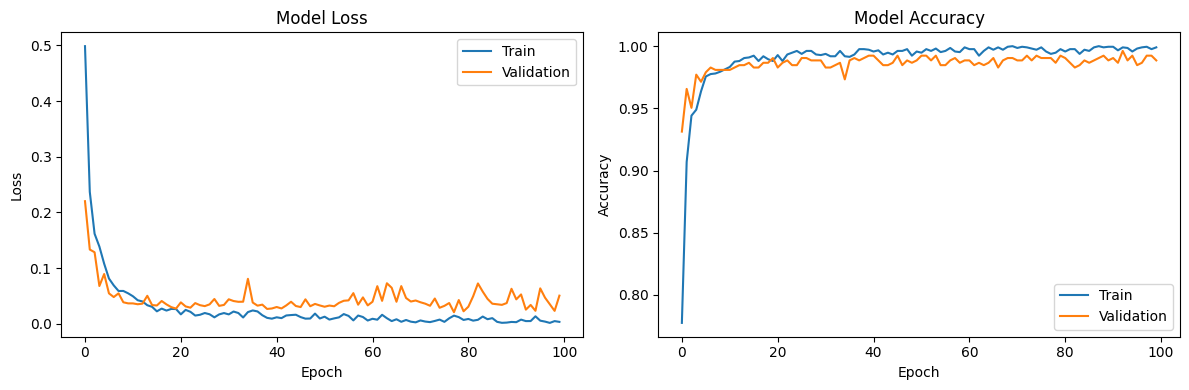

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

**Required Metric Evaluation**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load your model and saved weights
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels_array)), activation='softmax')
])

model.load_weights('/content/drive/MyDrive/CNN2d.h5')  # Load your trained weights

# Predict on the validation data
y_pred = model.predict(X_val)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate ROC-AUC score and plot ROC curve
roc_auc = roc_auc_score(y_true_labels, y_pred_labels)
fpr, tpr, thresholds = roc_curve(y_true_labels, y_pred_labels)
roc_auc = auc(fpr, tpr)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(confusion)
print(f"ROC AUC Score: {roc_auc:.4f}")

17/17 [==============================] - 0s 9ms/step
Accuracy: 0.9885
Precision: 0.9813
Recall (Sensitivity): 0.9962
F1 Score: 0.9887
Confusion Matrix:
[[256   5]
 [  1 262]]
ROC AUC Score: 0.9885


**Confusion Matrix**

17/17 [==============================] - 0s 11ms/step


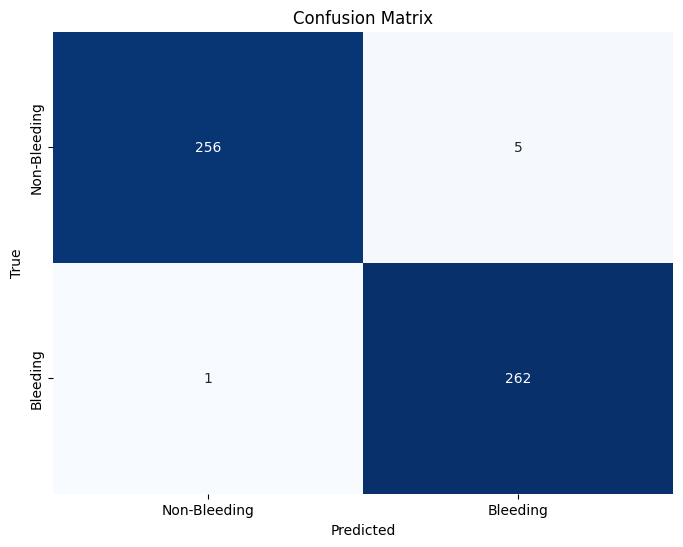

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the validation data
y_pred = model.predict(X_val)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Non-Bleeding", "Bleeding"],
            yticklabels=["Non-Bleeding", "Bleeding"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


**ROC AOC Curve**

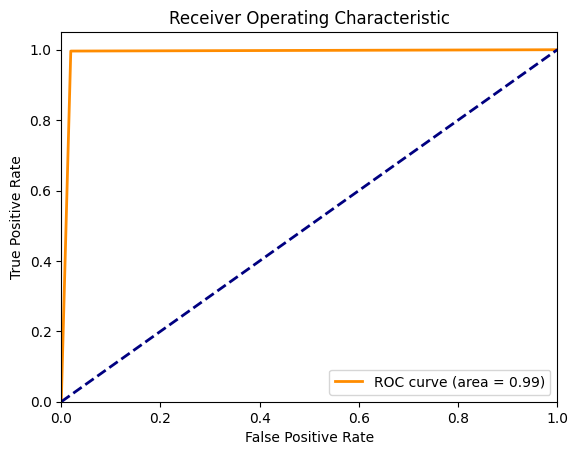

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Kappa Score**

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_true_labels, y_pred_labels)

# Print the Kappa score
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.9771


**Specificity**

In [ ]:
# Calculate True Negatives (TN), False Positives (FP), True Positives (TP), False Negatives (FN)
TN, FP, FN, TP = confusion.ravel()

# Calculate Specificity
specificity = TN / (TN + FP)

# Print the Specificity
print(f"Specificity: {specificity:.4f}")


Specificity: 0.9808


**Model Saved (1.53mb)**

In [ ]:
model.save('CNN2d.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Using the saved model (CNN2d.h5), accurately predicting the image's label of Test Dataset 1 and saving it to the Predictions.xlsx**


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Load the saved model
model = load_model('/content/drive/MyDrive/CNN2d.h5')

# Define the path to your test dataset directory
test_dataset_dir = '/content/drive/MyDrive/test_dataset/Test Dataset 1'

# List all image files in the test dataset directory
test_image_files = [f for f in os.listdir(test_dataset_dir) if f.endswith('.png')]

# Initialize lists to store image names and predicted labels
image_names = []
predicted_labels = []

# Iterate over the test images, convert to grayscale, resize, make predictions, and store results
for image_file in test_image_files:
    # Load and preprocess the test image
    image_path = os.path.join(test_dataset_dir, image_file)
    img = cv2.imread(image_path)

    if img is not None:
        # Convert the image to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize the image to 32x32 pixels
        img_gray = cv2.resize(img_gray, (32, 32))

        # Reshape to (32, 32, 1)
        img_gray = img_gray.reshape(32, 32, 1)

        # Make a prediction using the loaded model
        prediction = model.predict(np.expand_dims(img_gray, axis=0))

        # Determine the predicted label by selecting the class with the highest probability
        predicted_label = np.argmax(prediction, axis=1)

        # Map the class index to the corresponding label (e.g., 0 for non-bleeding, 1 for bleeding)
        if predicted_label == 0:
            label = "non-bleeding"
        else:
            label = "bleeding"

        # Append image name and predicted label to the lists
        image_names.append(image_file)
        predicted_labels.append(label)
    else:
        print(f"Image: {image_file}, Shape: Unable to read the image")

# Create a DataFrame to store the results
df = pd.DataFrame({'Image Name': image_names, 'Predicted Label': predicted_labels})

# Save the DataFrame to an Excel file
df.to_excel('/content/drive/MyDrive/predictions.xlsx', index=False)

print("Predictions saved to predictions.xlsx")


1/1 [==============================] - 0s 24ms/step
Predictions saved to predictions.xlsx


**Using the saved model (CNN2d.h5), accurately predicting the image's label of Test Dataset 2 and saving it to the test_2Predictions.xlsx**


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Load the saved model
model = load_model('/content/drive/MyDrive/CNN2d.h5')

# Define the path to your test dataset directory
test_dataset_dir = '/content/drive/MyDrive/test_dataset/Test Dataset 2'

# List all image files in the test dataset directory
test_image_files = [f for f in os.listdir(test_dataset_dir) if f.endswith('.png')]

# Initialize lists to store image names and predicted labels
image_names = []
predicted_labels = []

# Iterate over the test images, convert to grayscale, resize, make predictions, and store results
for image_file in test_image_files:
    # Load and preprocess the test image
    image_path = os.path.join(test_dataset_dir, image_file)
    img = cv2.imread(image_path)

    if img is not None:
        # Convert the image to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Resize the image to 32x32 pixels
        img_gray = cv2.resize(img_gray, (32, 32))

        # Reshape to (32, 32, 1)
        img_gray = img_gray.reshape(32, 32, 1)

        # Make a prediction using the loaded model
        prediction = model.predict(np.expand_dims(img_gray, axis=0))

        # Determine the predicted label by selecting the class with the highest probability
        predicted_label = np.argmax(prediction, axis=1)

        # Map the class index to the corresponding label (e.g., 0 for non-bleeding, 1 for bleeding)
        if predicted_label == 0:
            label = "non-bleeding"
        else:
            label = "bleeding"

        # Append image name and predicted label to the lists
        image_names.append(image_file)
        predicted_labels.append(label)
    else:
        print(f"Image: {image_file}, Shape: Unable to read the image")

# Create a DataFrame to store the results
df = pd.DataFrame({'Image Name': image_names, 'Predicted Label': predicted_labels})

# Save the DataFrame to an Excel file
df.to_excel('/content/drive/MyDrive/test_2predictions.xlsx', index=False)

print("Predictions saved to predictions.xlsx")


1/1 [==============================] - 0s 25ms/step
Predictions saved to predictions.xlsx


**Using the saved model (CNN2d.h5), accurately predicting the image's label of Validation dataset and saving it to the Predicted_images**


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('/content/drive/MyDrive/CNN2d.h5')  # Replace with the path to your saved model

# Define the image directories
image_directory = '/content/drive/MyDrive/final/WCEBleedGen/'

# Lists to store the file paths of predicted images, true labels, and predicted labels
predicted_images = []
true_labels = []
predicted_labels = []

# Process both bleeding and non-bleeding images
bleeding_directory = os.path.join(image_directory, 'bleeding/images')
non_bleeding_directory = os.path.join(image_directory, 'non-bleeding/images')

# Create a folder to save the predicted images
output_folder = '/content/drive/MyDrive/predicted_images'
os.makedirs(output_folder, exist_ok=True)

# Function to make predictions on an image and get the label
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(32, 32), color_mode="grayscale")  # Load as grayscale
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    label = "Bleeding" if predicted_label == 1 else "Non-Bleeding"

    return label

# Process images and make predictions
for image_name in os.listdir(bleeding_directory):
    if image_name.endswith('.png'):
        image_path = os.path.join(bleeding_directory, image_name)
        predicted_images.append(image_path)
        true_labels.append("Bleeding")
        predicted_labels.append(predict_image(image_path))

for image_name in os.listdir(non_bleeding_directory):
    if image_name.endswith('.png'):
        image_path = os.path.join(non_bleeding_directory, image_name)
        predicted_images.append(image_path)
        true_labels.append("Non-Bleeding")
        predicted_labels.append(predict_image(image_path))

# Combine images, true labels, and predicted labels
predictions = list(zip(predicted_images, true_labels, predicted_labels))

# Sort by prediction confidence
predictions.sort(key=lambda x: x[2] == "Bleeding", reverse=True)

# Save the 10 best-predicted images with labels to the output folder
for i, (image_path, true_label, predicted_label) in enumerate(predictions[:10]):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    text = f"True Label: {true_label}, Predicted Label: {predicted_label}"

    # Add the text to the image
    img = cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    output_path = os.path.join(output_folder, f'predicted_{i+1}.png')
    cv2.imwrite(output_path, img)

print("Predicted images with labels saved to the output folder.")


1/1 [==============================] - 0s 30ms/step
Predicted images with labels saved to the output folder.


**Using the saved model (CNN2d.h5), accurately predicting the image's label of Test Dataset 1  and saving it to the Predicted_test images**


In [ ]:
import cv2
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/CNN2d.h5')  # Replace with the path to your saved model

# Path to the test dataset directory
test_dataset_path = '/content/drive/MyDrive/test_dataset/Test Dataset 1/'

# Get a list of image file paths in the test dataset directory
image_paths = [f for f in os.listdir(test_dataset_path) if f.endswith('.png')]

# Create a folder to save the predicted images
output_folder = '/content/drive/MyDrive/predicted_test_images'
os.makedirs(output_folder, exist_ok=True)

# Iterate over the randomly selected images
for i, image_path in enumerate(image_paths):
    # Load and preprocess the test image
    test_image_path = os.path.join(test_dataset_path, image_path)
    test_image = cv2.imread(test_image_path)
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format for display

    # Make predictions using the model
    grayscale_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    grayscale_image = cv2.resize(grayscale_image, (32, 32))  # Resize to model's input size
    grayscale_image = np.expand_dims(grayscale_image, axis=0)  # Add batch dimension
    prediction = model.predict(grayscale_image)
    predicted_label = "Bleeding" if np.argmax(prediction) == 1 else "Non-Bleeding"



    # Save the predicted images in the output folder
    output_path = os.path.join(output_folder, f'predicted_{i+1}.png')
    cv2.imwrite(output_path, cv2.cvtColor(test_image_rgb, cv2.COLOR_RGB2BGR))


print("Predicted images saved to the output folder.")


1/1 [==============================] - 0s 20ms/step
Predicted images saved to the output folder.


**Using the saved model (CNN2d.h5), accurately predicting the image's label of Test Dataset 2  and saving it to the Predicted_test_2_images**


In [ ]:
import cv2
import numpy as np
import random
import os
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/CNN2d.h5')  # Replace with the path to your saved model

# Path to the test dataset directory
test_dataset_path = '/content/drive/MyDrive/final/WCEBleedGen/non-bleeding/images/'

# Get a list of image file paths in the test dataset directory
image_paths = [f for f in os.listdir(test_dataset_path) if f.endswith('.png')]

# Select 5 random images from the list
random_image_paths = random.sample(image_paths, 10)

# Create a folder to save the predicted images
output_folder = '/content/drive/MyDrive/predicted_test_2_images'
os.makedirs(output_folder, exist_ok=True)

# Iterate over the randomly selected images
for i, image_path in enumerate(random_image_paths):
    # Load and preprocess the test image
    test_image_path = os.path.join(test_dataset_path, image_path)
    test_image = cv2.imread(test_image_path)
    test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Convert to RGB format for display

    # Make predictions using the model
    grayscale_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    grayscale_image = cv2.resize(grayscale_image, (32, 32))  # Resize to model's input size
    grayscale_image = np.expand_dims(grayscale_image, axis=0)  # Add batch dimension
    prediction = model.predict(grayscale_image)
    predicted_label = "Bleeding" if np.argmax(prediction) == 1 else "Non-Bleeding"



    # Save the predicted images with labels in the output folder
    output_path = os.path.join(output_folder, f'predicted_{i+1}_{predicted_label}.png')
    cv2.imwrite(output_path, cv2.cvtColor(test_image_rgb, cv2.COLOR_RGB2BGR))



print("Predicted images with labels saved to the output folder.")


1/1 [==============================] - 0s 19ms/step
Predicted images with labels saved to the output folder.


In [ ]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4e769ccc4ab4b5d67d455d2863456c413e9dddad94071a282e20f3bb56c59099
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


**Data Profiling Report**


**Note:** If the training and validation plots do not appear in the data Classification.html, please check for loss_accuracy_plot.png in the same directory.


In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load the saved model
model = load_model('/content/drive/MyDrive/CNN2d.h5')  # Replace with the path to your saved model

# Replace with the path to your dataset directory
dataset_directory = '/content/drive/MyDrive/final/WCEBleedGen/'

# Create an empty DataFrame to store metadata
metadata = pd.DataFrame(columns=['Image', 'Label', 'Width', 'Height', 'Prediction', 'Correct'])

# Custom callback to collect metrics and model history during training
class MetricsCallback(Callback):
    def __init__(self):
        super().__init__()
        self.metrics = {'epoch': [], 'loss': [], 'accuracy': []}

    def on_epoch_end(self, epoch, logs=None):
        self.metrics['epoch'].append(epoch)
        self.metrics['loss'].append(logs['loss'])
        self.metrics['accuracy'].append(logs['accuracy'])

# Create a ProfileReport object to gather dataset metrics
metadata_report = pd.DataFrame()

# Iterate over the bleeding images
bleeding_directory = os.path.join(dataset_directory, 'bleeding/images')
for image_name in os.listdir(bleeding_directory):
    if image_name.endswith('.png'):
        image_path = os.path.join(bleeding_directory, image_name)
        img = cv2.imread(image_path)
        height, width, _ = img.shape

        # Load and preprocess the image for prediction
        test_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        test_image = cv2.resize(test_image, (32, 32))  # Resize to model's input size
        test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
        test_image = preprocess_input(test_image)

        # Make predictions using the model
        prediction = model.predict(test_image)
        predicted_label = "Bleeding" if np.argmax(prediction) == 1 else "Non-Bleeding"
        is_correct = "Correct" if predicted_label == "Bleeding" else "Incorrect"

        metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
                                    'Prediction': predicted_label, 'Correct': is_correct}, ignore_index=True)

# Iterate over the non-bleeding images
non_bleeding_directory = os.path.join(dataset_directory, 'non-bleeding/images')
for image_name in os.listdir(non_bleeding_directory):
    if image_name.endswith('.png'):
        image_path = os.path.join(non_bleeding_directory, image_name)
        img = cv2.imread(image_path)
        height, width, _ = img.shape

        # Load and preprocess the image for prediction
        test_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        test_image = cv2.resize(test_image, (32, 32))  # Resize to model's input size
        test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
        test_image = preprocess_input(test_image)

        # Make predictions using the model
        prediction = model.predict(test_image)
        predicted_label = "Bleeding" if np.argmax(prediction) == 1 else "Non-Bleeding"
        is_correct = "Correct" if predicted_label == "Non-Bleeding" else "Incorrect"

        metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
                                    'Prediction': predicted_label, 'Correct': is_correct}, ignore_index=True)

        # Gather metrics for the metadata report
        metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
                                                  'Width': width, 'Height': height,
                                                  'Prediction': predicted_label, 'Correct': is_correct},
                                                 ignore_index=True)

# Save the metadata to a CSV file
metadata.to_csv('/content/drive/MyDrive/dataset.csv', index=False)

# Generate a basic data profiling report using pandas_profiling for metadata
import pandas_profiling
metadata_profile = metadata.profile_report(title='Image Data Profiling Report')

# Save the metadata report to an HTML file
metadata_report_html = metadata_profile.to_html()

# Load your extracted features (2618, 1, 1024)
features_array = np.load('/content/drive/MyDrive/final/extracted_features/features.npy')
labels_array = np.load('/content/drive/MyDrive/final/extracted_features/labels.npy')

# Reshape the features into (2618, 32, 32, 1)
features_array_2d = features_array.reshape((2618, 32, 32, 1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    features_array_2d, labels_array, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Define the 2D CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(labels_array)), activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# Create an HTML template combining all information
html_template = f"""
<html>
<head>
  <title>Data Profiling Report</title>
</head>
<body>
<h1>Image Metadata Profiling Report</h1>
{metadata_report_html}
<h1>Metrics Profiling Report</h1>
{metrics_report_html}
<h1>Training Loss and Accuracy Plot</h1>
<img src="/content/drive/MyDrive/loss_accuracy_plot.png" alt="Loss and Accuracy Plot">
</body>
</html>
"""

# Save the combined report to an HTML file
with open('/content/drive/MyDrive/Classification.html', 'w') as f:
    f.write(html_template)


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 49ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  meta

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 46ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 49ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 41ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 41ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 58ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 27ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 18ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 46ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 41ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 41ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 27ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 117ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 115ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 27ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 131ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 130ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 47ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 96ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 148ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 48ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 27ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 45ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 44ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,


1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',


1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 49ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',


1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 39ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 44ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 39ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 41ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 44ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 39ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 44ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 49ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 39ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 27ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 44ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 45ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 46ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 39ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 47ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 39ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 62ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 51ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 48ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 41ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 47ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 50ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 45ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 51ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 60ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 64ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 41ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 49ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 51ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 49ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 46ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 50ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 66ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 44ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 64ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 73ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 52ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 39ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 25ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 39ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 66ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 53ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 51ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 51ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 47ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 38ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 65ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 76ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 49ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 67ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 60ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 27ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 47ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 41ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 37ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 63ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 42ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 49ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 36ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 65ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 33ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 46ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 55ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 61ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 47ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 47ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 34ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 29ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 28ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 23ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 19ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 41ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 40ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 62ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 61ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 70ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 54ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 39ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 46ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 50ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 58ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 82ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 89ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',


1/1 [==============================] - 0s 47ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 43ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 45ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 46ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 44ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 48ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 46ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 52ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 27ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 30ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - ETA: 0s

<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 31ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 27ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 27ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 32ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 26ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 24ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 20ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 22ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 21ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',
<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_rep

1/1 [==============================] - 0s 35ms/step


<ipython-input-18-dd4861cdfe22>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata = metadata.append({'Image': image_name, 'Label': 'Non-Bleeding', 'Width': width, 'Height': height,
<ipython-input-18-dd4861cdfe22>:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_report = metadata_report.append({'Image': image_name, 'Label': 'Non-Bleeding',


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/100
66/66 [==============================] - 4s 42ms/step - loss: 0.4235 - accuracy: 0.8052 - val_loss: 0.1917 - val_accuracy: 0.9408
Epoch 2/100
66/66 [==============================] - 2s 33ms/step - loss: 0.2094 - accuracy: 0.9202 - val_loss: 0.1057 - val_accuracy: 0.9714
Epoch 3/100
66/66 [==============================] - 2s 28ms/step - loss: 0.1651 - accuracy: 0.9389 - val_loss: 0.1026 - val_accuracy: 0.9714
Epoch 4/100
66/66 [==============================] - 2s 28ms/step - loss: 0.1291 - accuracy: 0.9518 - val_loss: 0.0800 - val_accuracy: 0.9733
Epoch 5/100
66/66 [==============================] - 2s 28ms/step - loss: 0.0968 - accuracy: 0.9656 - val_loss: 0.0569 - val_accuracy: 0.9809
Epoch 6/100
66/66 [==============================] - 2s 29ms/step - loss: 0.0748 - accuracy: 0.9756 - val_loss: 0.0479 - val_accuracy: 0.9828
Epoch 7/100
66/66 [==============================] - 2s 29ms/step - loss: 0.0732 - accuracy: 0.9752 - val_loss: 0.0442 - val_accuracy: 0.9809
Epoch 